# Laboratory Session - Exercise 06

 **Alice Pagano** - 1236916 
 
 *Padova, 26 May 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text
library(GoFKernel) # Library for the inverse function


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


# Index <a class="anchor" id="0"></a>

1. [Exercise 1 - Particles emitted by a radioactive source](#1) <br>    
2. [Exercise 2 - Lighthouse Problem](#2) <br> 
3. [Exercise 3 -  Signal over Background example](#3) <br>

## Exercise 1 - Particles emitted by a radioactive source <a class="anchor" id="1"></a>
* [Index](#0)

The number of particles emitted by a radioactive source during a fixed interval of time (∆t = 10 s) follows a Poisson distribution on the parameter μ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

### A) suppose a uniform prior distribution for the parameter $\mu$:
* determine and draw the posterior distribution for $\mu$, given the data
* evaluate mean, median and variance, both analytically and numerically in R

In case of $n$ independent measurements, the **Likelihood** of a Poisson process is:
$$
P(\{x_j\}|\mu) = \prod_{j=1}^{n} P(x_j|\mu) = \prod_{j=1}^{n} \frac{ \mu^x e^{- \mu}}{x!} \propto \mu^{\sum x_j} e^{-n \mu} 
$$

This function looks similar to a **Gamma function** $Gamma(x|\alpha,\lambda)$ with:
$$ \alpha = \sum_{j=1}^n x_j \qquad \lambda = n$$

Now, let us suppose a **Uniform** Prior. In particular, a uniform Prior has the form of $Gamma(1,0)$.

Combing this Prior with the Likelihood, we obtain a **Posterior** that is again a **Gamma function** $P(\mu|\{x_j\}) \propto Gamma(\alpha',\lambda')$ with:
$$ \alpha' = \sum_{j=1}^n x_j + 1 \qquad \lambda' = n$$

The **expected value** and **variance** of the Posterior are:
$$ E[\mu|\{x_j\}] = \frac{\alpha'}{\lambda'} \qquad Var[\mu|\{x_j\}] = \frac{\alpha'}{{\lambda'}^2} $$

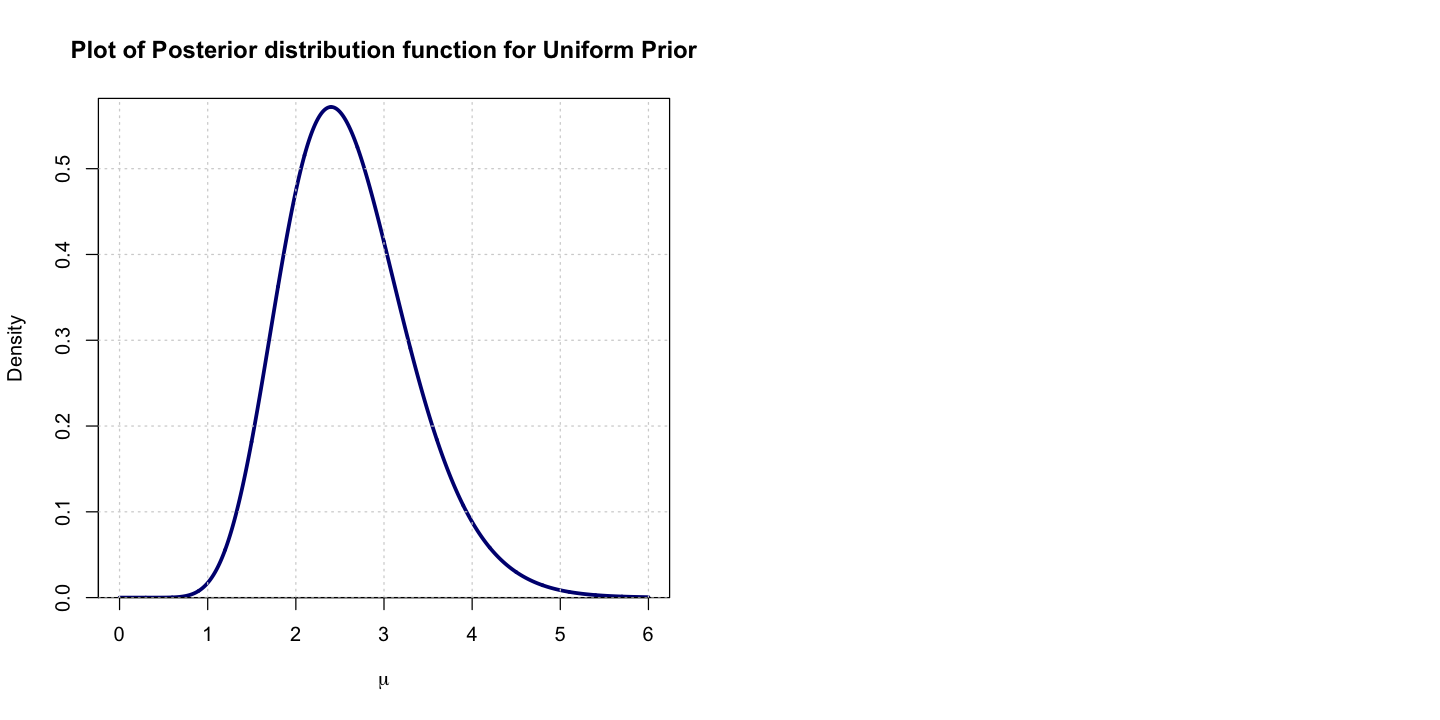

In [2]:
obs <- c(4,1,3,1,3) # Observations
n.obs <- length(obs)
sum.obs <- sum(obs)

# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Compute the Gamma Posterior
alpha <- sum.obs+1
lambda <- n.obs
unif.post <- dgamma(x=mu,shape=alpha,rate=lambda)
# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
unif.post <- unif.post/(delta.mu*sum(unif.post))

# Plot of the Posterior for uniform prior
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(mu, unif.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(unif.post)+0.01),
     main = "Plot of Posterior distribution function for Uniform Prior", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
grid()

In [3]:
# Compute mean and variance analitycally
mean.a <- alpha/lambda
var.a <- alpha/(lambda**2)

cat("The mean (analytical) of the Posterior for Uniform Prior is:", mean.a,'\n')
cat("The variance (analytical) of the Posterior for Uniform Prior is:", var.a,'\n')

The mean (analytical) of the Posterior for Uniform Prior is: 2.6 
The variance (analytical) of the Posterior for Uniform Prior is: 0.52 


In [4]:
# Compute mean, median and variance numerically
unif.mean.n <- delta.mu*sum(mu*unif.post)
unif.var.n <- delta.mu*sum((mu**2)*unif.post) - (delta.mu*sum(mu*unif.post))**2

median.func <- function(mu,delta.mu){
                area <- 0
                median <- 0
                for(i in (1:length(mu))){
                    area <- area + delta.mu*sum(unif.post[i])
                    if(area>=1/2){
                        median <- mu[i]
                        return(median)
                        }
                    }  
                }

median.n <- median.func(mu,delta.mu)

cat("The mean (numerical) of the Posterior for Uniform Prior is:", unif.mean.n,'\n')
cat("The variance (numerical) of the Posterior for Uniform Prior is:", unif.var.n,'\n')
cat("The median (numerical) of the Posterior for Uniform Prior is:", median.n,'\n')

The mean (numerical) of the Posterior for Uniform Prior is: 2.59938 
The variance (numerical) of the Posterior for Uniform Prior is: 0.5177653 
The median (numerical) of the Posterior for Uniform Prior is: 2.533267 


### B) suppose a Jeffrey’s prior for the parameter $\mu$:
* determine and draw the posterior distribution for $\mu$, given the data
* evaluate mean, median and variance, both analytically and numerically in R

Now, let us suppose a **Jeffrey's** Prior. In particular, a uniform Prior has the form of $Gamma(\frac{1}{2},0)$.

Combing this Prior with the Likelihood, we obtain a **Posterior** that is again a **Gamma function** with:
$$ \alpha = \sum_{j=1}^n x_j +\frac{1}{2} \quad \lambda = n$$

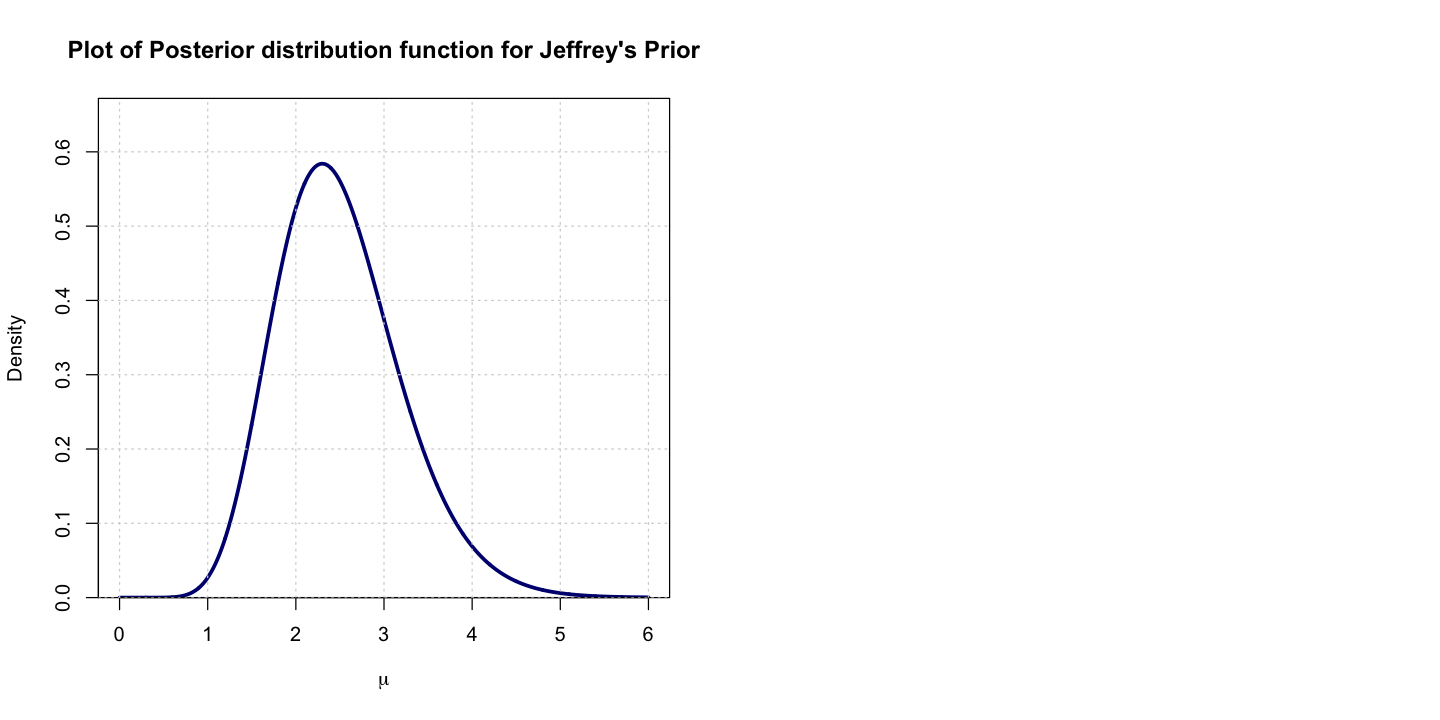

In [5]:
obs <- c(4,1,3,1,3) # Observations
n.obs <- length(obs)
sum.obs <- sum(obs)

# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Compute the Gamma Posterior
alpha <- sum.obs+1/2
lambda <- n.obs
jeff.post <- dgamma(x=mu,shape=alpha,rate=lambda)
# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
jeff.post <- jeff.post/(delta.mu*sum(jeff.post))

# Plot of the Posterior for Jeffrey's Prior
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(mu, jeff.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(unif.post)+0.1),
     main = "Plot of Posterior distribution function for Jeffrey's Prior", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
grid()

In [6]:
# Compute mean and variance analitycally
mean.a <- alpha/lambda
var.a <- alpha/(lambda**2)

cat("The mean (analytical) of the Posterior for Jeffrey's Prior is:", mean.a,'\n')
cat("The variance (analytical) of the Posterior for Jeffrey's Prior is:", var.a,'\n')

The mean (analytical) of the Posterior for Jeffrey's Prior is: 2.5 
The variance (analytical) of the Posterior for Jeffrey's Prior is: 0.5 


In [7]:
# Compute mean, median and variance numerically
jeff.mean.n <- delta.mu*sum(mu*unif.post)
jeff.var.n <- delta.mu*sum((mu**2)*unif.post) - (delta.mu*sum(mu*unif.post))**2

median.func <- function(mu,delta.mu){
                area <- 0
                median <- 0
                for(i in (1:length(mu))){
                    area <- area + delta.mu*sum(unif.post[i])
                    if(area>=1/2){
                        median <- mu[i]
                        return(median)
                        }
                    }  
                }

median.n <- median.func(mu,delta.mu)

cat("The mean (numerical) of the Posterior for Jeffrey's Prior is:", jeff.mean.n,'\n')
cat("The variance (numerical) of the Posterior for Jeffrey's Prior is:", jeff.var.n,'\n')
cat("The median (numerical) of the Posterior for Jeffrey's Prior is:", median.n,'\n')

The mean (numerical) of the Posterior for Jeffrey's Prior is: 2.59938 
The variance (numerical) of the Posterior for Jeffrey's Prior is: 0.5177653 
The median (numerical) of the Posterior for Jeffrey's Prior is: 2.533267 


### C) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [8]:
# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Normal approximation for the Posterior distribution
unif.norm.post <- dnorm(mu, mean=unif.mean.n, sd=sqrt(unif.var.n))
jeff.norm.post <- dnorm(mu, mean=jeff.mean.n, sd=sqrt(jeff.var.n))
# Normalize Posterior
# (we renormalize the posterior because the Prior is 0 outside the interval of mu, while the Posterior is normalized in -inf,+inf)
unif.norm.post <- unif.norm.post/(delta.mu*sum(unif.norm.post))
jeff.norm.post <- unif.norm.post/(delta.mu*sum(jeff.norm.post))


In [9]:
# Evaluate 95% credibility interval for Uniform Prior and Jeffrey's Prior

unif.area <- delta.mu*cumsum(unif.post)
jeff.area <- delta.mu*cumsum(jeff.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.unif <- cl.func(mu,unif.area,cl)
x.jeff <- cl.func(mu,jeff.area,cl)

cat("Uniform Prior  :\t", 'x1=', x.unif[1],'\tx2=', x.unif[2],'\n')
cat("Jeffrey's Prior:\t", 'x1=', x.jeff[1],'\tx2=', x.jeff[2],'\n')

Uniform Prior  :	 x1= 1.382191 	x2= 4.188594 
Jeffrey's Prior:	 x1= 1.310155 	x2= 4.062531 


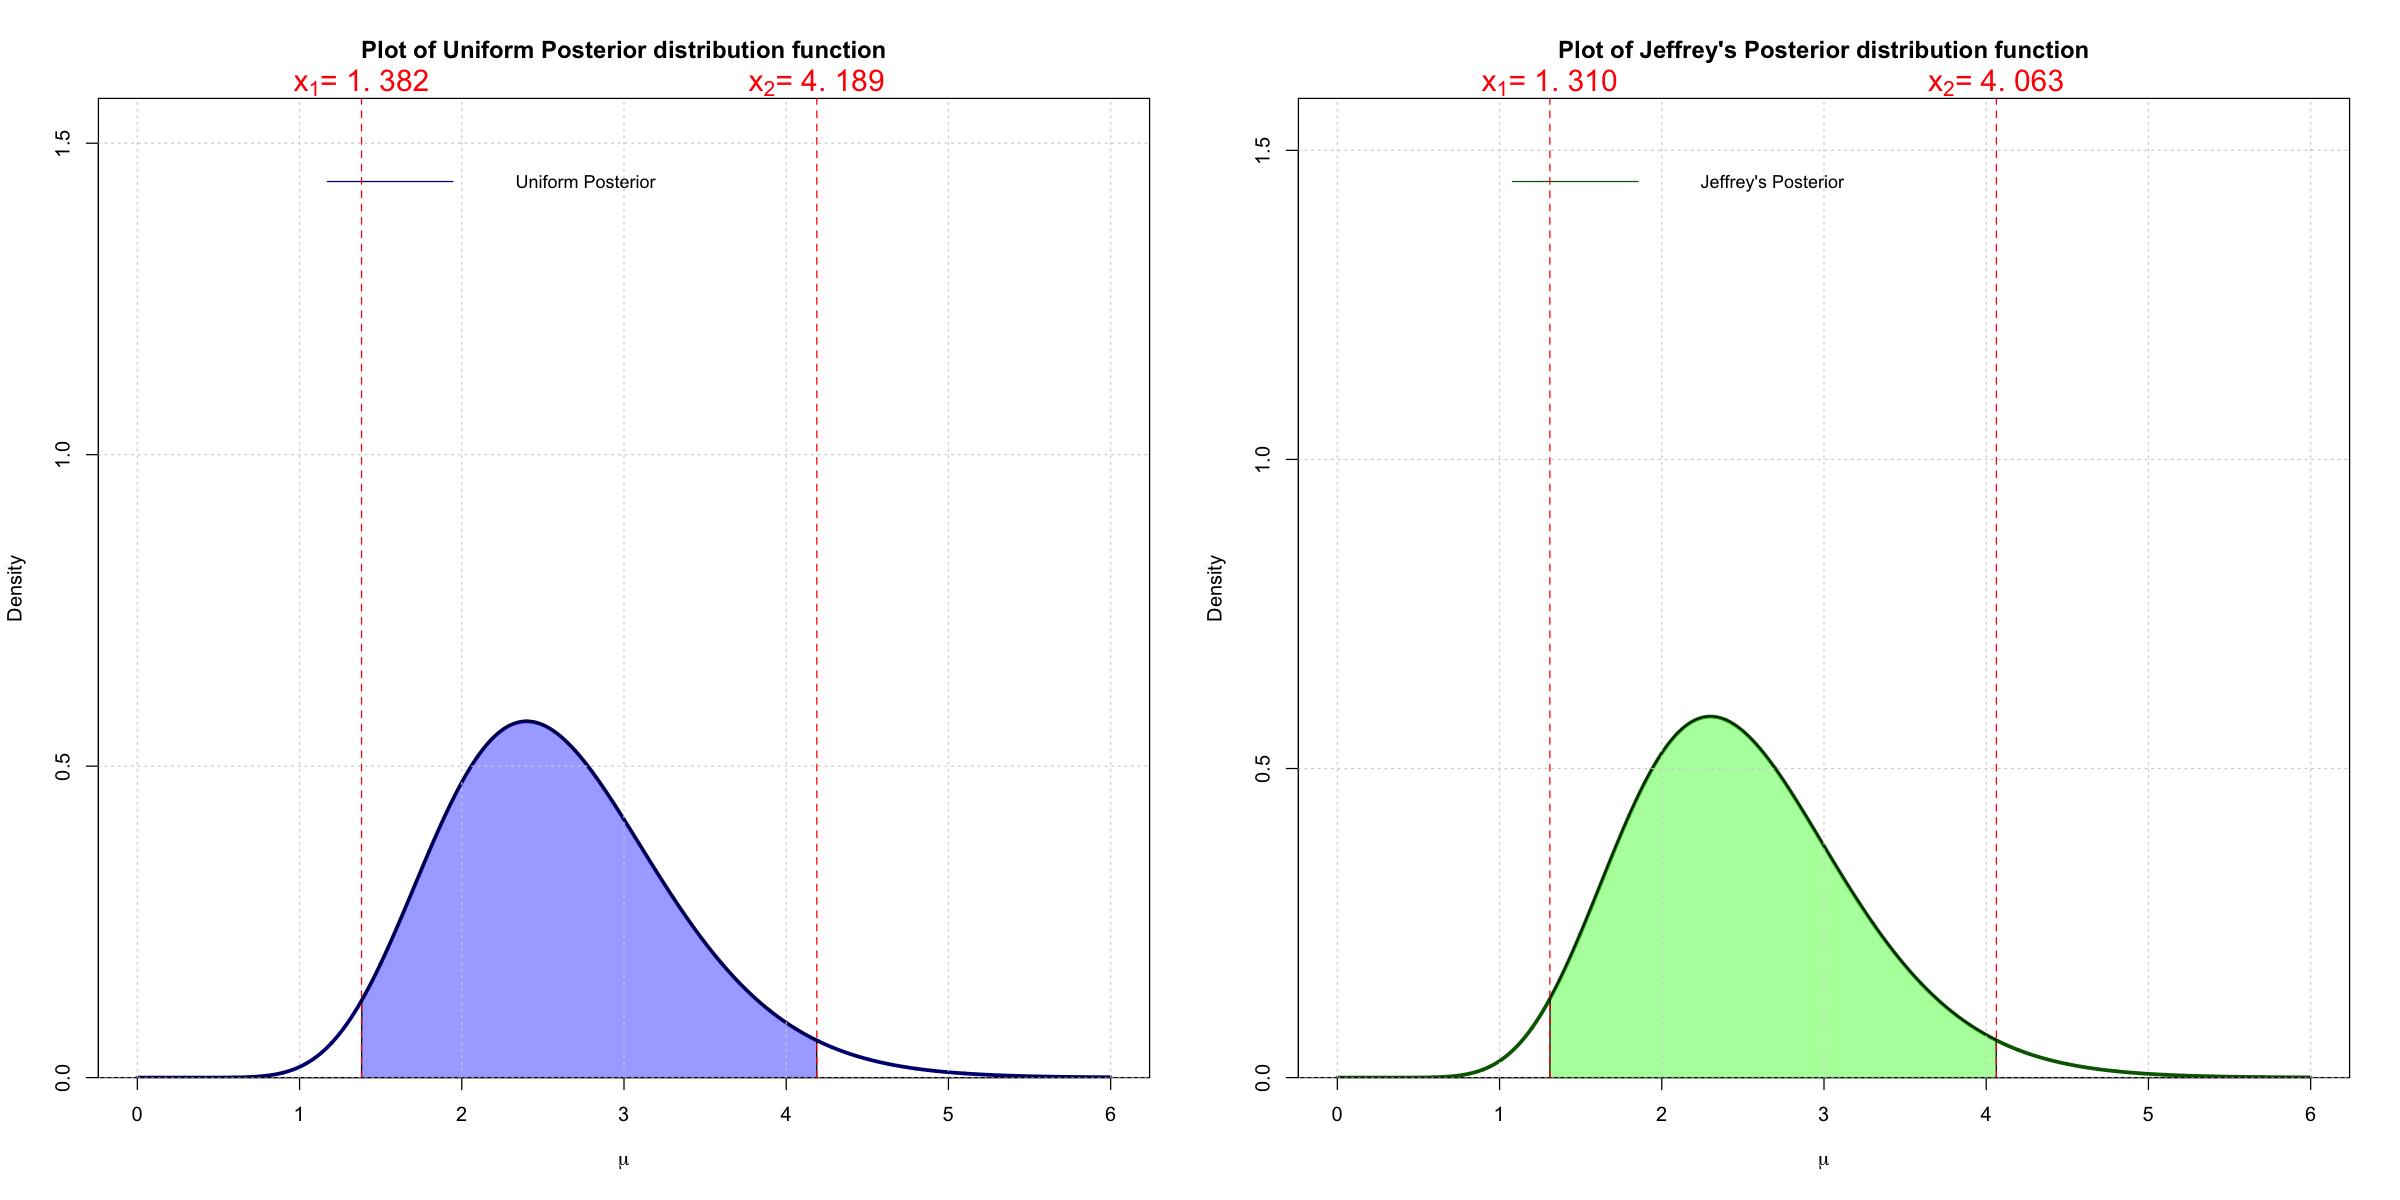

In [10]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Uniform Posterior
plot(mu, unif.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(unif.post)+1),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Posterior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)

x <- c(x.unif[1],mu[mu>x.unif[1] & mu<x.unif[2]],x.unif[2])
y <- c(0,unif.post[which(mu>x.unif[1] & mu<x.unif[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x.unif[1], lty=2,col='red')
abline(v=x.unif[2], lty=2,col='red')

text(x.unif[1], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_1$= %0.3f",x.unif[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.unif[2], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_2$= %0.3f",x.unif[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


# Jeffrey's Posterior
plot(mu, jeff.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(jeff.post)+1),
     main = "Plot of Jeffrey's Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Jeffrey's Posterior"), col=c("darkgreen"), lty=1, cex=0.9,box.lty=0)

x <- c(x.jeff[1],mu[mu>x.jeff[1] & mu<x.jeff[2]],x.jeff[2])
y <- c(0,jeff.post[which(mu>x.jeff[1] & mu<x.jeff[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

abline(v=x.jeff[1], lty=2,col='red')
abline(v=x.jeff[2], lty=2,col='red')

text(x.jeff[1], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_1$= %0.3f",x.jeff[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.jeff[2], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_2$= %0.3f",x.jeff[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


In [11]:
# Evaluate 95% credibility interval for Normal Posterior 
# with mean and sd obtained from Uniform and Jeffrey's prior

unif.norm.area <- delta.mu*cumsum(unif.norm.post)
jeff.norm.area <- delta.mu*cumsum(jeff.norm.post)

cl = 0.95 # Confidence level

cl.func <- function(p,cumsum.area,cl) {
            x1 <- NULL
            x2 <- NULL
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.unif.norm <- cl.func(mu,unif.norm.area,cl)
x.jeff.norm <- cl.func(mu,jeff.norm.area,cl)

cat("Normal Posterior (Uniform Prior)  :\t", 'x1=', x.unif.norm[1],'\tx2=', x.unif.norm[2],'\n')
cat("Normal Posterior (Jeffrey's Prior):\t", 'x1=', x.jeff.norm[1],'\tx2=', x.jeff.norm[2],'\n')

Normal Posterior (Uniform Prior)  :	 x1= 1.190095 	x2= 4.008504 
Normal Posterior (Jeffrey's Prior):	 x1= 1.190095 	x2= 4.005503 


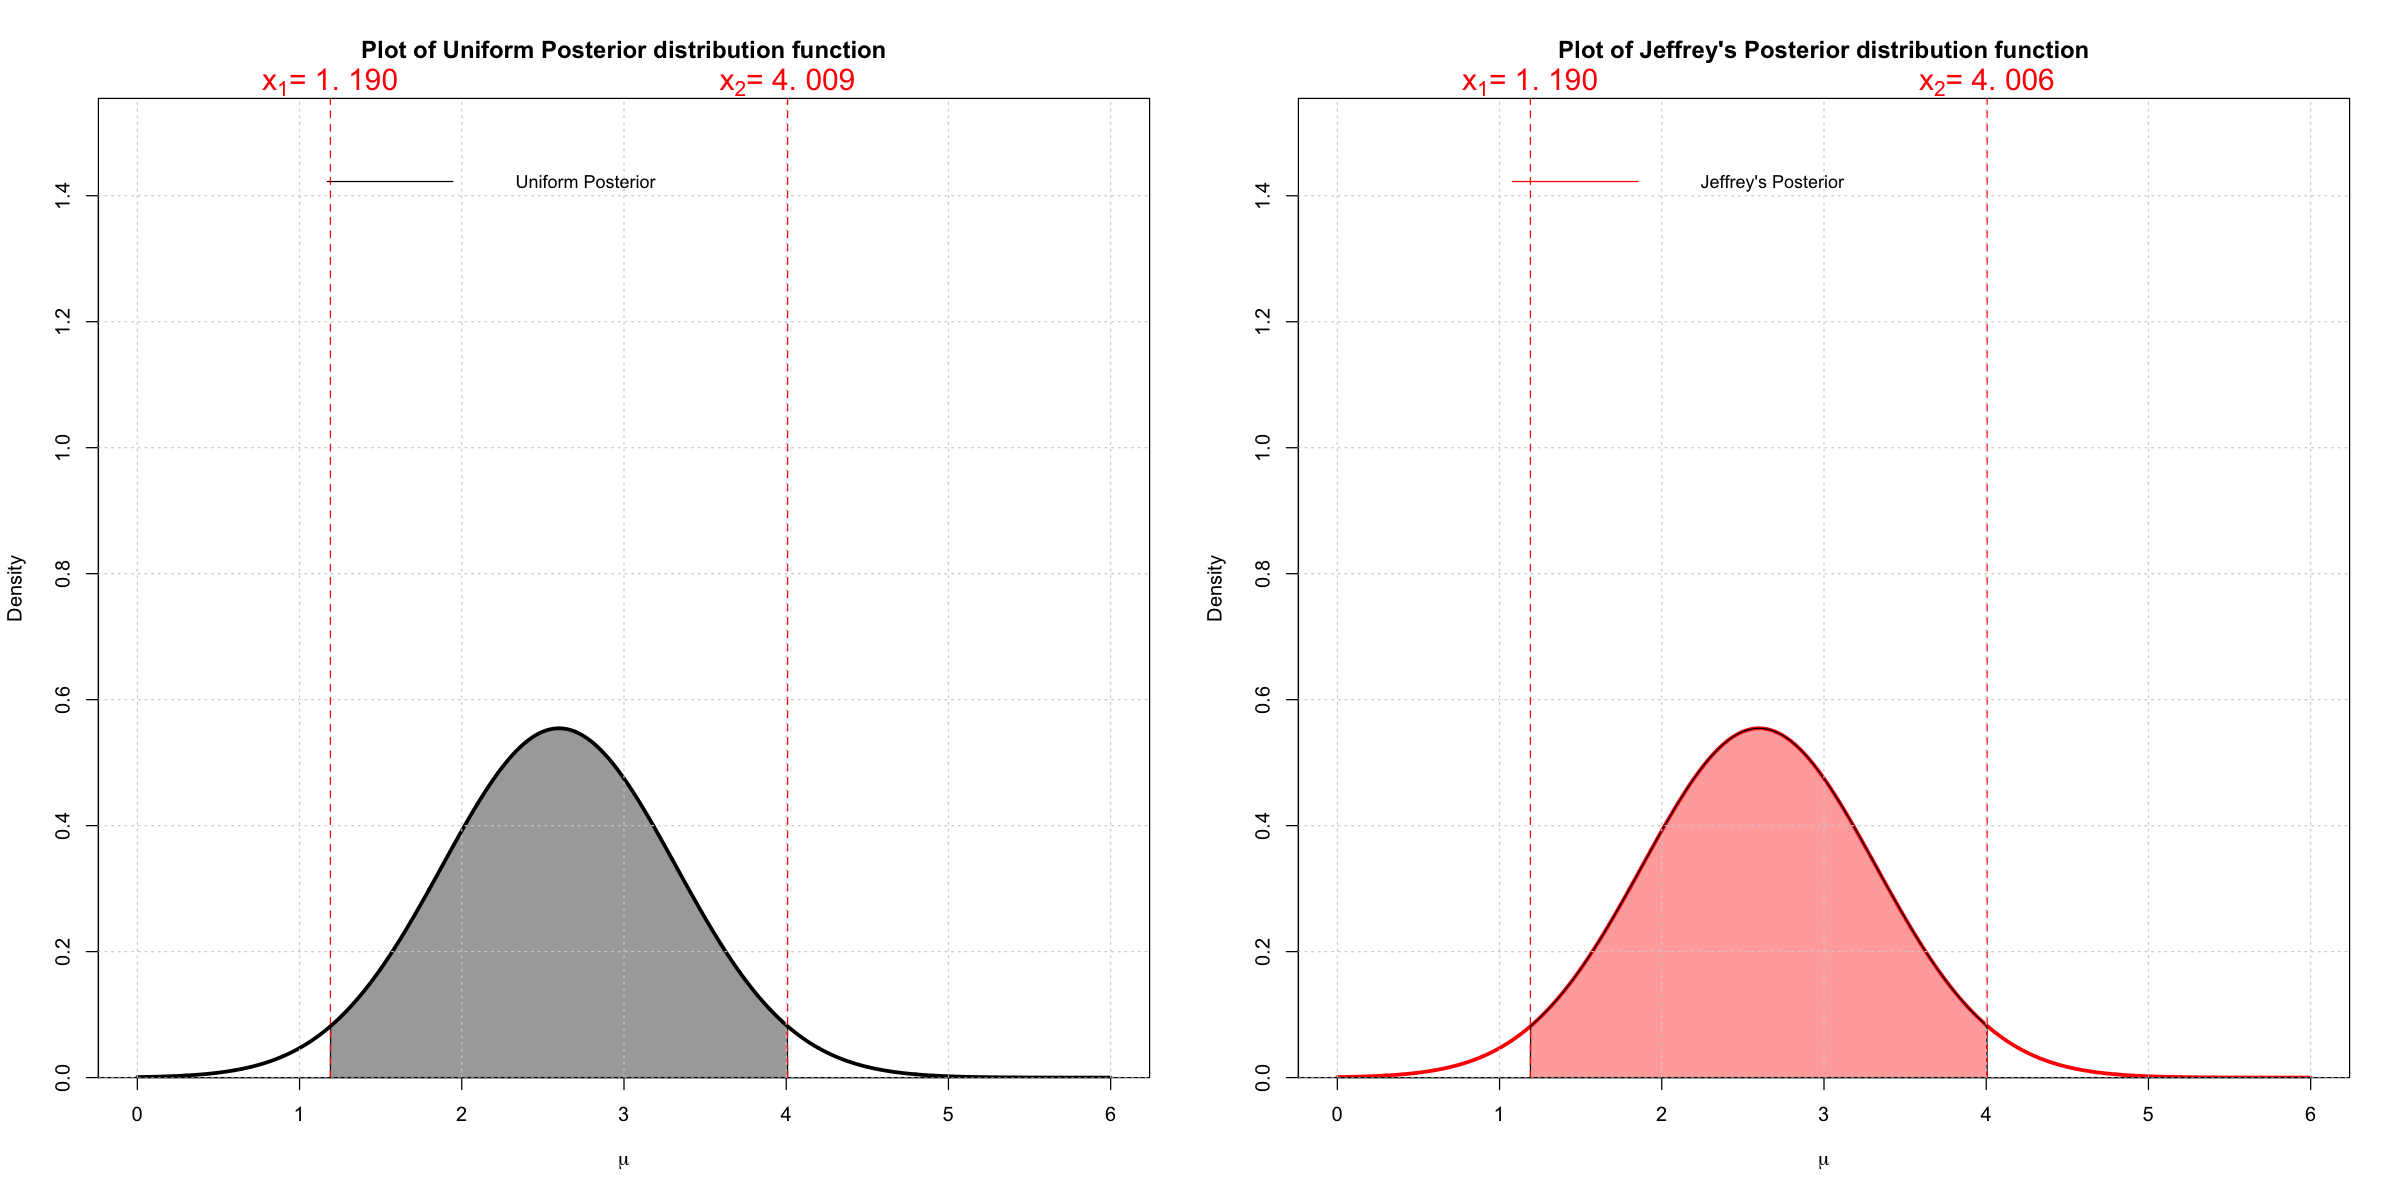

In [12]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Normal (Uniform) Posterior
plot(mu, unif.norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(unif.norm.post)+1),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Posterior"), col=c("black"), lty=1, cex=0.9,box.lty=0)

x = x.unif.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,unif.norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
text(x[1], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


# Normal (Jeffrey's) Posterior
plot(mu, jeff.norm.post, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(jeff.norm.post)+1),
     main = "Plot of Jeffrey's Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Jeffrey's Posterior"), col=c("red"), lty=1, cex=0.9,box.lty=0)

x = x.jeff.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,jeff.norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
text(x[1], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[4] + 0.06, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()

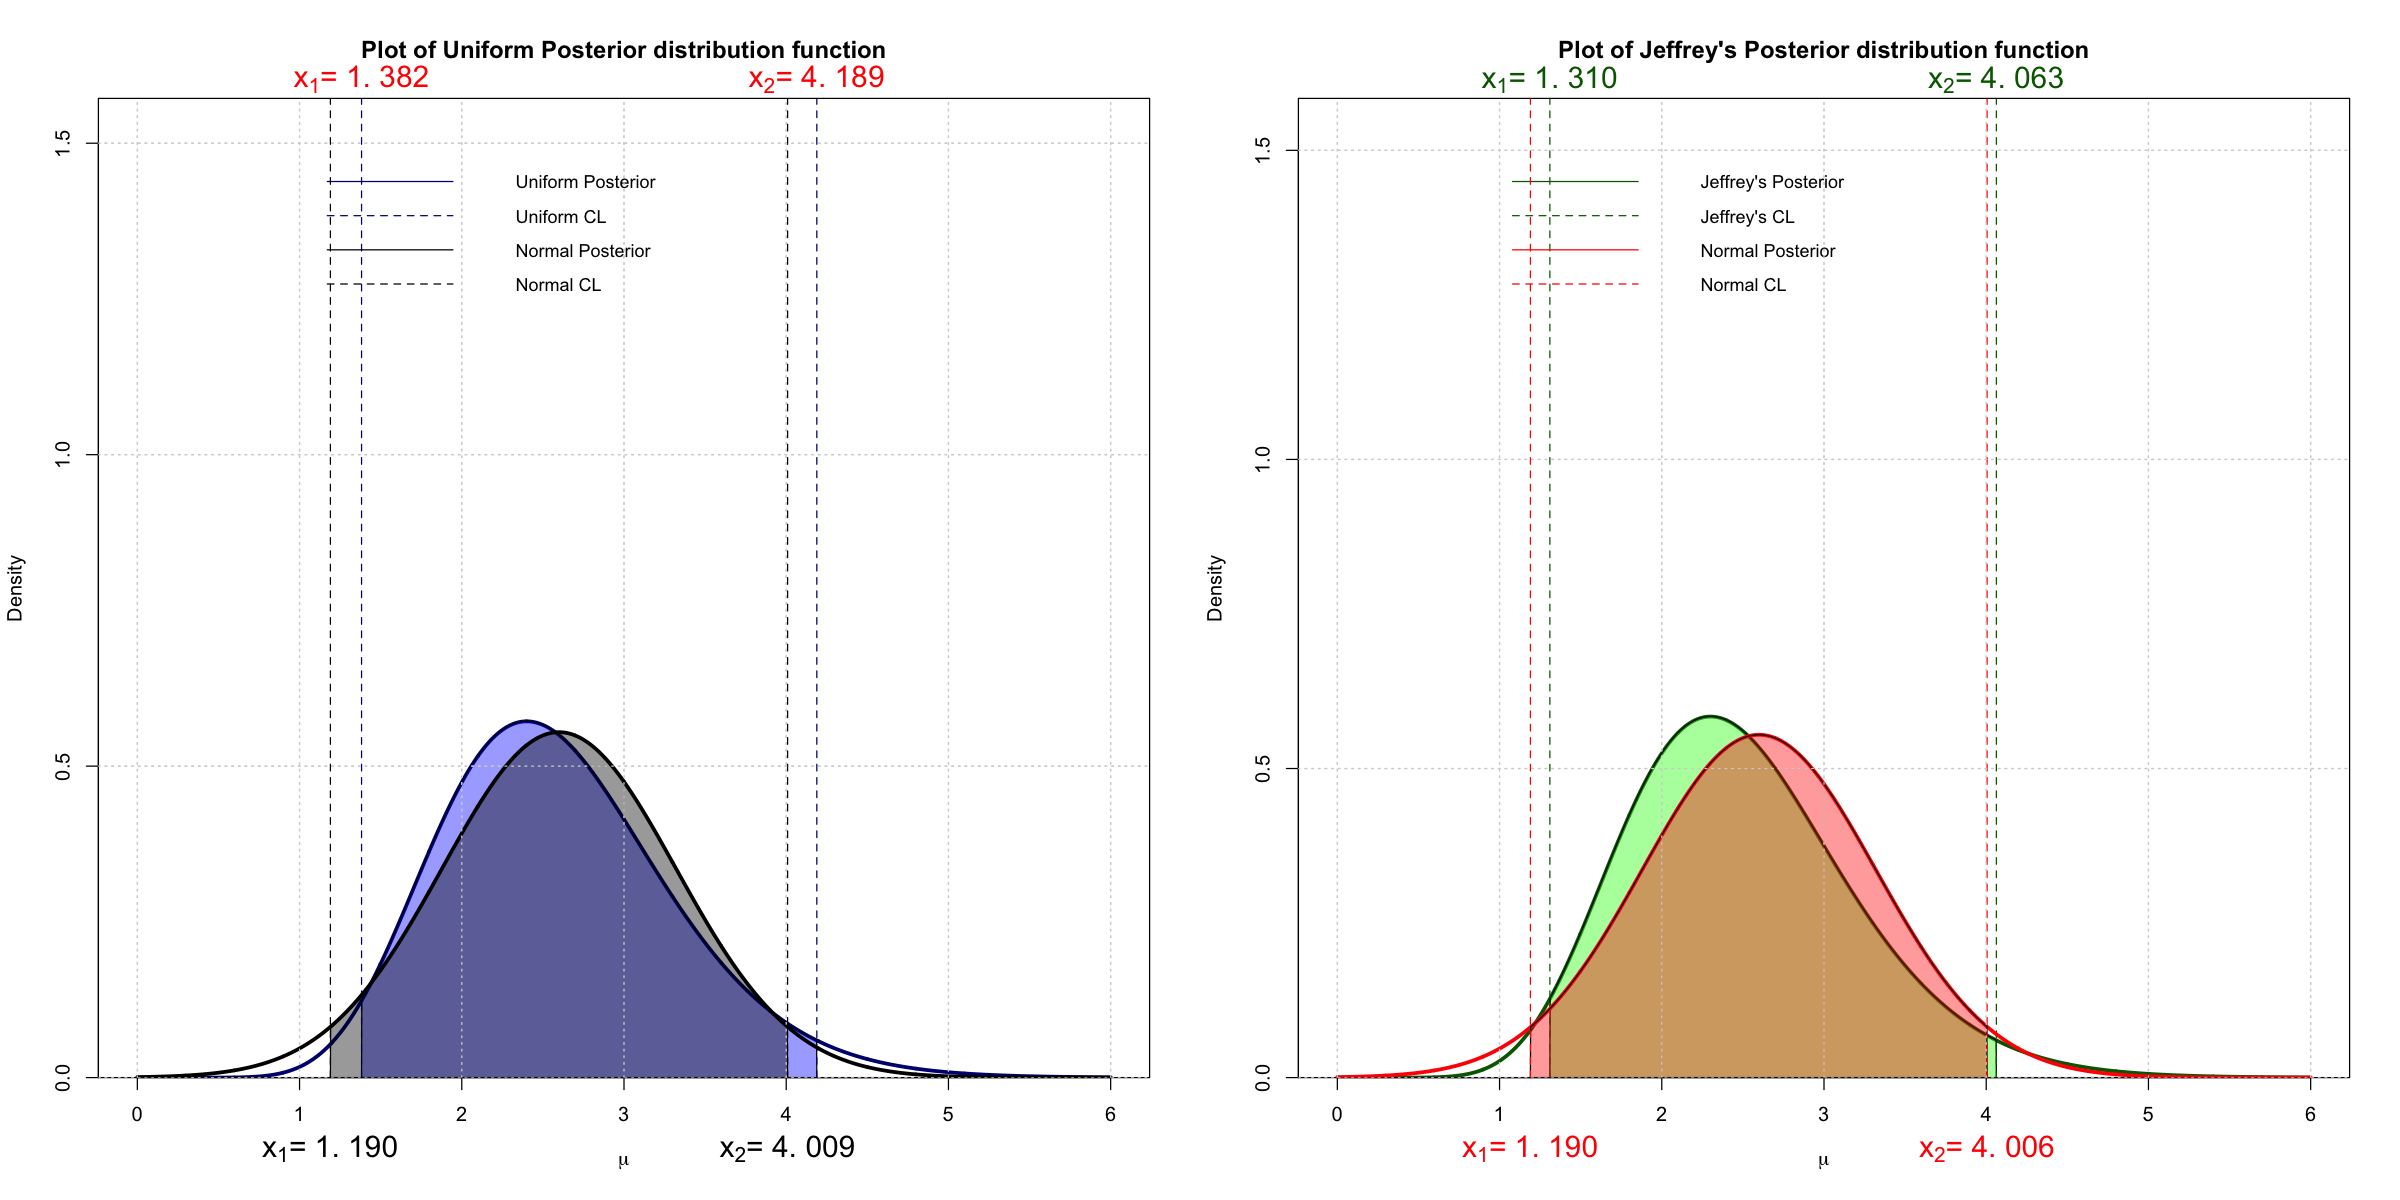

In [13]:
# Comparison of the results obtained with both priors
# and obtained using a normal approximation for the posterior distribution

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Utils
n.sample <- 2000
mu <- seq(0,6,length.out=n.sample)
delta.mu <- mu[2]-mu[1]

# Uniform Posterior
plot(mu, unif.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(unif.post)+1),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')

x <- c(x.unif[1],mu[mu>x.unif[1] & mu<x.unif[2]],x.unif[2])
y <- c(0,unif.post[which(mu>x.unif[1] & mu<x.unif[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))

abline(v=x.unif[1], lty=2,col='navy')
abline(v=x.unif[2], lty=2,col='navy')

text(x.unif[1], par("usr")[4] + 0.065, labels = TeX(sprintf("$x_1$= %0.3f",x.unif[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x.unif[2], par("usr")[4] + 0.065, labels = TeX(sprintf("$x_2$= %0.3f",x.unif[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()

# Normal (Uniform) Posterior
lines(mu, unif.norm.post, xaxs='r', yaxs='i', col='black', type='l', ylim=c(0,max(unif.norm.post)+1),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Uniform Posterior","Uniform CL","Normal Posterior","Normal CL"), col=c("navy","navy","black","black"), lty=1:2, cex=0.9,box.lty=0)

x = x.unif.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,unif.norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='black')
abline(v=x[2], lty=2,col='black')
text(x[1], par("usr")[3] - 0.08, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="black", xpd=TRUE)
text(x[2], par("usr")[3] - 0.08, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="black", xpd=TRUE)

grid()




# Jeffrey's Posterior
plot(mu, jeff.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(jeff.post)+1),
     main = "Plot of Jeffrey's Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')

x <- c(x.jeff[1],mu[mu>x.jeff[1] & mu<x.jeff[2]],x.jeff[2])
y <- c(0,jeff.post[which(mu>x.jeff[1] & mu<x.jeff[2])],0)
polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.4))

abline(v=x.jeff[1], lty=2,col='darkgreen')
abline(v=x.jeff[2], lty=2,col='darkgreen')

text(x.jeff[1], par("usr")[4] + 0.065, labels = TeX(sprintf("$x_1$= %0.3f",x.jeff[1])), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)
text(x.jeff[2], par("usr")[4] + 0.065, labels = TeX(sprintf("$x_2$= %0.3f",x.jeff[2])), pos=1, cex=1.5, col="darkgreen", xpd=TRUE)

grid()

# Normal (Jeffrey's) Posterior
lines(mu, jeff.norm.post, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,max(jeff.norm.post)+1),
     main = "Plot of Jeffrey's Posterior distribution function", lty=1, lwd = 3, xlab=TeX(sprintf("$\\mu$")), 
     ylab='Density')
legend("topright", inset=0.05,legend=c("Jeffrey's Posterior","Jeffrey's CL","Normal Posterior","Normal CL"), col=c("darkgreen","darkgreen","red","red"), lty=1:2, cex=0.9,box.lty=0)

x = x.jeff.norm

xp <- c(x[1],mu[mu>x[1] & mu<x[2]],x[2])
yp <- c(0,jeff.norm.post[which(mu>x[1] & mu<x[2])],0)
polygon(x = xp, y = yp, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.4))

abline(v=x[1], lty=2,col='red')
abline(v=x[2], lty=2,col='red')
text(x[1], par("usr")[3] - 0.08, labels = TeX(sprintf("$x_1$= %0.3f",x[1])), pos=1, cex=1.5, col="red", xpd=TRUE)
text(x[2], par("usr")[3] - 0.08, labels = TeX(sprintf("$x_2$= %0.3f",x[2])), pos=1, cex=1.5, col="red", xpd=TRUE)

grid()


## Exercise 2 -  Lighthouse Problem <a class="anchor" id="2"></a>
* [Index](#0)

Given the problem of the lighthouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown

We have a **Uniform Likelihood** for angle $\theta$ over $\pm \pi/2$:

$$
P(\theta_k|\alpha,\beta) = \frac{1}{\pi}
$$

The position $x$ is given by:
$$
x_k = \alpha + \beta \tan(\theta_k)
$$

The rule of variable transformation, $p(x)dx=p(\theta)d\theta$, allows us to compute $p(x|\alpha,\beta)$ as:

$$
p(x|\alpha,\beta)=p(\theta|\alpha,\beta) \frac{\text{d} \theta}{\text{d}x}
$$

By algebric manipulation, we obtain:

$$
p(x|\alpha,\beta) =\frac{1}{\pi} \frac{\beta}{\beta^2+(x-\alpha)^2}
$$

This is a **Cauchy distribution**, with parameter $\alpha$ (the location) and $\beta>0$ (scale).

If we do not know both $\alpha$ and $\beta$, we have to add a Prior to them.

Let us suppose that $\alpha$ and $\beta$ are uncorrelated, hence we have:

$$
p(\alpha,\beta|\{x_k\}) \propto p(\{x_k\}|\alpha,\beta)p(\alpha)p(\beta)
$$

Moreover, we suppose a **uniform Prior** for both $\alpha$ and $\beta$.
Then, the **Posterior** is proportional to the **Likelihood**.

$$
p(\alpha,\beta|\{x_k\}) \propto p(\{x_k\}|\alpha,\beta) = \prod_k p(x_k|\alpha,\beta)
$$

where the Likelihood function is just the product of the probabilities for $N$ individual detections.

Taking the natural logarithm of the Posterior probability function, we get:

$$
L = \ln {p(\alpha,\beta|\{x_k\})} = const + \sum_k \ln \Big[ \frac{1}{\pi} \frac{\beta}{\beta^2 + (x_j - \alpha)^2} \Big]
$$

In [14]:
# Function to generate dataset
generate.data <- function(N,alpha,beta){
                    set.seed(6666)
                    theta.k <- runif(N,-pi/2,pi/2)
                    x.k <- alpha + beta*tan(theta.k)
                    return(x.k)
                 }

# Set length of dataset
N <- 1000
# Set unkown true values
alpha.true <- 20 #1.5 # unkonwn true value
beta.true  <- 50 #10 # unkonwn true value

# Generate dataset
x.k <- generate.data(N,alpha.true,beta.true)

In [15]:
# Function to compute the log of the Posterior
log.post.func <- function(data,alpha,beta){
  logL <- 0.0
  for(x in data){
      logL <- logL + log(beta/(pi*(beta^2+(x-alpha)^2))) 
  }
  return(logL)
}

# Grid search list for alpha and beta parameters
n.sample <- 300

x.min <- -50
x.max <- +50
h.x <- (x.max - x.min)/n.sample
alphas <- seq(from=x.min, by=h.x, length.out=n.sample+1)

y.min <- 0
y.max <- 100
h.y <- (y.max - y.min)/n.sample
betas <- seq(from=y.min, by=h.y, length.out=n.sample+1)

Now, we generate a contour plot of the Posterior for 1000 samples.

The true values are:
alpha= 20 	beta= 50 
The most probable values for 1000 samples are:
alpha= 18.66667 	beta= 52

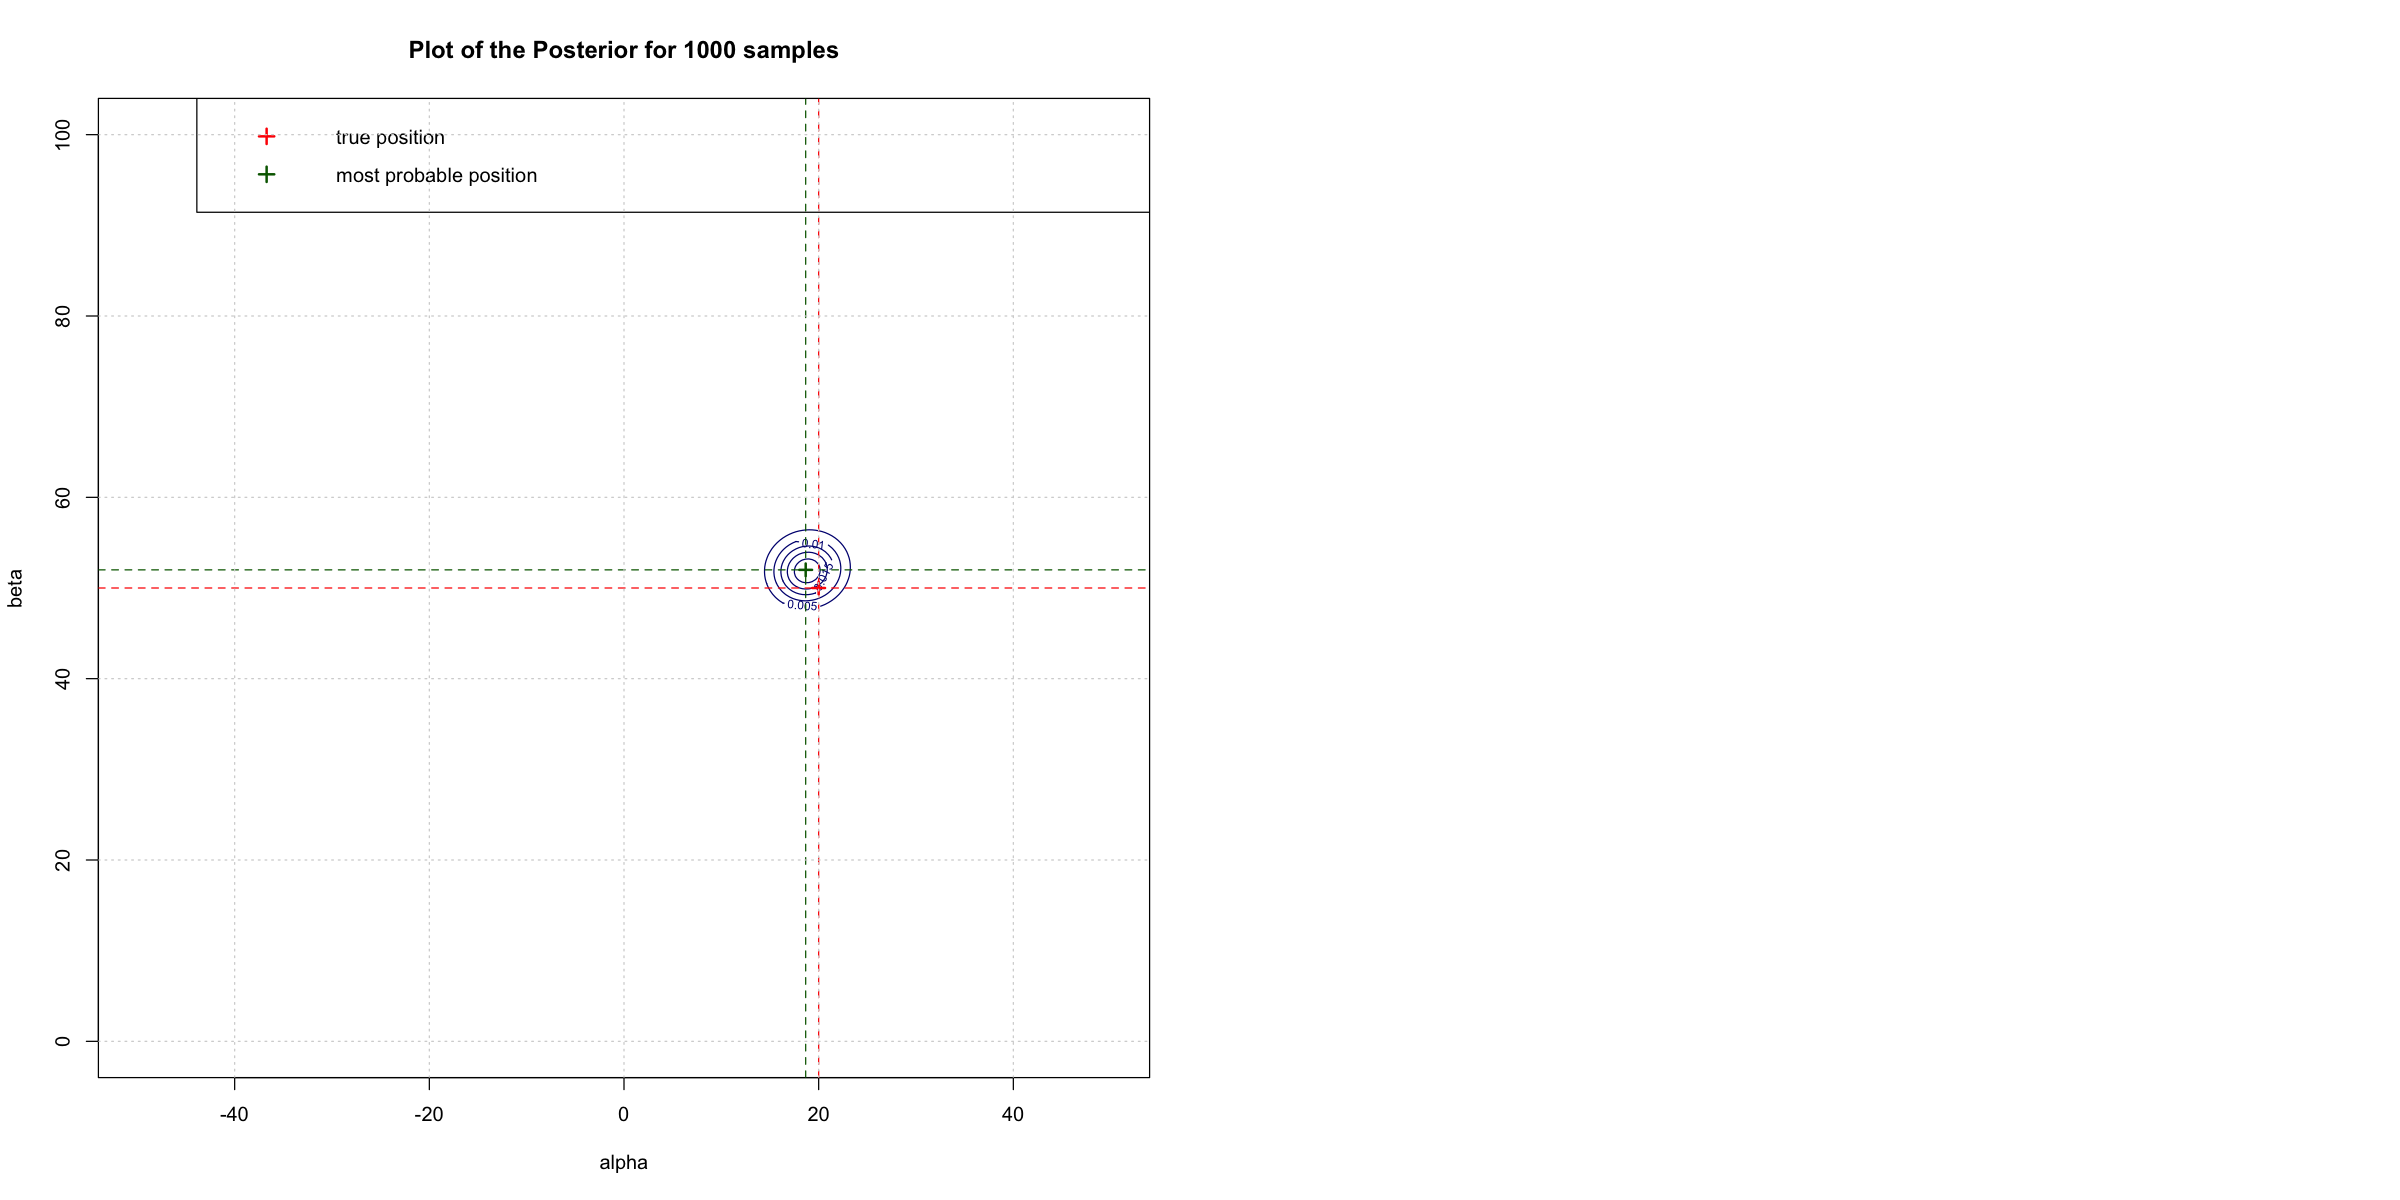

In [16]:
# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

data <- x.k[1:1000]
    
f <- function(alpha,beta){ log.post.func(data, alpha, beta) }
log.grid.post.values <- outer(alphas, betas, Vectorize(f))
# Compute the normalized posterior
log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) # Shift for the maximum
y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))
grid.values <- matrix(y.post,nrow=length(alphas), ncol=length(betas))

index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
max.alpha <- alphas[index[1]]
max.beta <- betas[index[2]]
cat("The true values are:\n")
cat("alpha=",alpha.true,"\tbeta=",beta.true,'\n')
cat("The most probable values for",length(data),"samples are:\n")
cat("alpha=",max.alpha,"\tbeta=",max.beta)

# Plot the contour plot of posterior
contour(alphas, betas, y.post, main=paste("Plot of the Posterior for",length(data),"samples"),
            xlim=c(x.min,x.max), ylim=c(0,y.max), xlab="alpha", ylab="beta",col="navy",
            nlevels=10) 

# Plot of the true value of alpha and beta
points(alpha.true, beta.true, pch=3, col="red", lwd=2) 
abline(h=beta.true, lty=2,col='red')
abline(v=alpha.true, lty=2,col='red')

# Plot the most probable values of the Posterior
points(max.alpha, max.beta, pch=3, col="darkgreen", lwd=2) 
abline(h=max.beta, lty=2,col='darkgreen')
abline(v=max.alpha, lty=2,col='darkgreen') 

legend("topright",c("true position","most probable position"), col=c("red","darkgreen"), pch=3, pt.cex=1.2, pt.lwd=2) 
grid()
    

Let us see how the contour plot varies as a function of the number of sample considered.

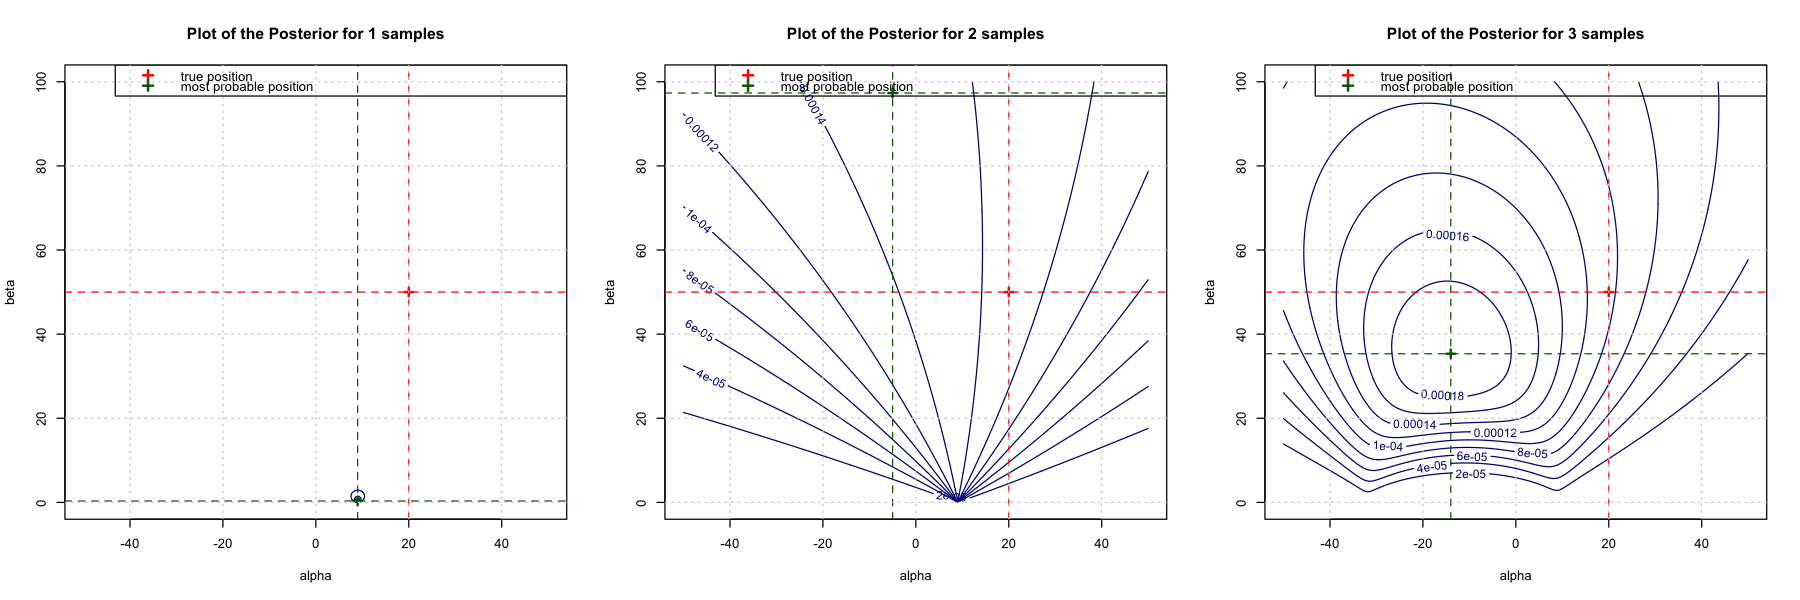

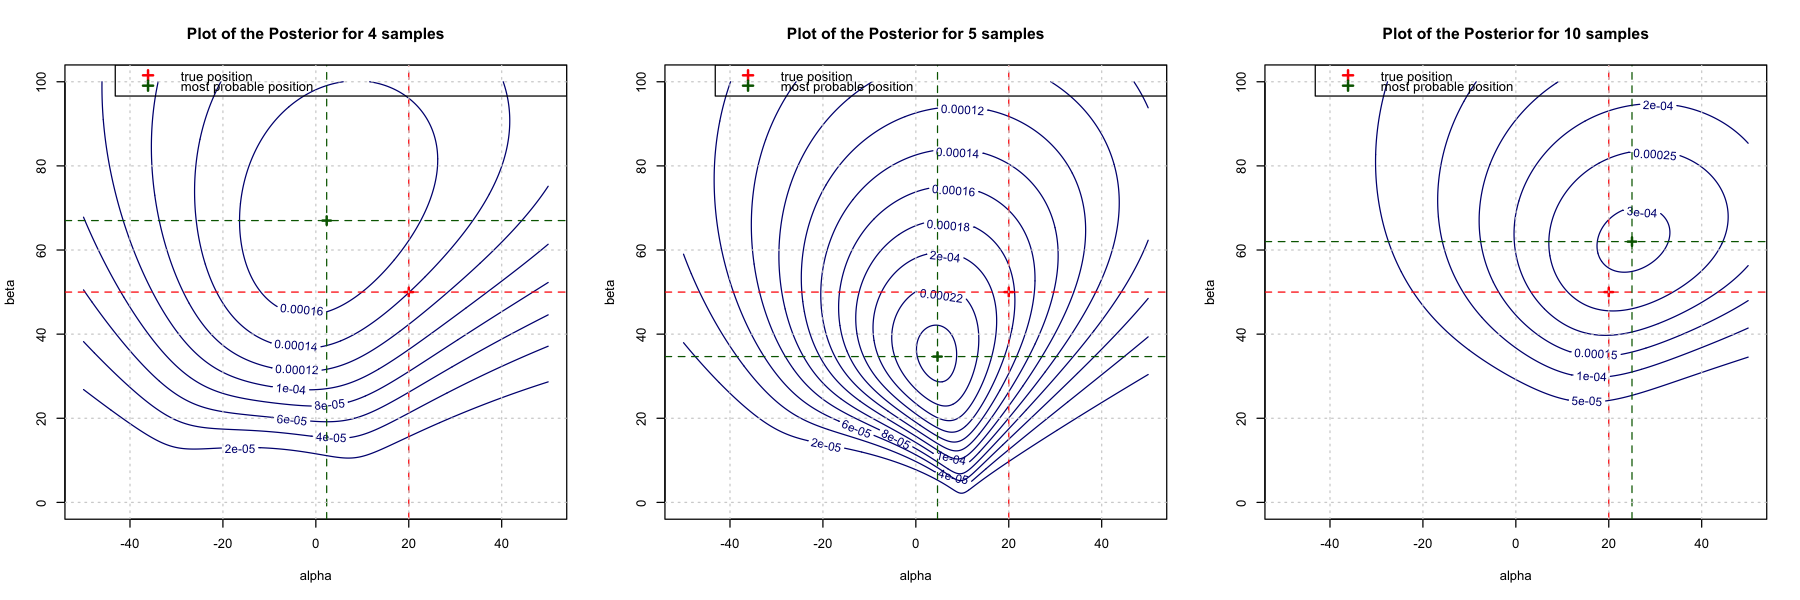

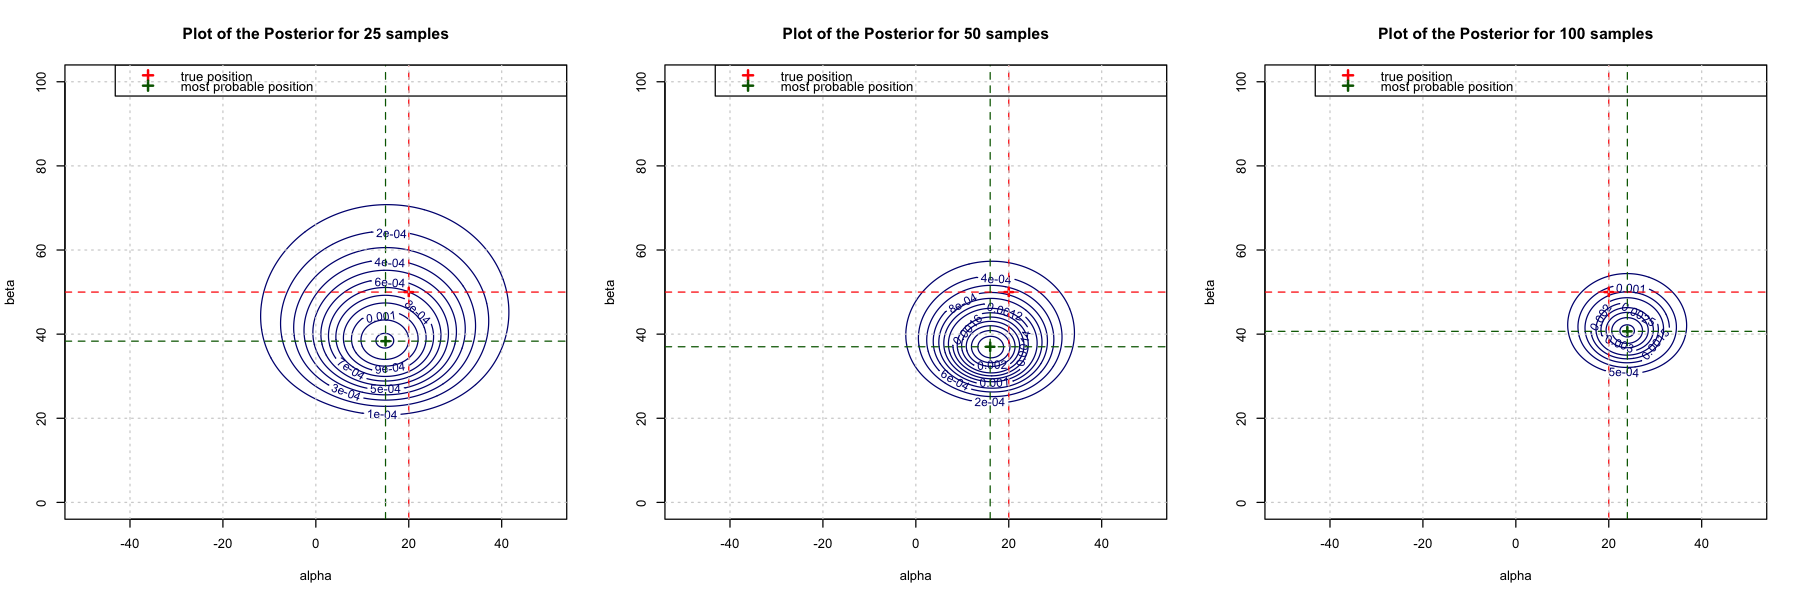

In [17]:
# set the size and position of the plots
par(mfrow=c(1,3))
options(repr.plot.width=15, repr.plot.height=5)

# List of how many sample to plot
n.data <- c(1,2,3,4,5,10,25,50,100)

for(i in n.data){
    
    data <- x.k[1:i]
    
    f <- function(alpha,beta){ log.post.func(data, alpha, beta) }
    log.grid.post.values <- outer(alphas, betas, Vectorize(f))
    # Compute the normalized posterior
    log.grid.post.values <- log.grid.post.values - max(log.grid.post.values) # Shift for the maximum
    y.post <- exp(log.grid.post.values)/(h.x*h.y*sum(exp(log.grid.post.values)))
    grid.values <- matrix(y.post,nrow=length(alphas), ncol=length(betas))
    
    # Plot the contour plot of Posterior
    contour(alphas, betas, grid.values, main=paste("Plot of the Posterior for",i,"samples"),
            xlim=c(min(x.min,alpha.true),max(x.max,alpha.true)), ylim=c(min(0,beta.true),max(y.max,beta.true)), xlab="alpha", ylab="beta",col="navy",
            nlevels=10)  
    
    # Plot of the true value of alpha and beta
    points(alpha.true, beta.true, pch=3, col="red", lwd=2) 
    abline(h=beta.true, lty=2,col='red')
    abline(v=alpha.true, lty=2,col='red')
    
    # Plot the most probable values of the Posterior
    index <- c(which(grid.values==max(grid.values), arr.ind=TRUE))
    max.alpha <- alphas[index[1]]
    max.beta <- betas[index[2]]
    points(max.alpha, max.beta, pch=3, col="darkgreen", lwd=2) 
    abline(h=max.beta, lty=2,col='darkgreen')
    abline(v=max.alpha, lty=2,col='darkgreen')  

    legend("topright",c("true position","most probable position"), col=c("red","darkgreen"), pch=3, pt.cex=1.2, pt.lwd=2) 
    grid()
    
}

## Exercise 3 -  Signal over Background example <a class="anchor" id="3"></a>
* [Index](#0)

Given the Signal over Background example discussed last week, analyze and discuss the following cases: 

### A)  vary the sampling resolution of used to generate the data, keeping the same sampling range.
* change the resolution $ w = \{0.1,0.25,1,2,3\}$
* check the effect on the results

The number of **expected photons** is $S_k$ (not generally an integer): 

$$
S_k = \Delta t \Big[ A \exp{\Big(- \frac{(x_k-x_0)^2}{2w^2}\Big)} + B \Big]
$$

The number of **observed photons** $N$ (integer number) follows the **Poisson distribution**, thus the **Likelihood** of the data is:

$$
P(\{N_j\}|A,B,M) = \prod_j \frac{S_k^{N_j} e^{-S_k}}{N_j!}
$$

The model has 5 parameters, but we assume that $x_0$, $w$ and $\Delta t$ are **known**. 

We want to infer $P(A,B|\{N_j\},M)$ from the data, where $M$ identifies the model.

We assume that $A$ and $B$ cannot be negative. Therefore, the Prior $P(A,B | M)$ is constant when both $A$ and $B$ are positive, and zero otherwise.

Thus, the **Posterior** is:

$$
P(A,B|\{N_j\},M) = \frac{1}{Z} \prod_j \frac{S_k^{N_j} e^{-S_k}}{N_j!}
$$

and the **log Posterior** results:

$$
L = \log P(A,B|\{N_j\},M) = const + \sum[N_j \log S_k - S_k]
$$

where the constant term absorbs terms that do not depend on $A$ or $B$.

The best estimates are given by values of $A$ and $B$ that maximize $L$.

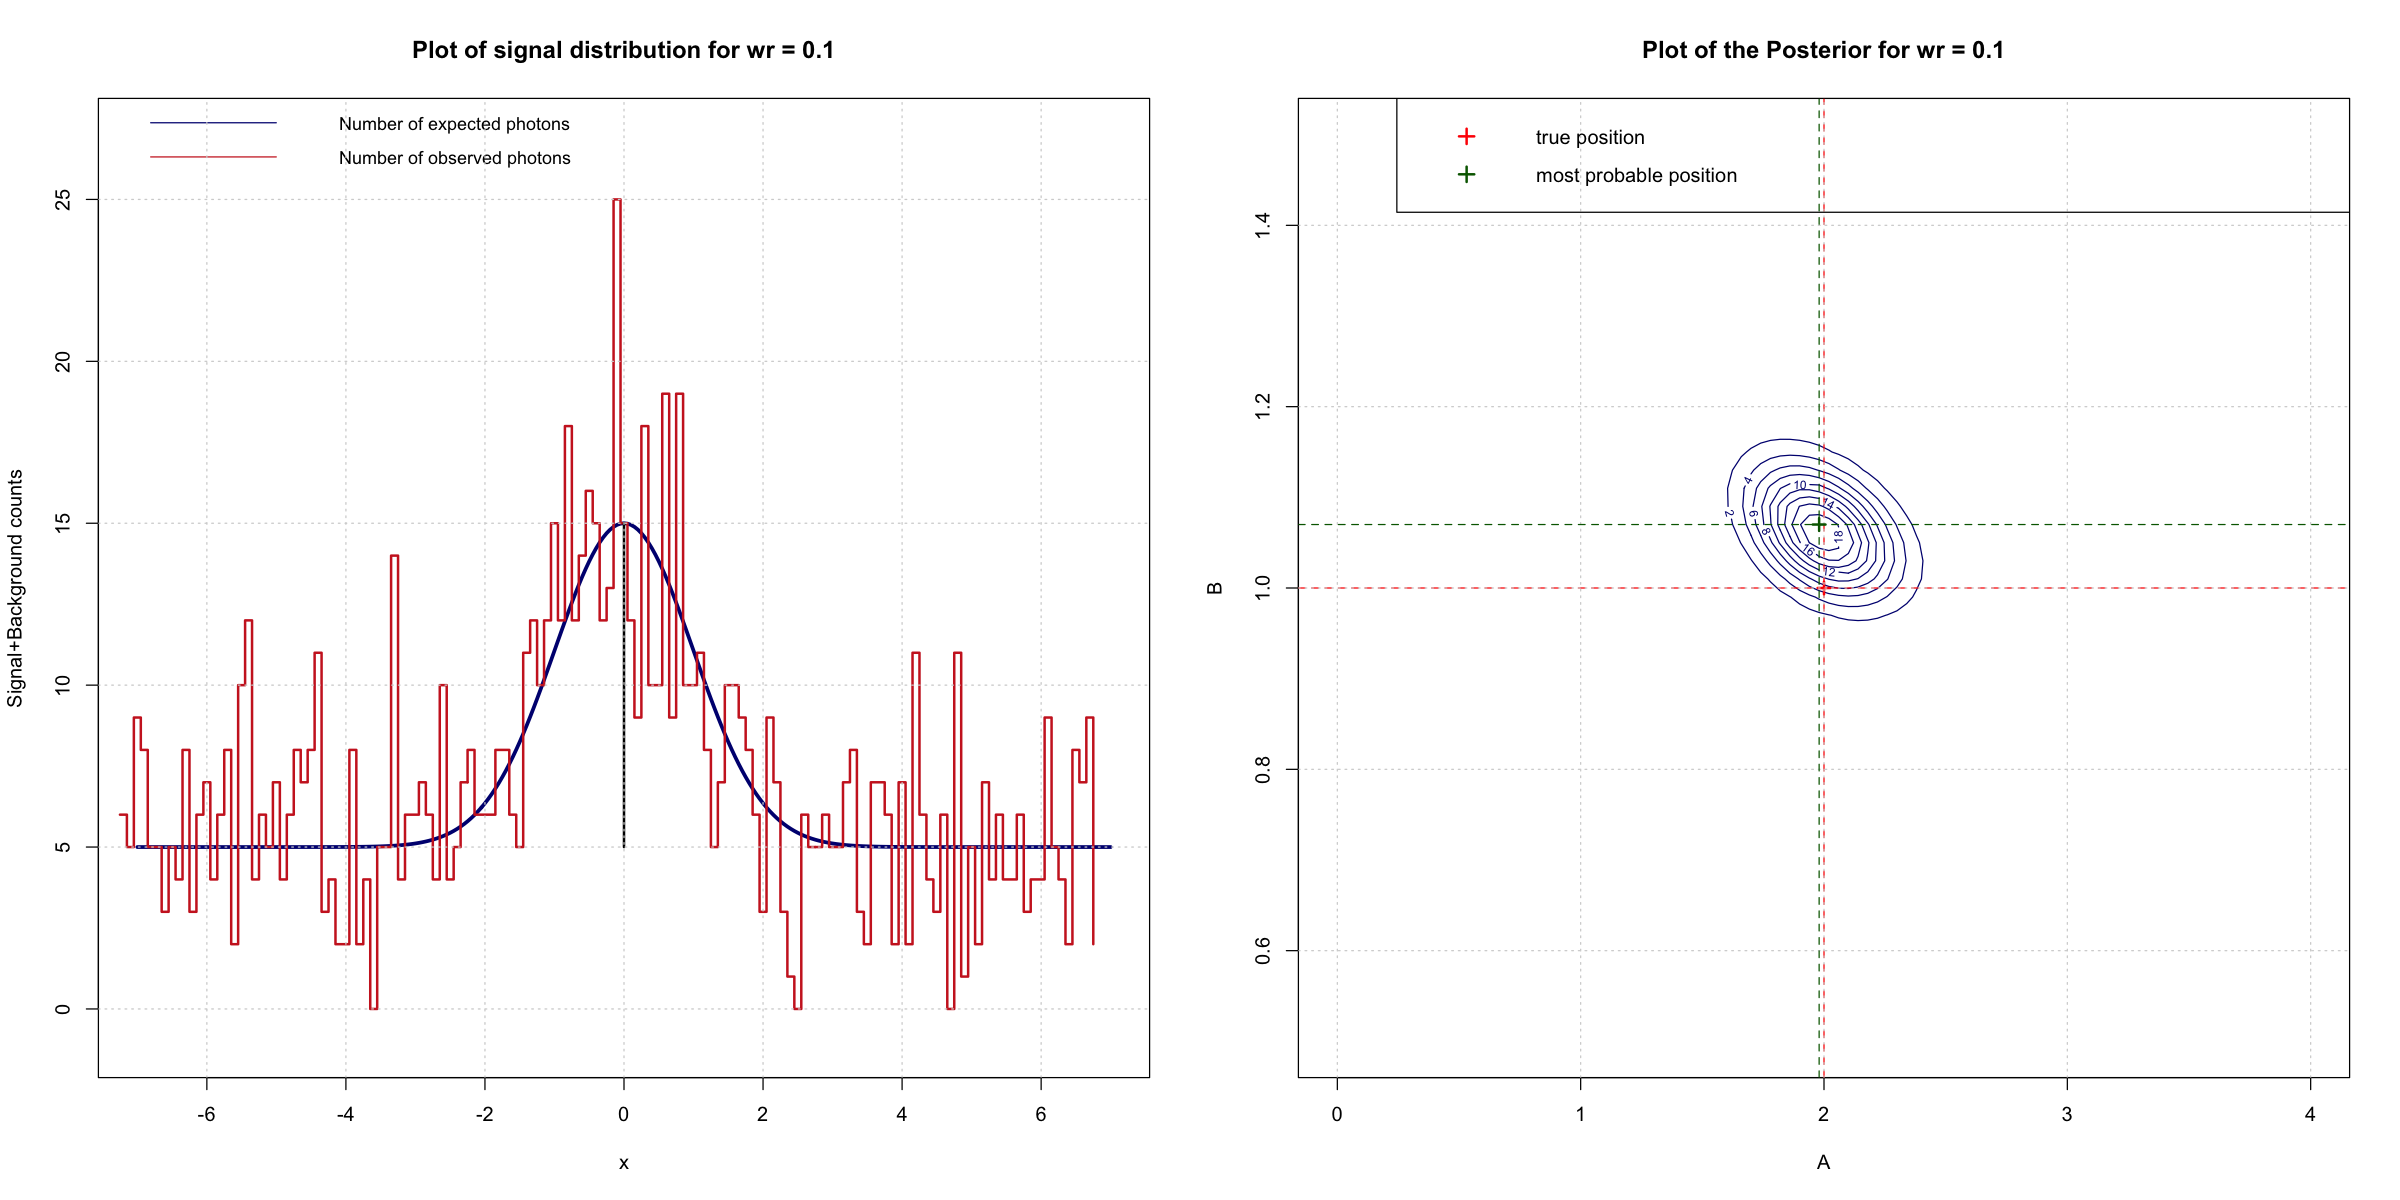

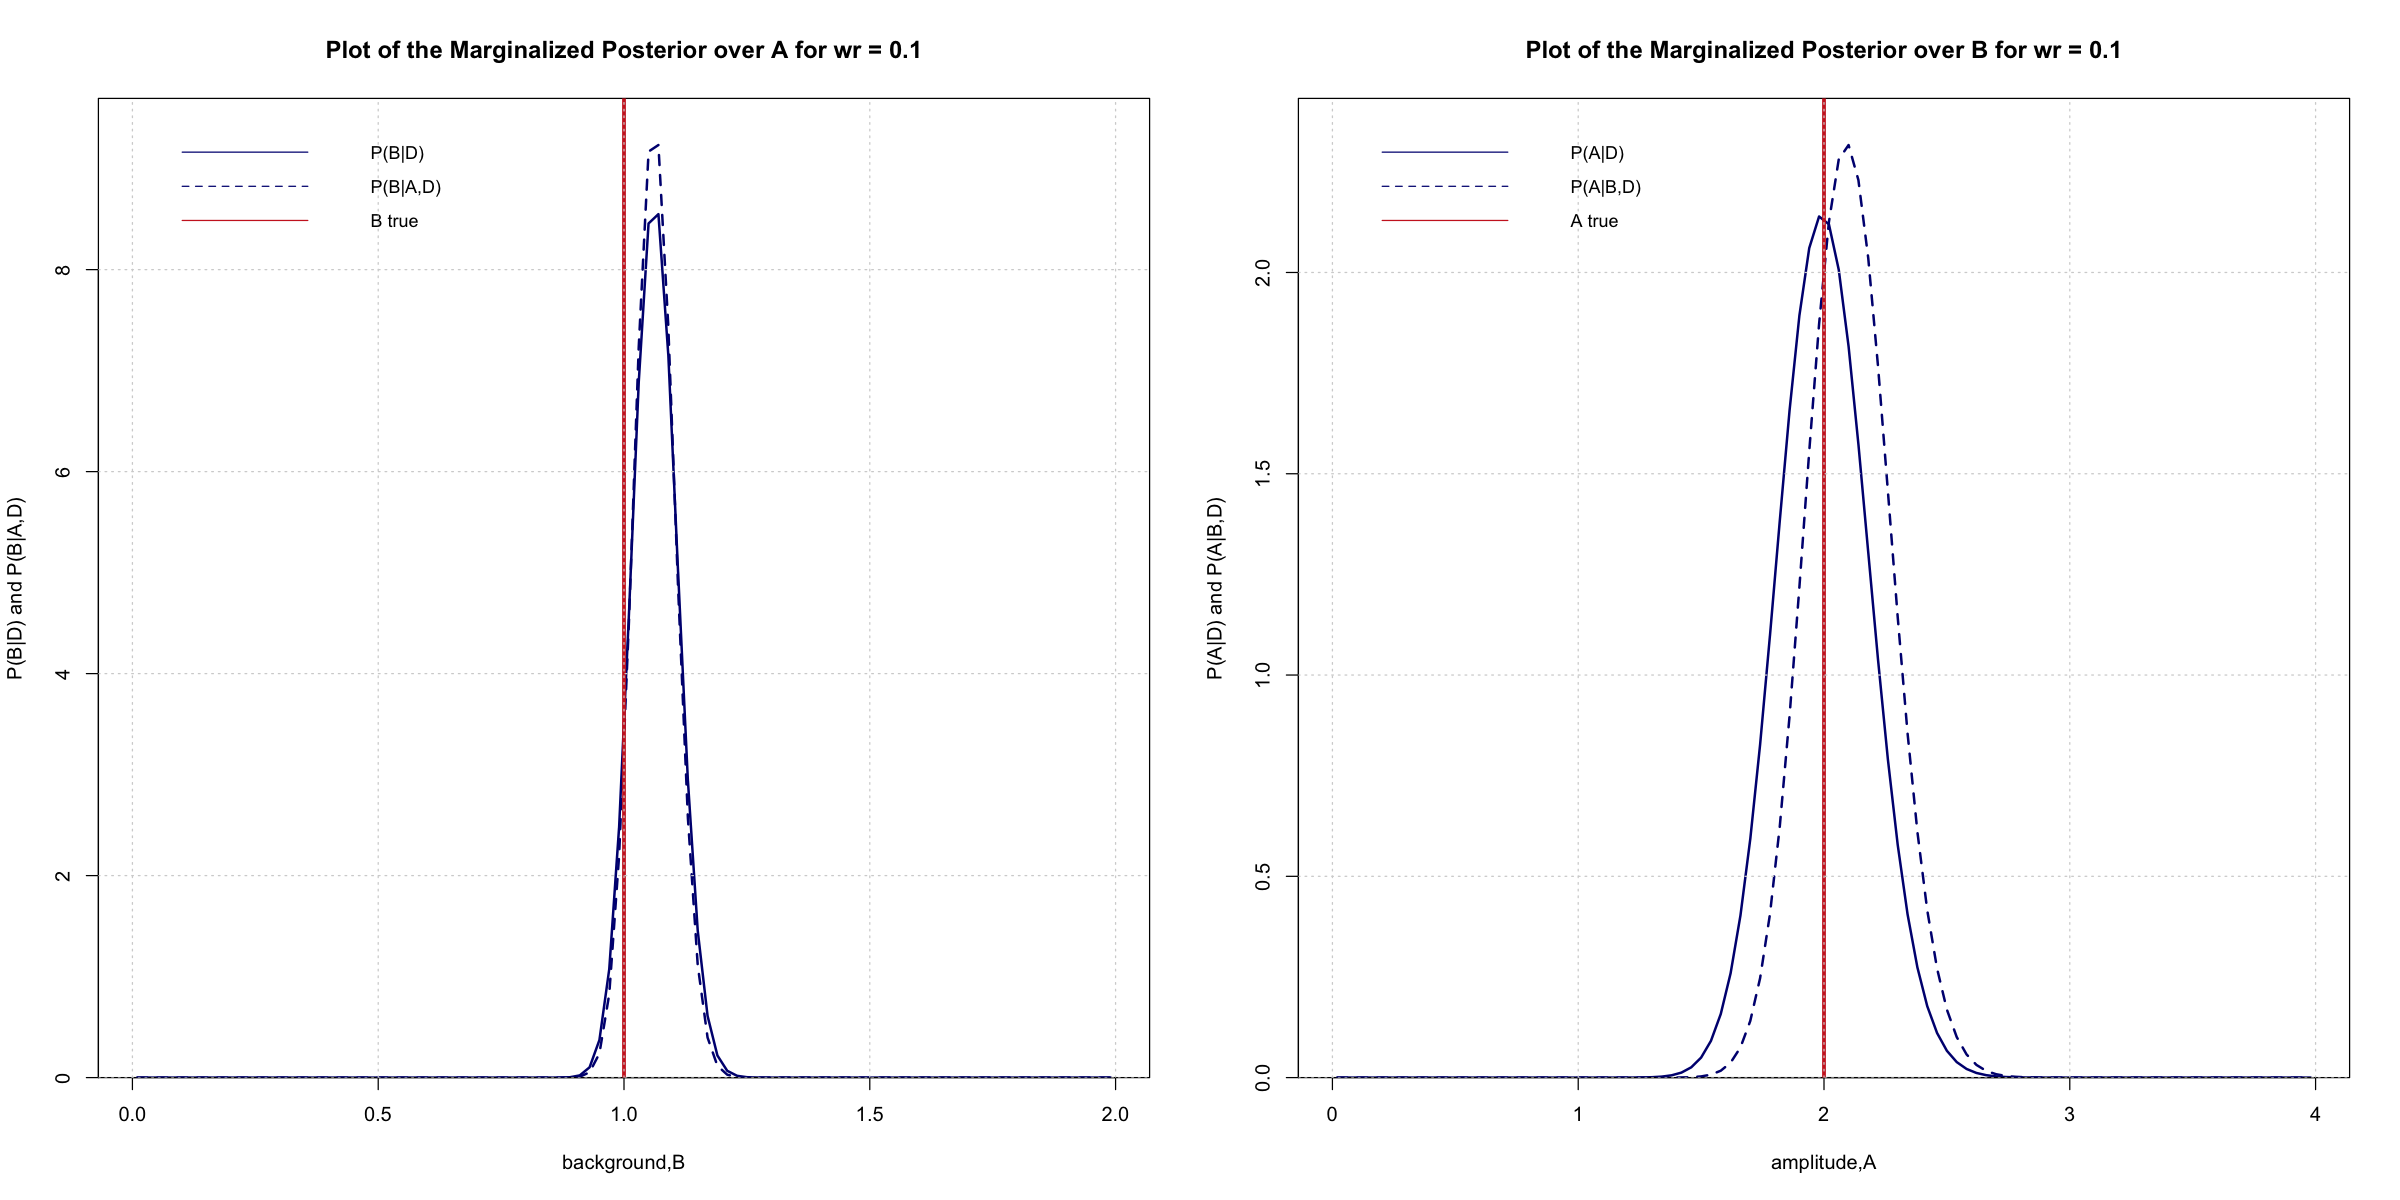

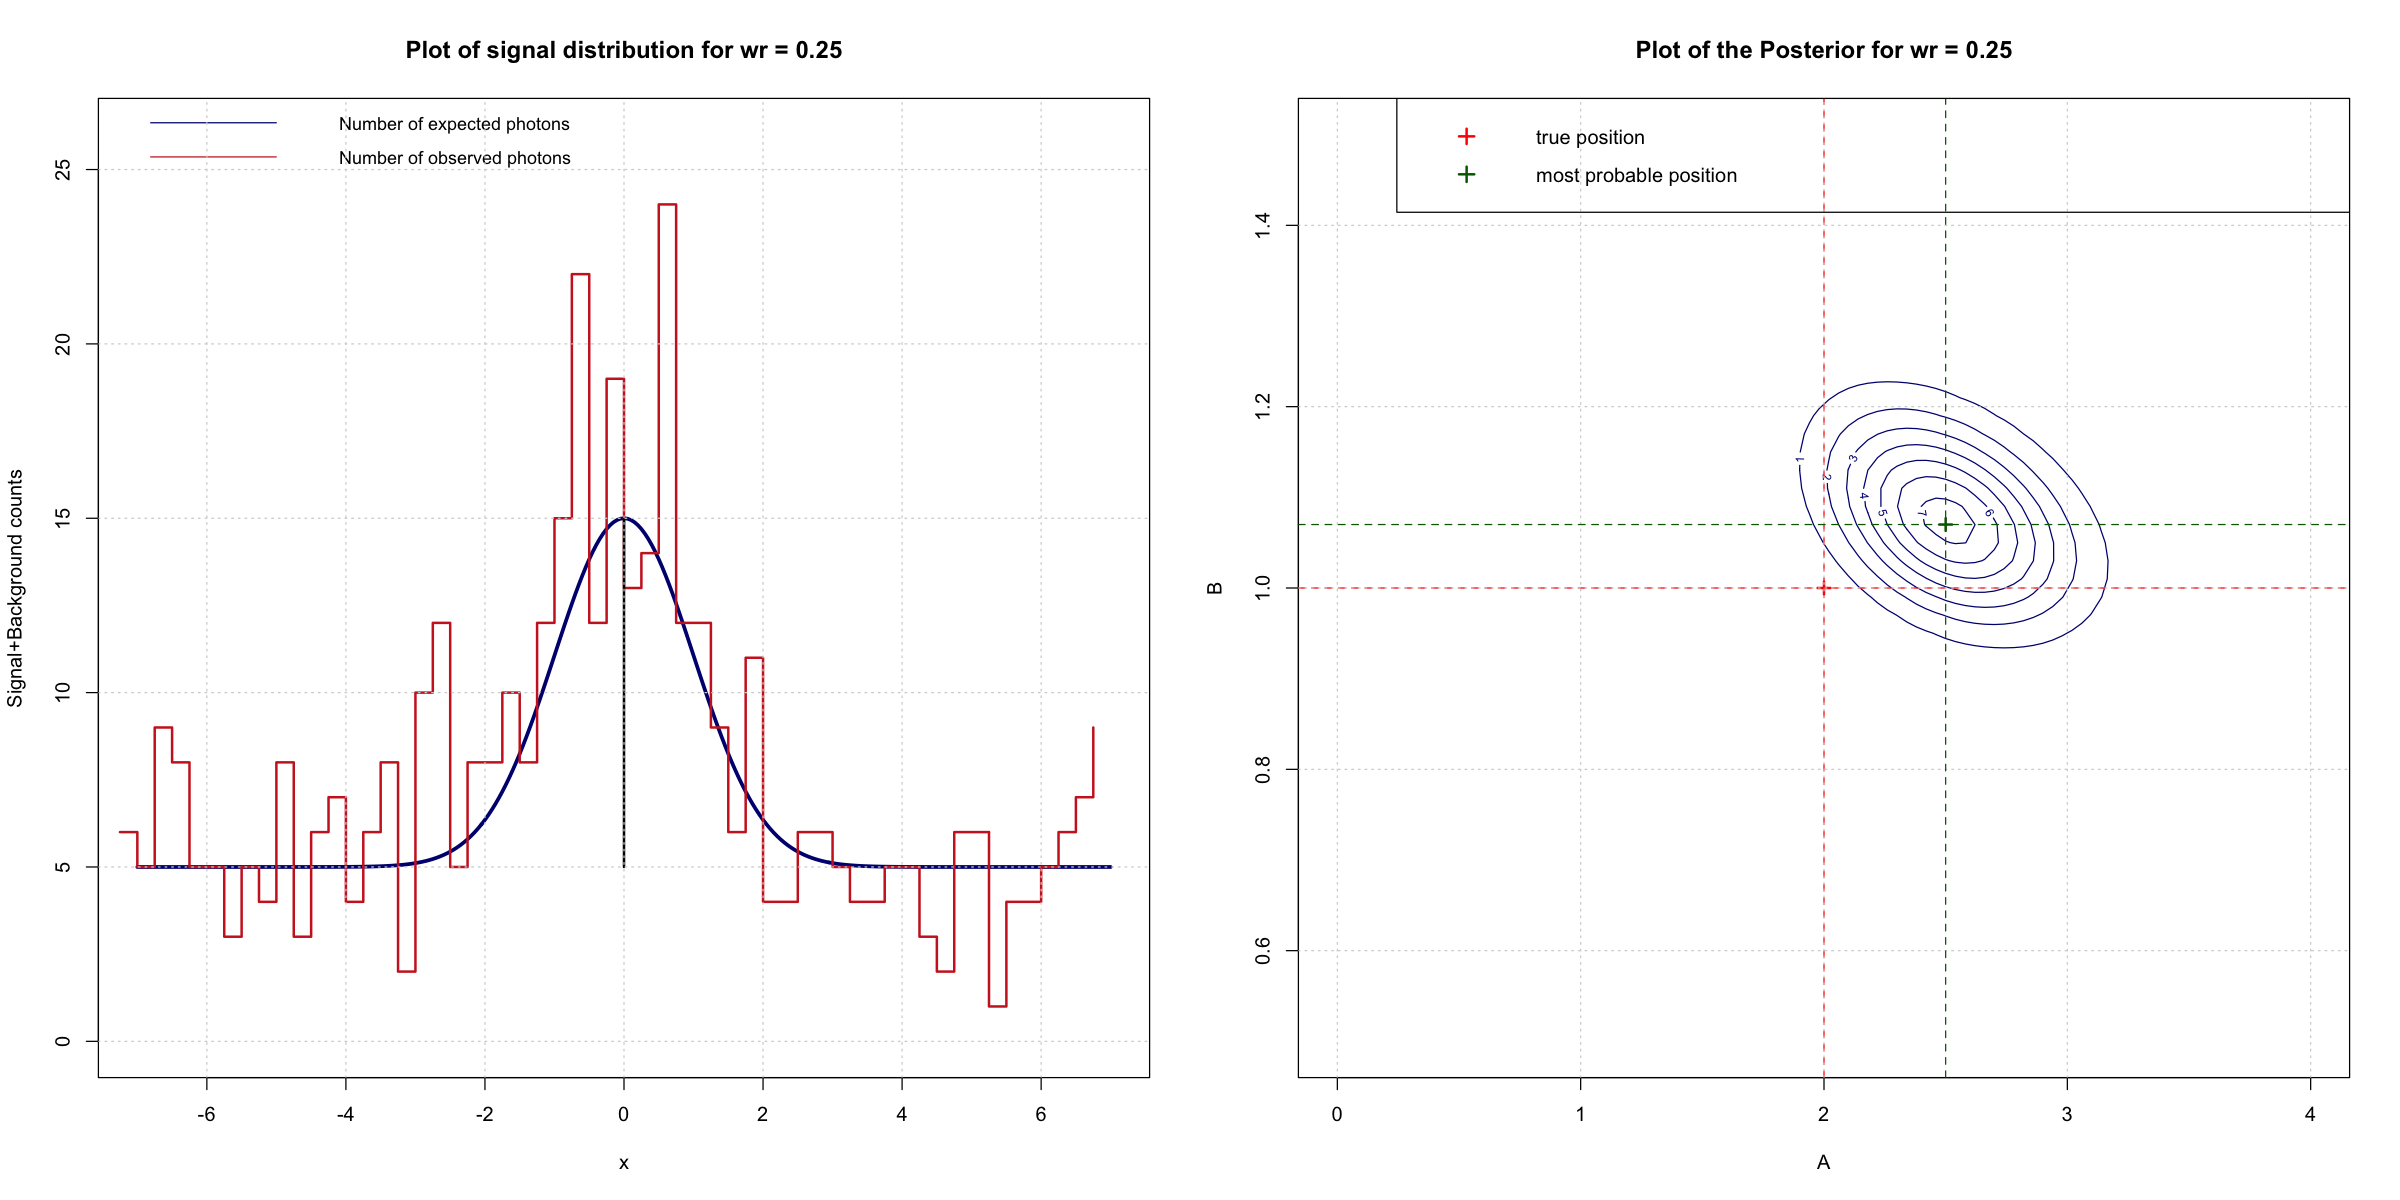

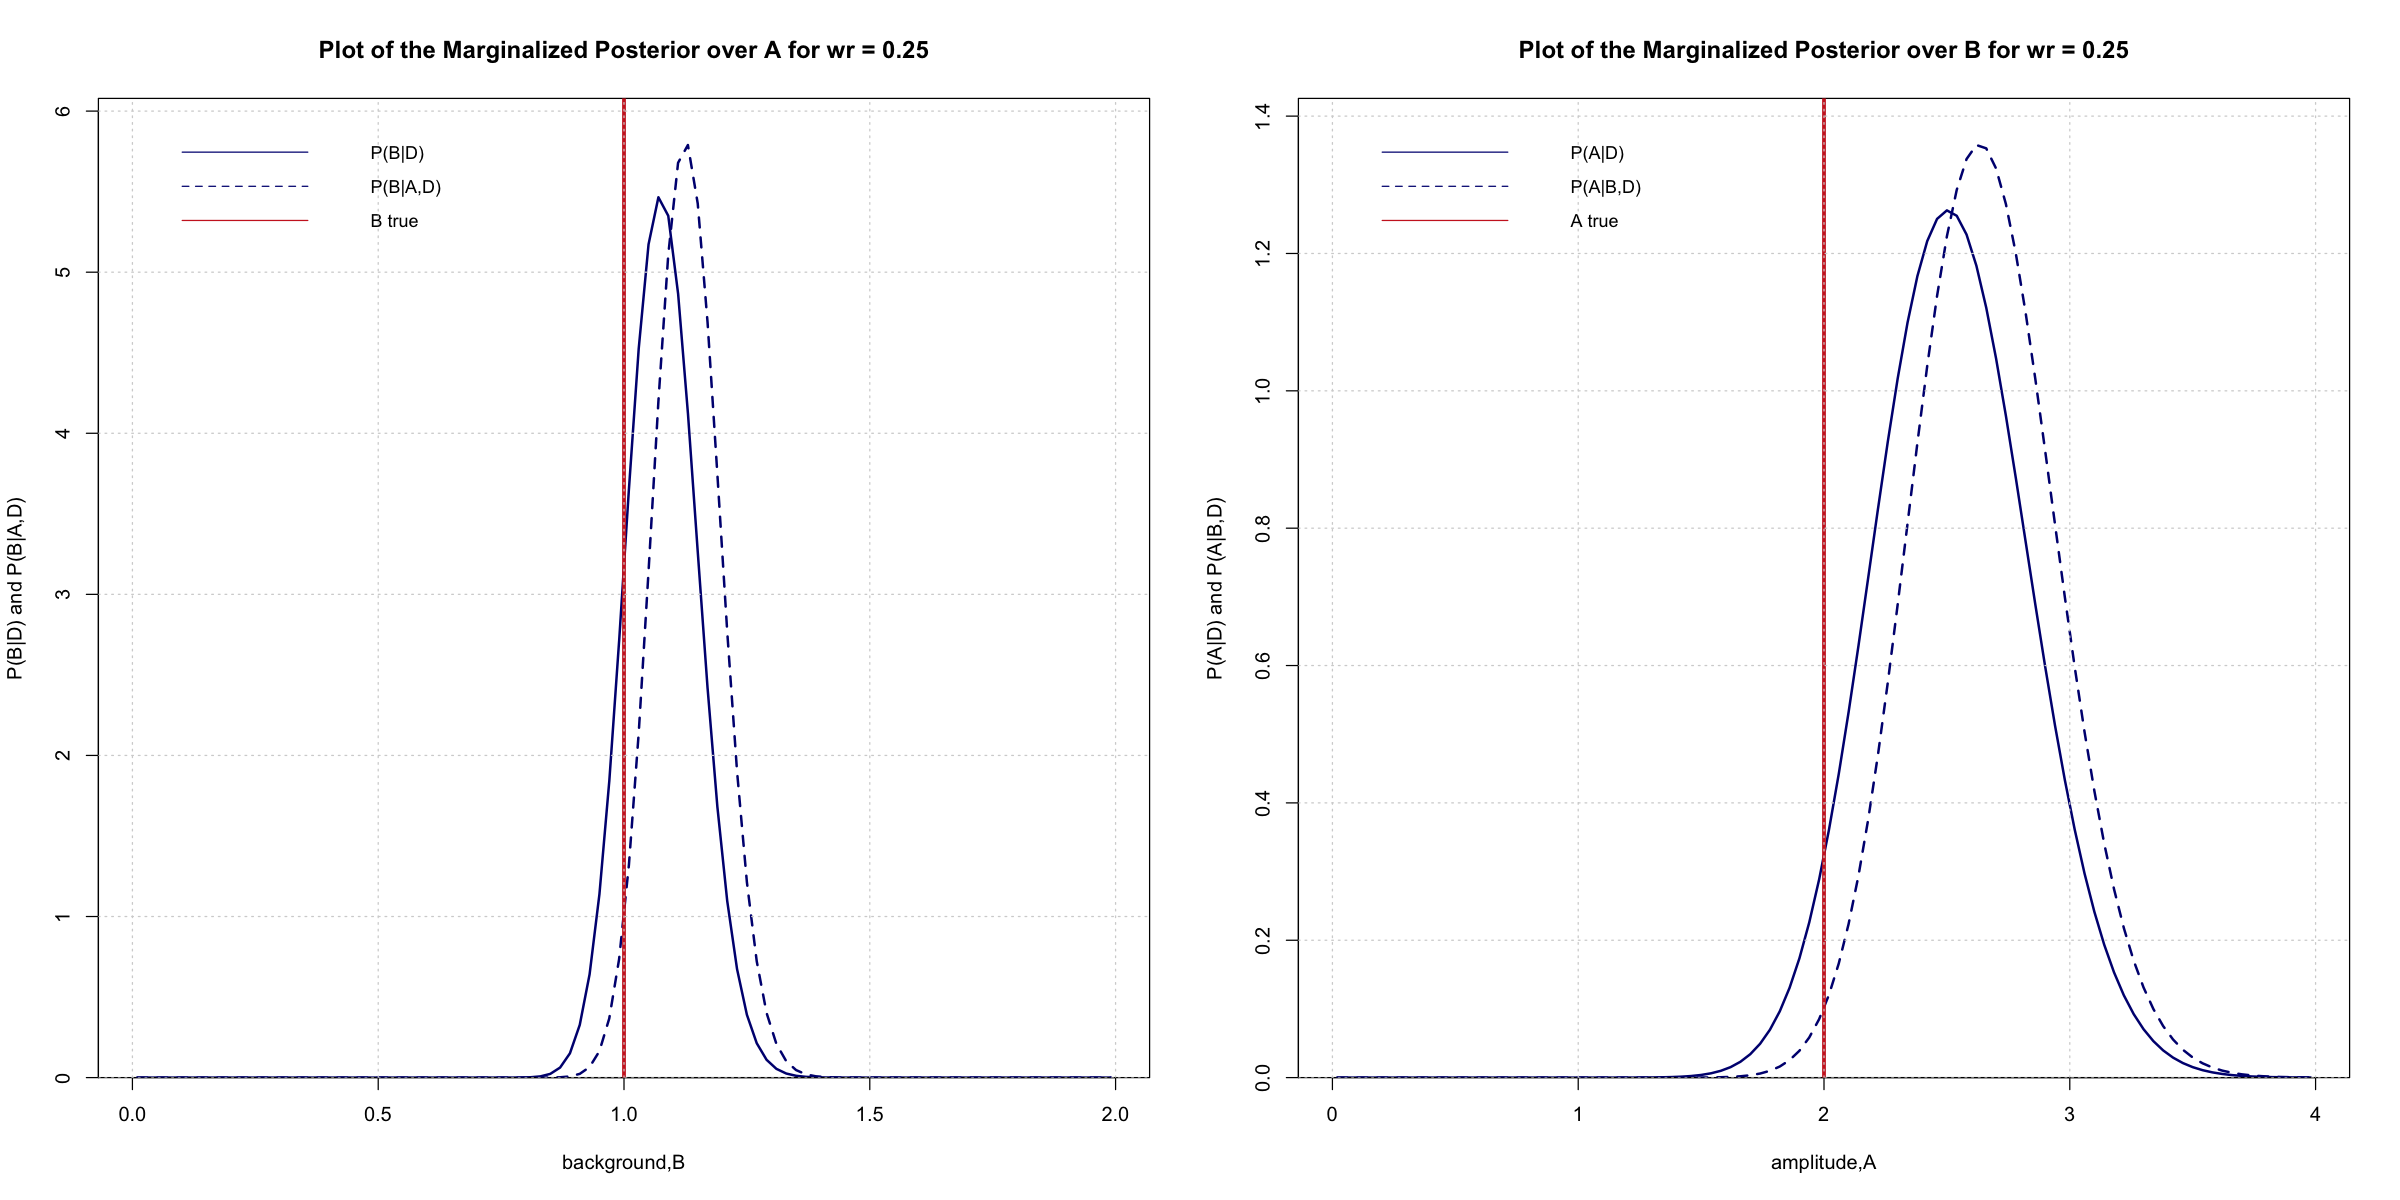

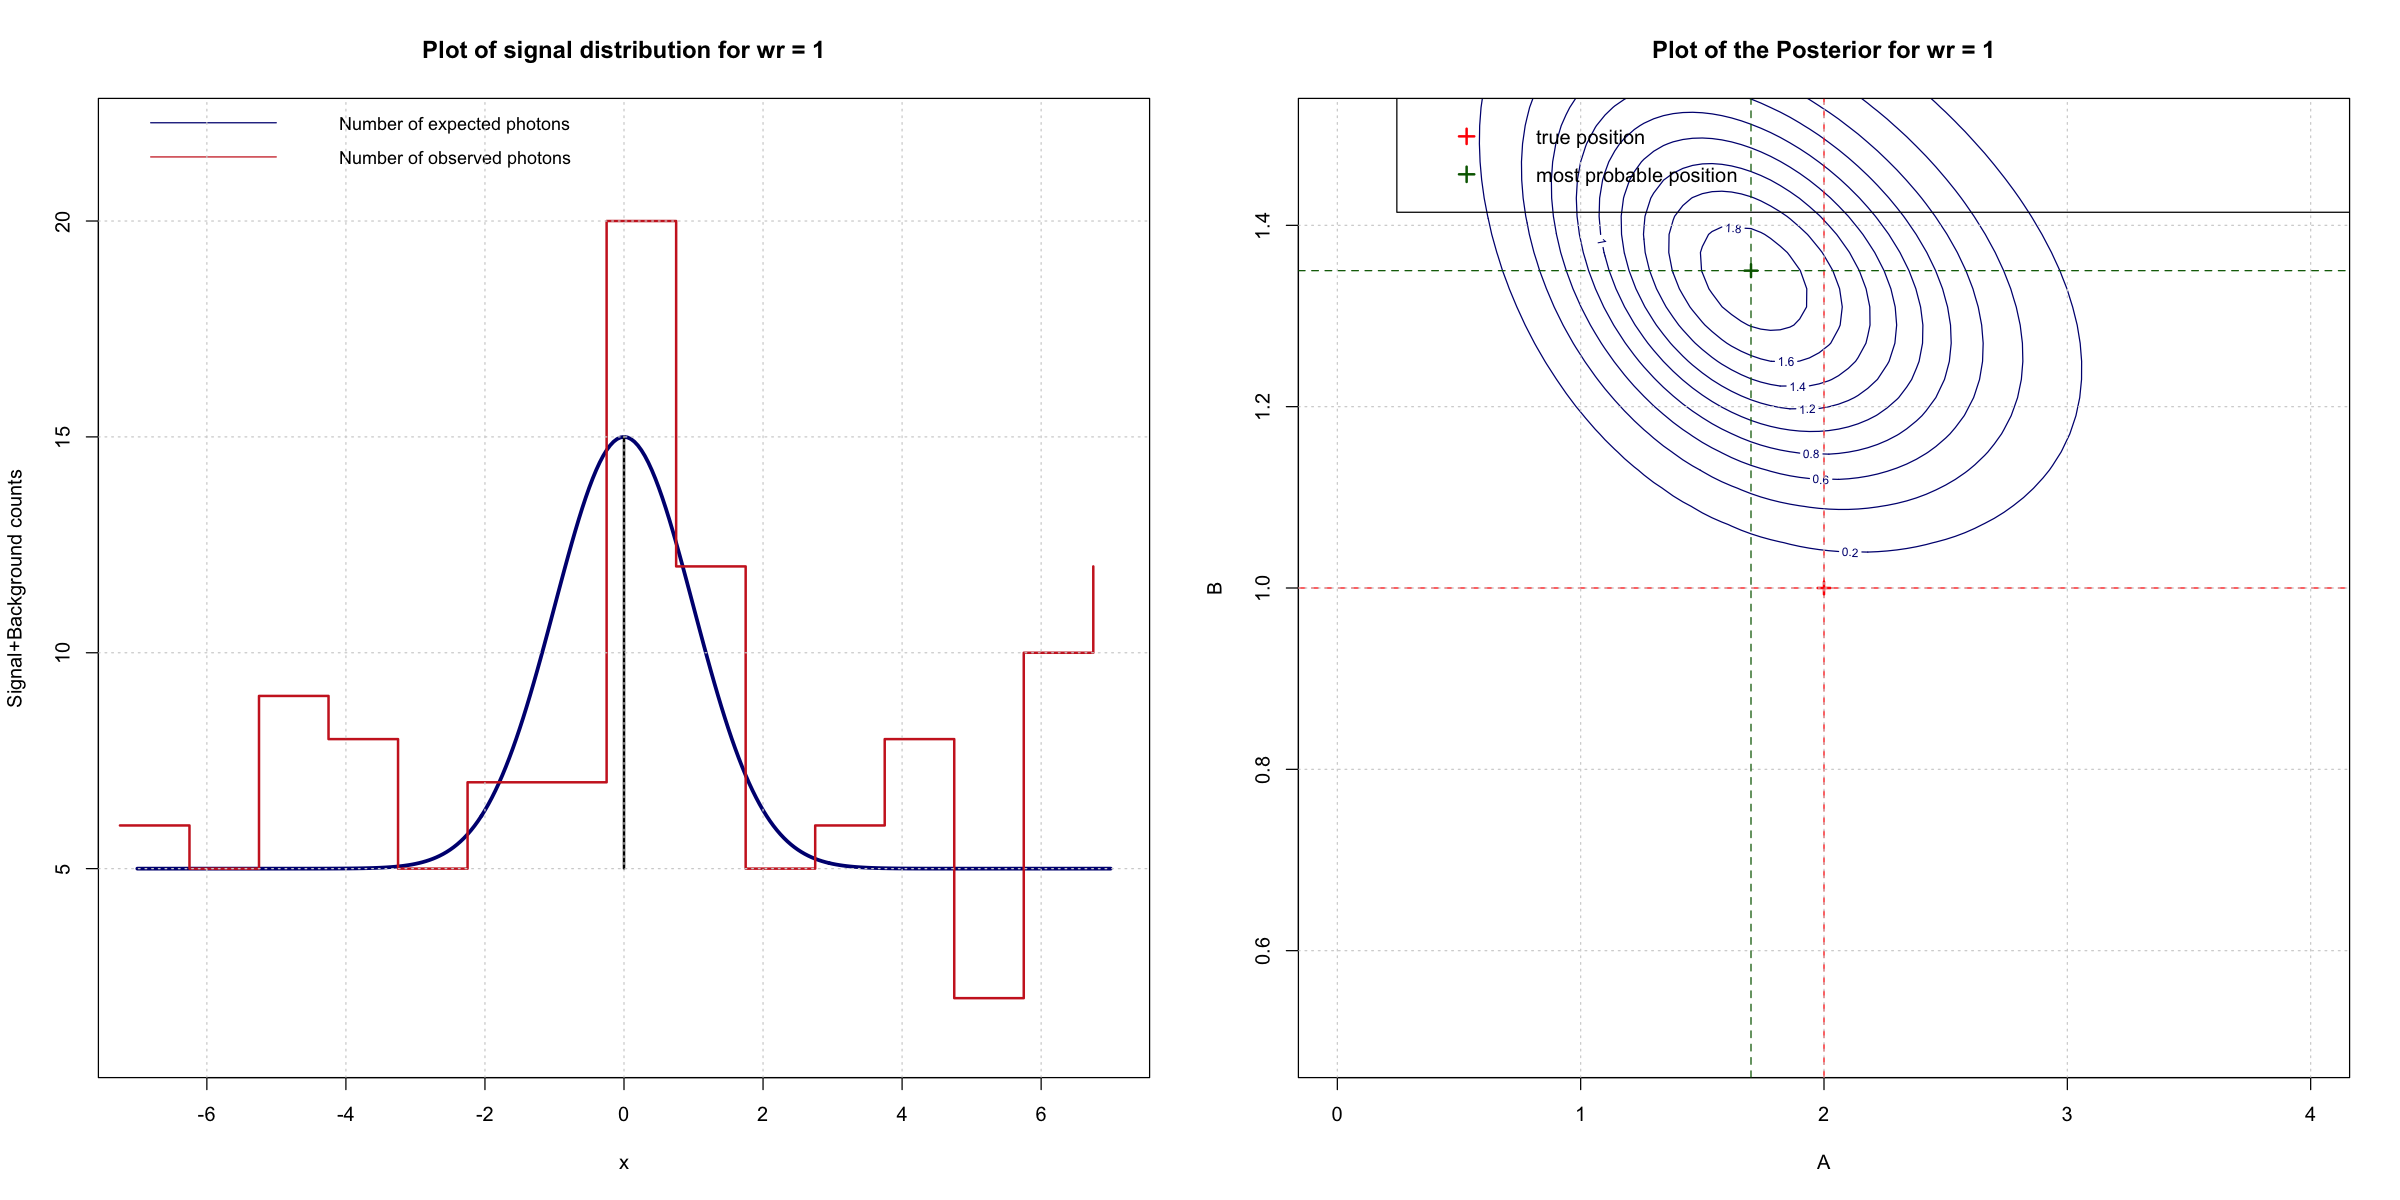

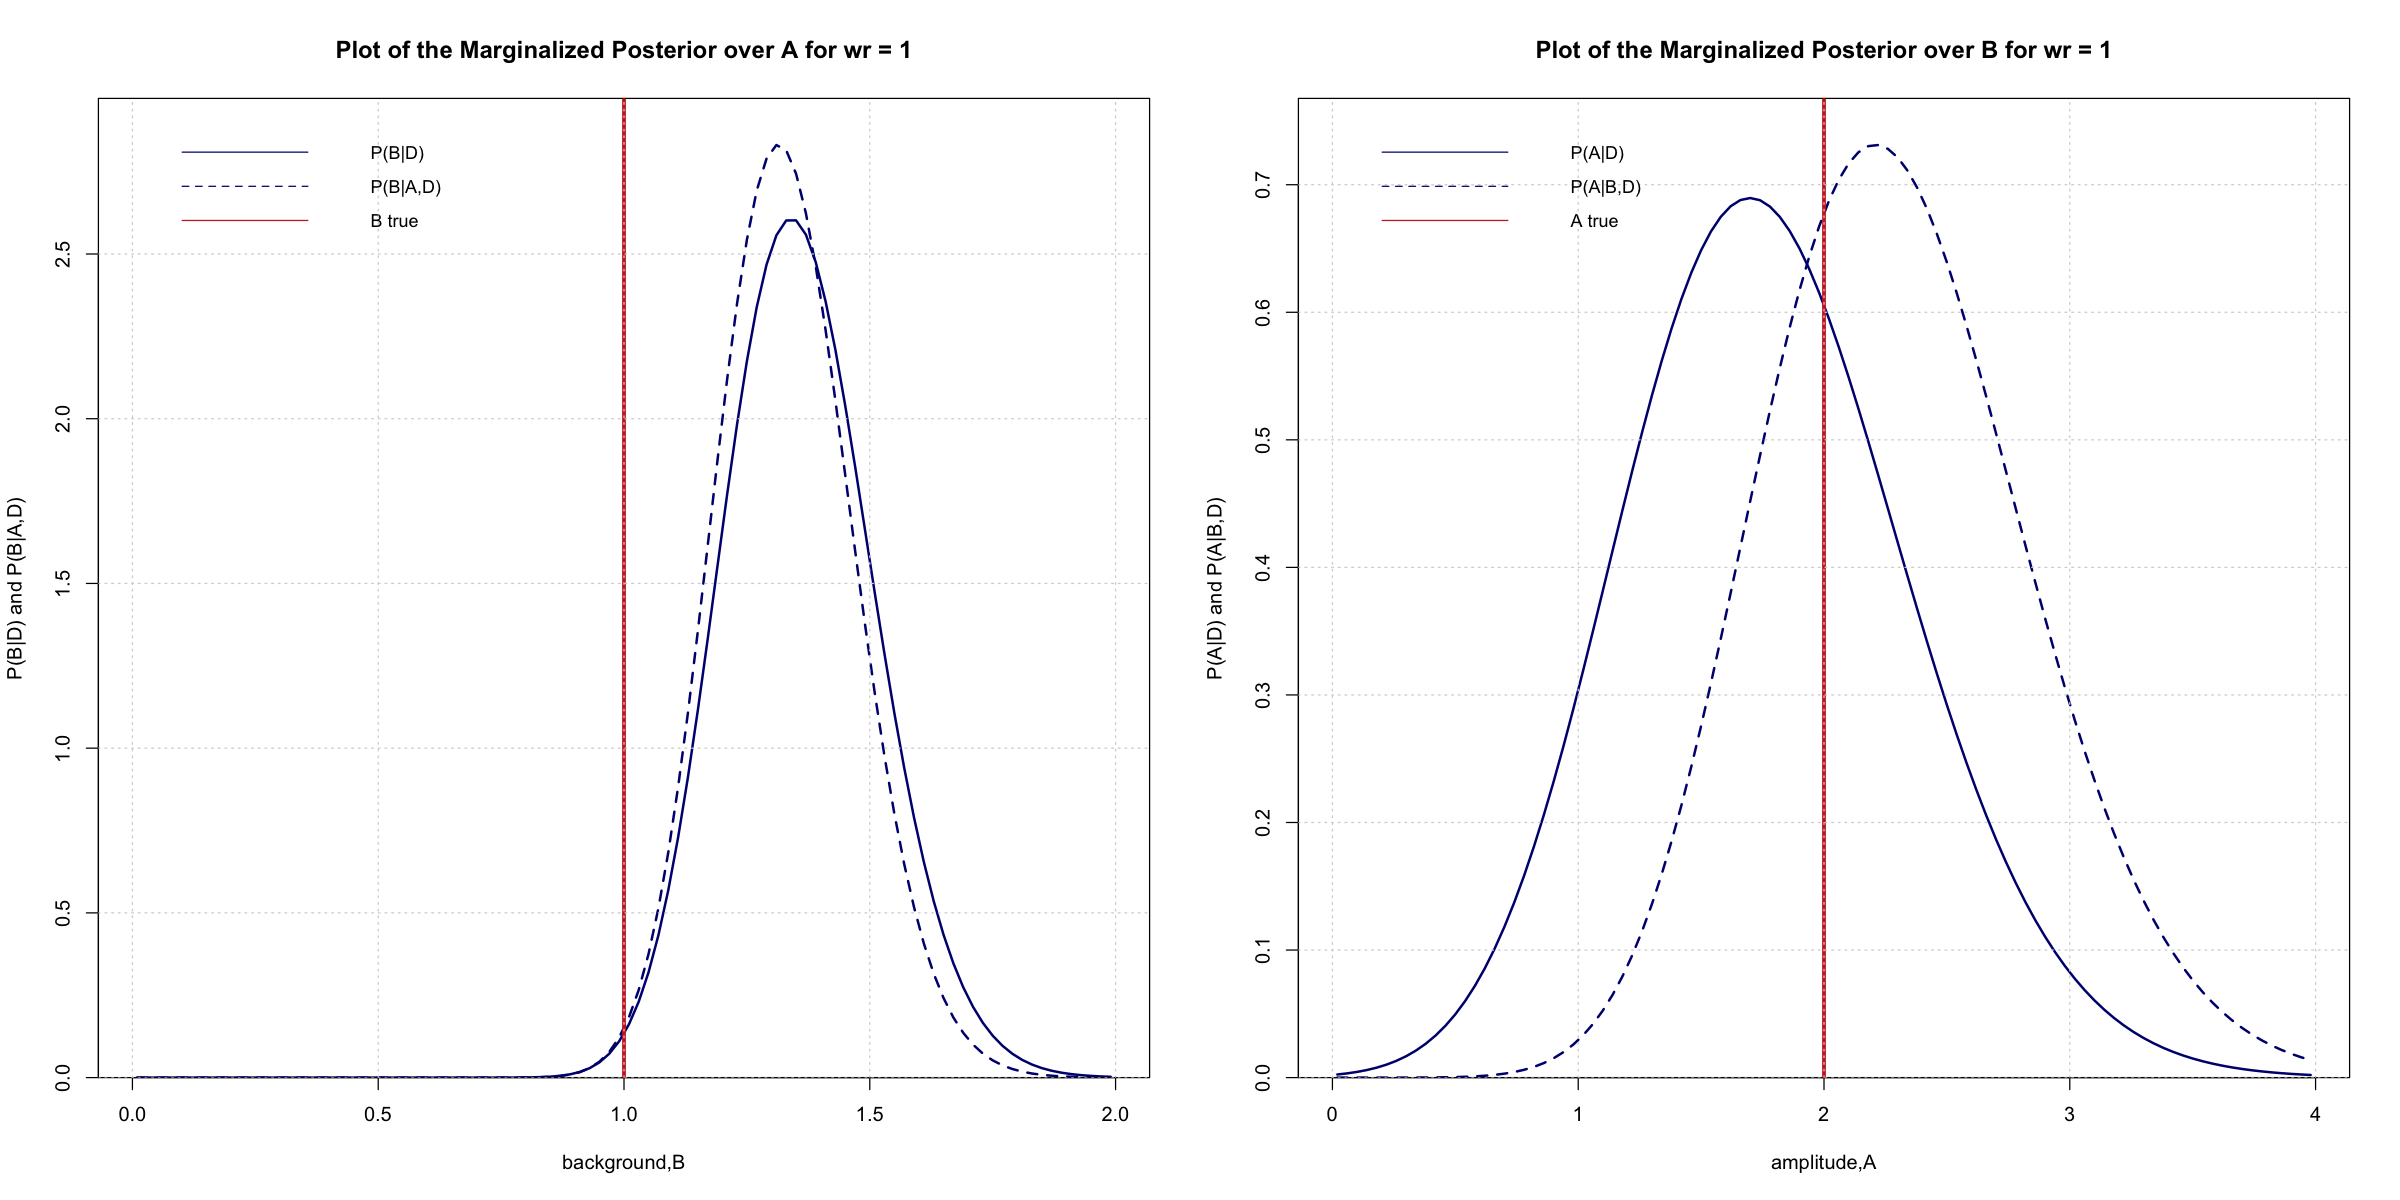

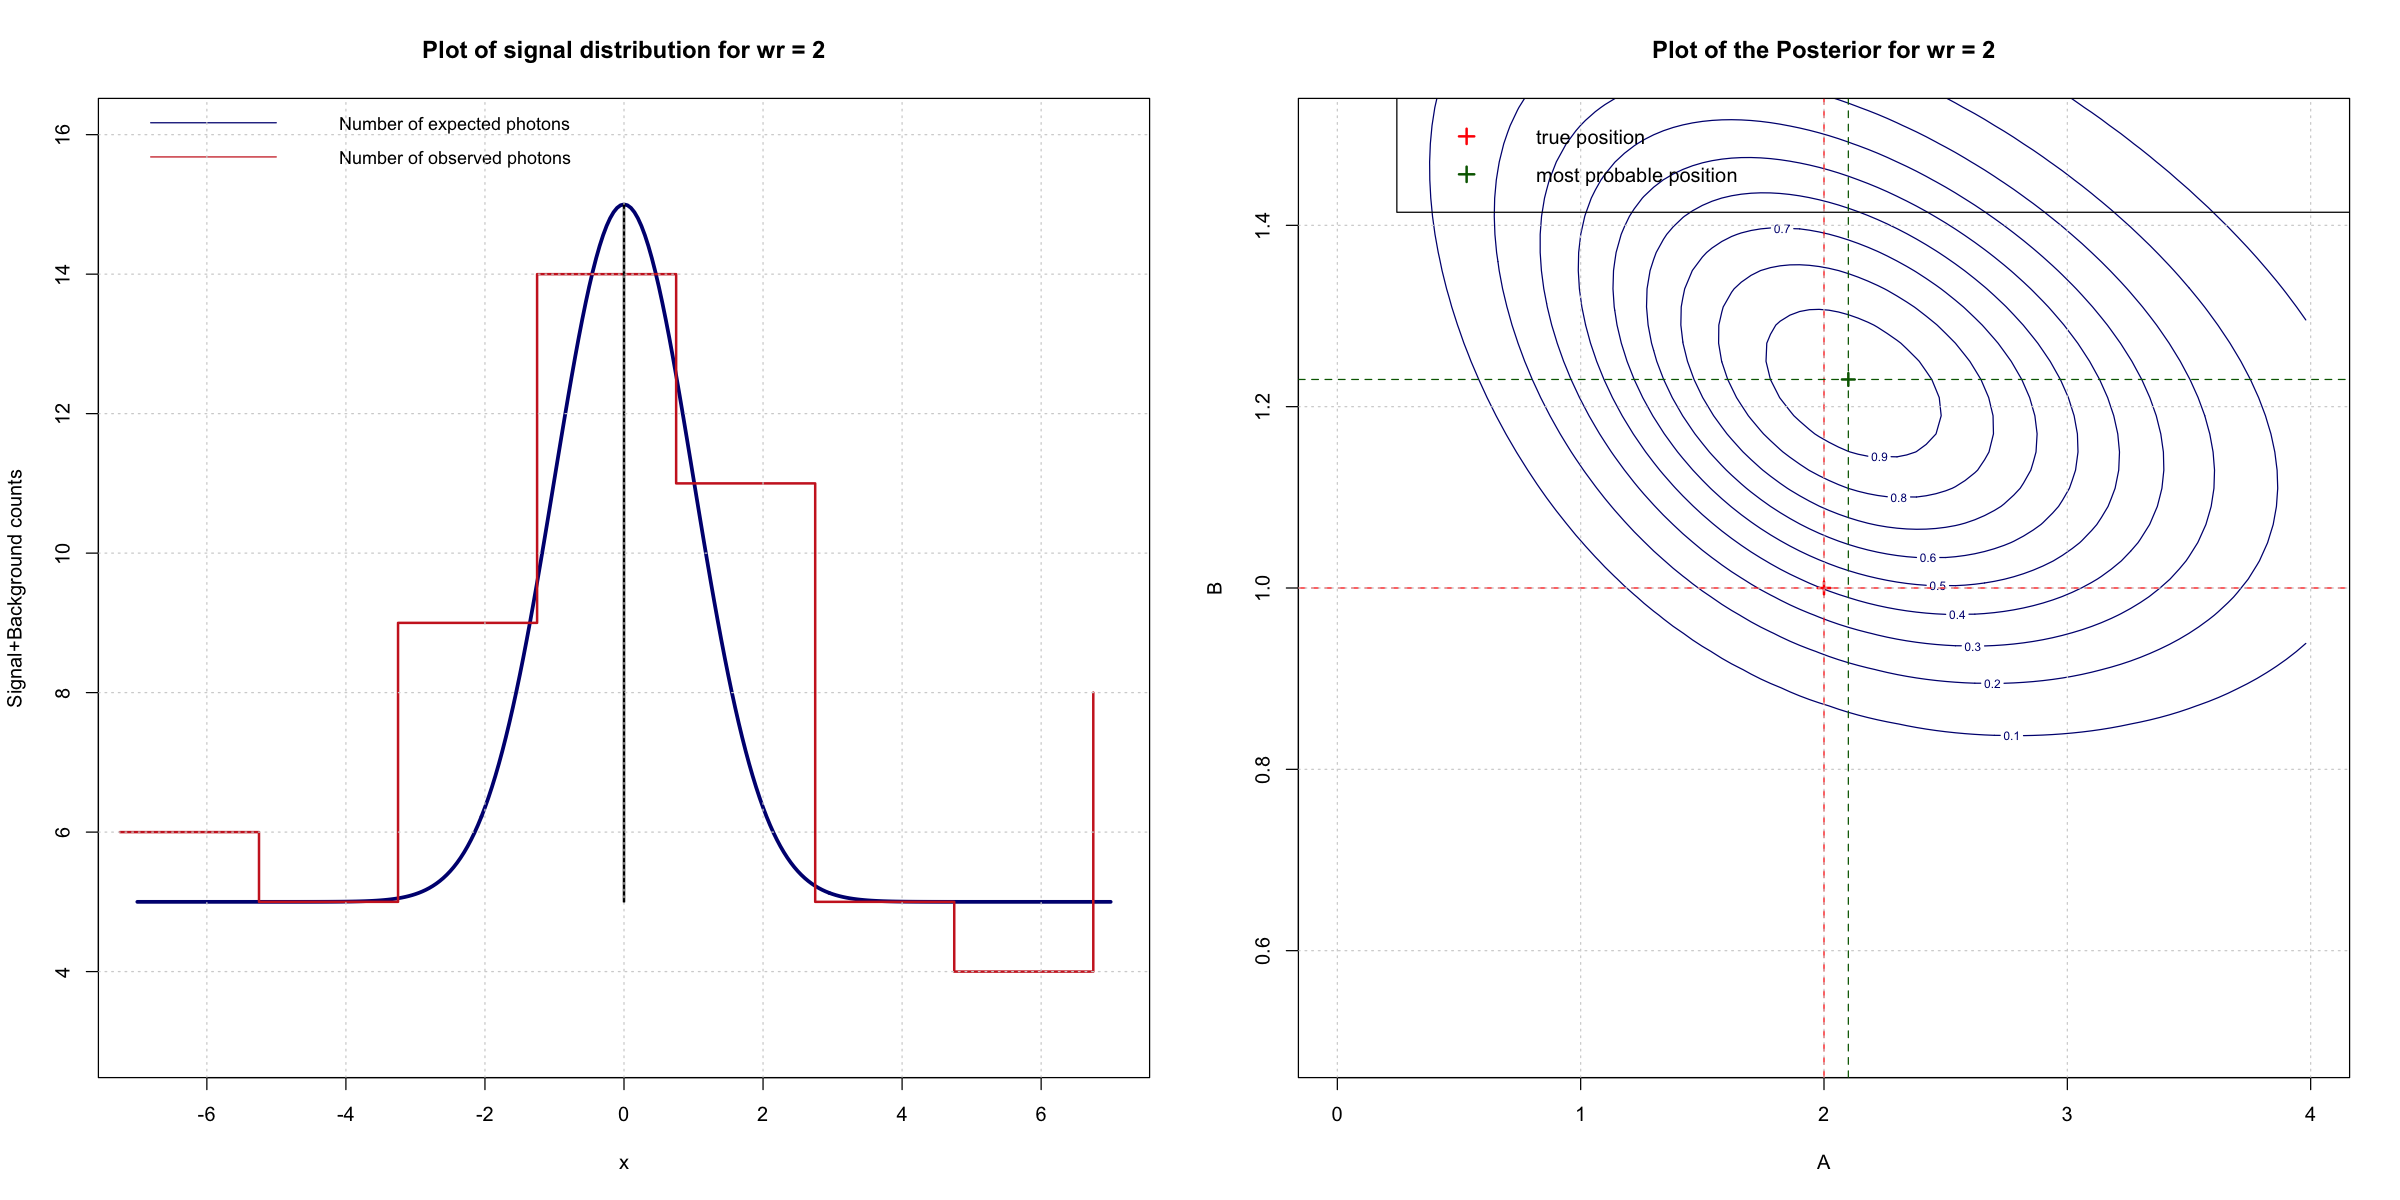

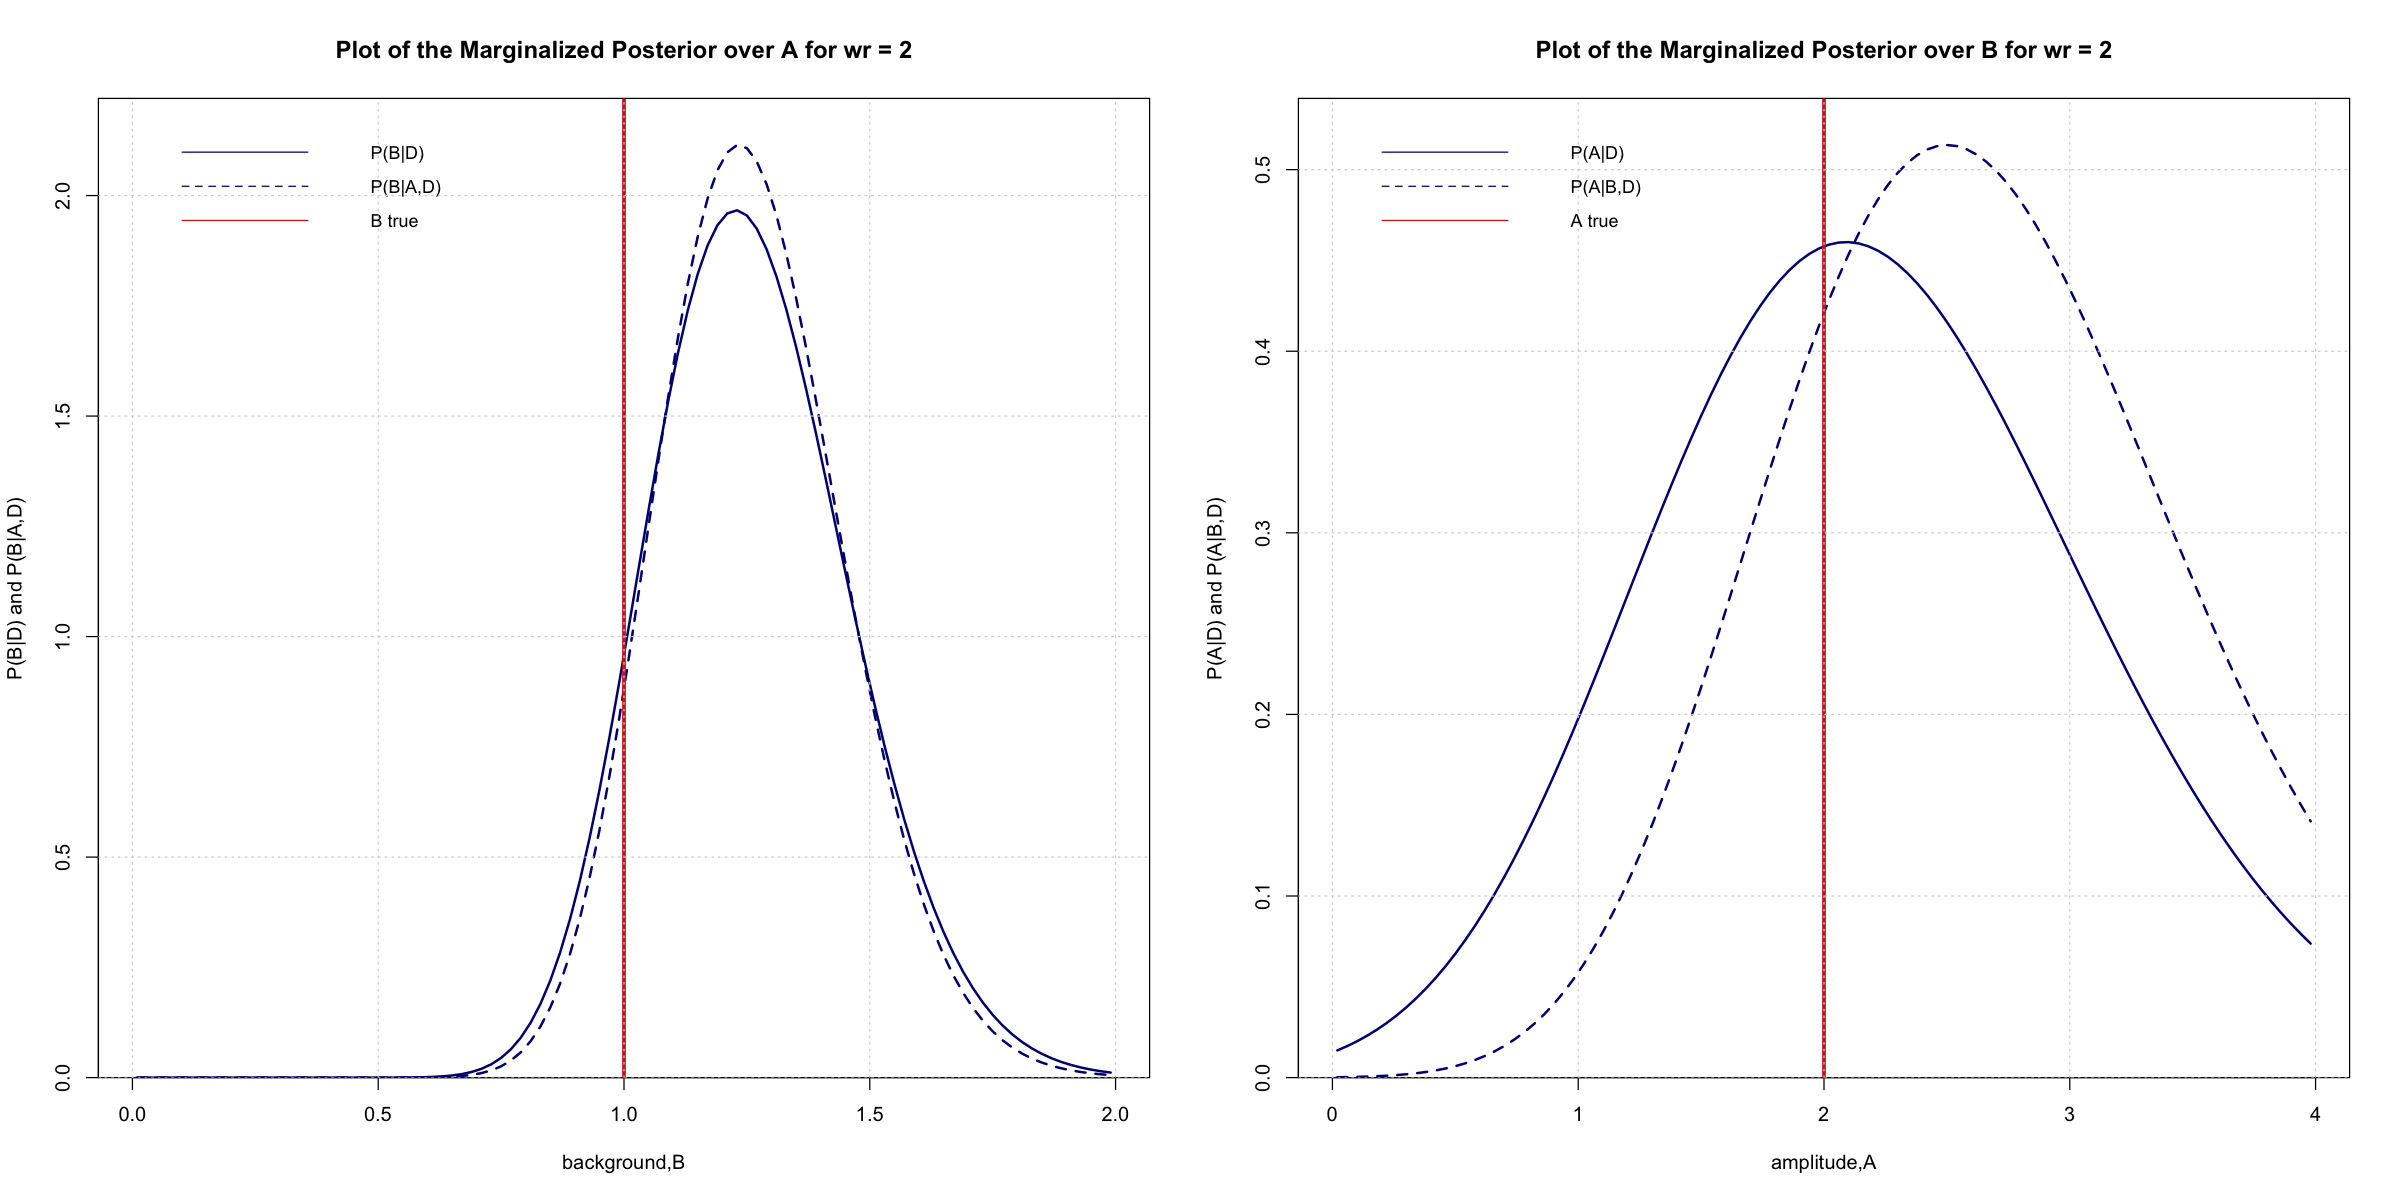

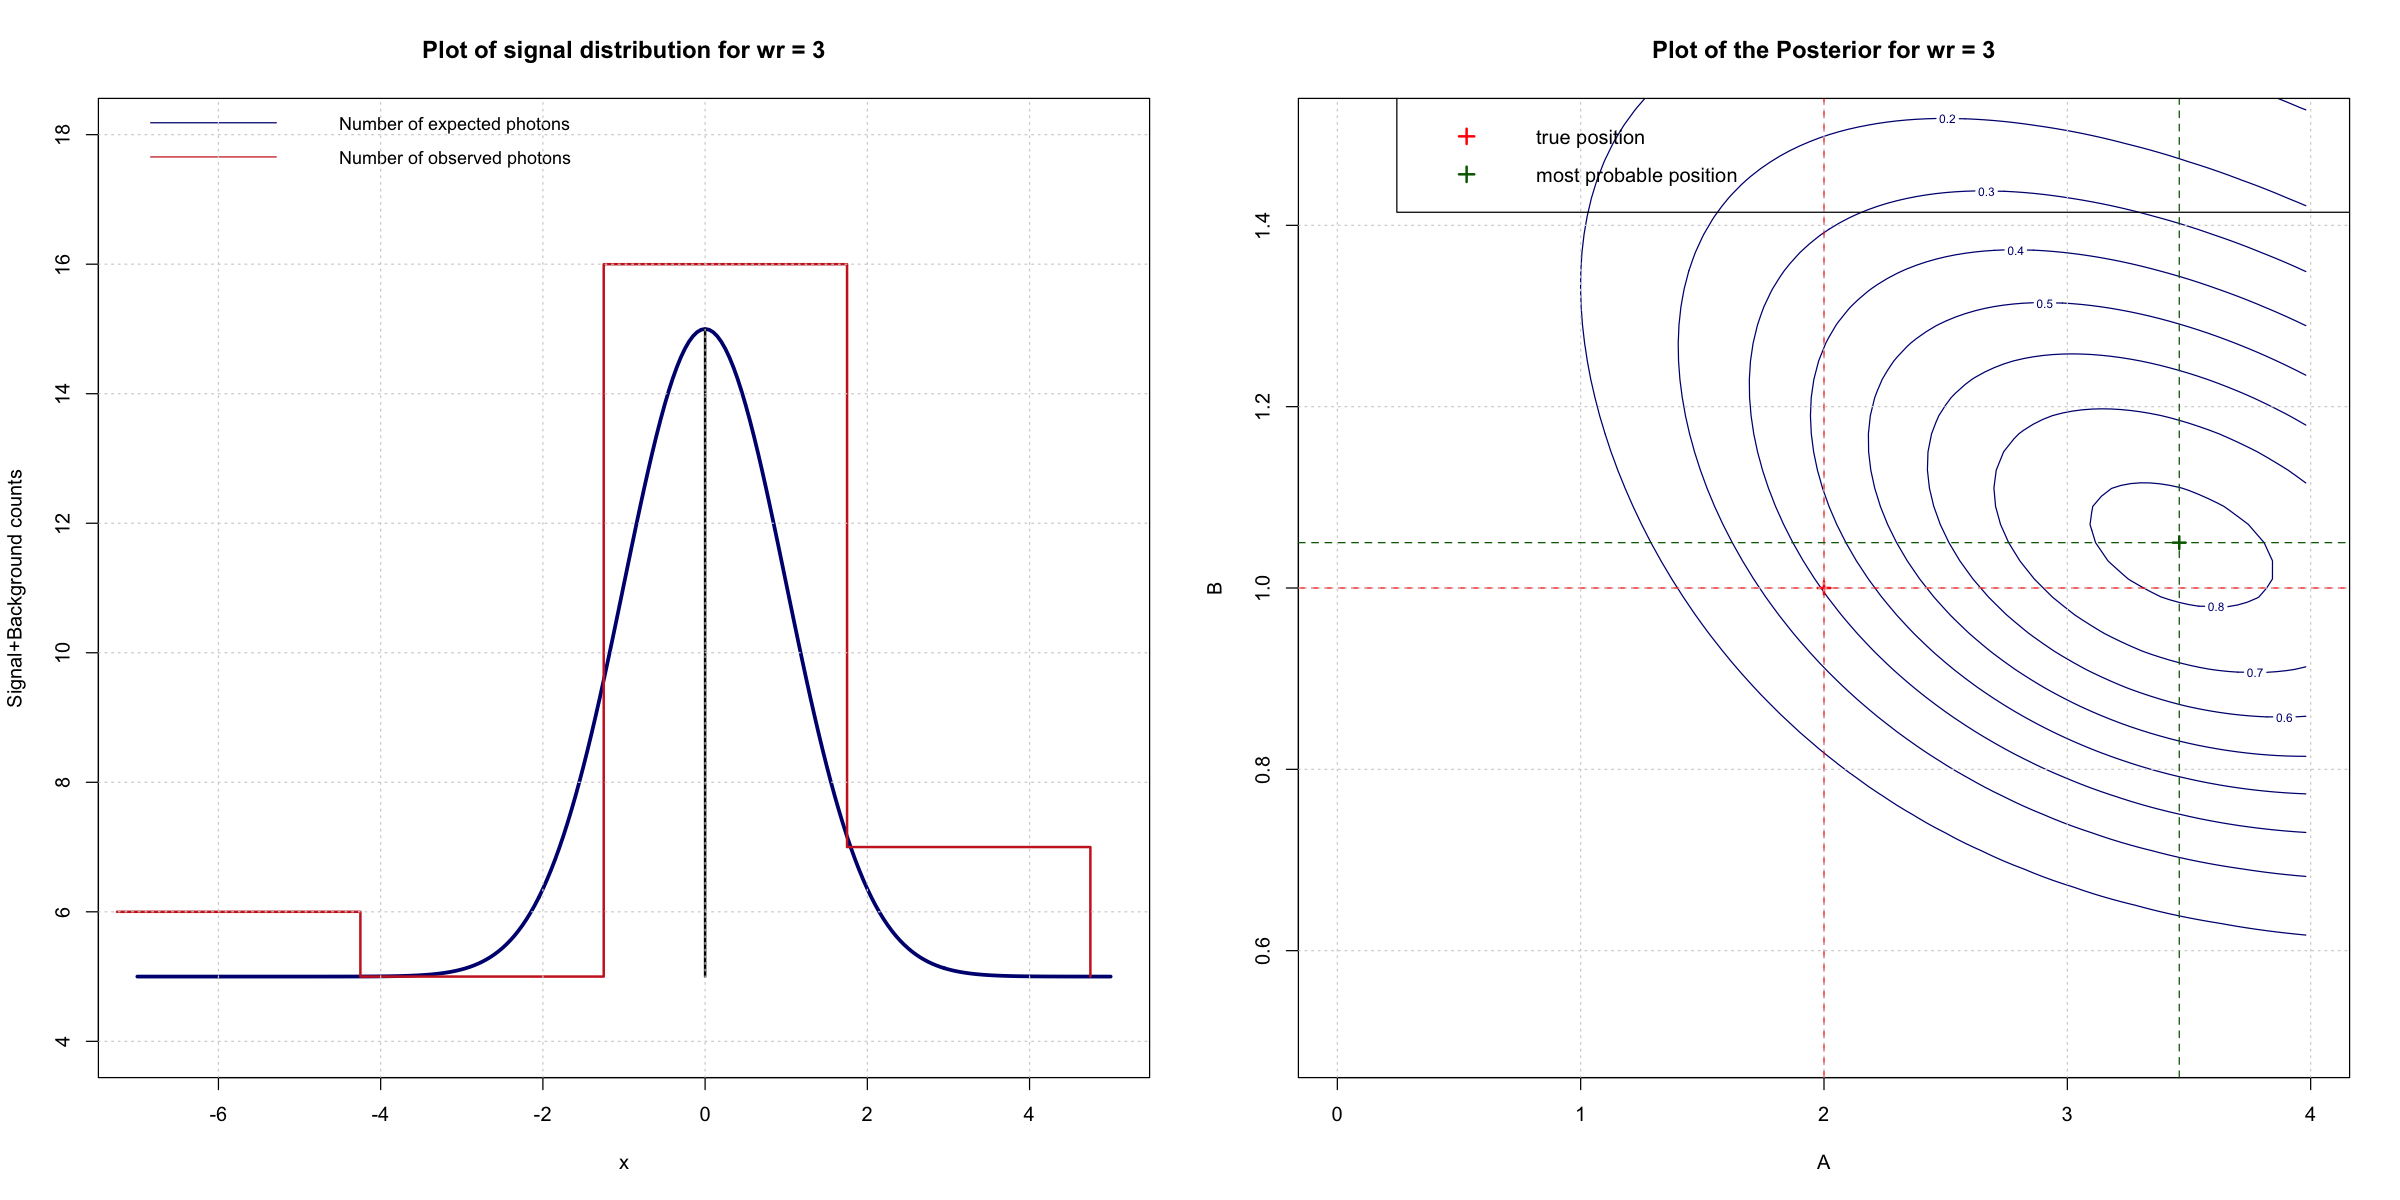

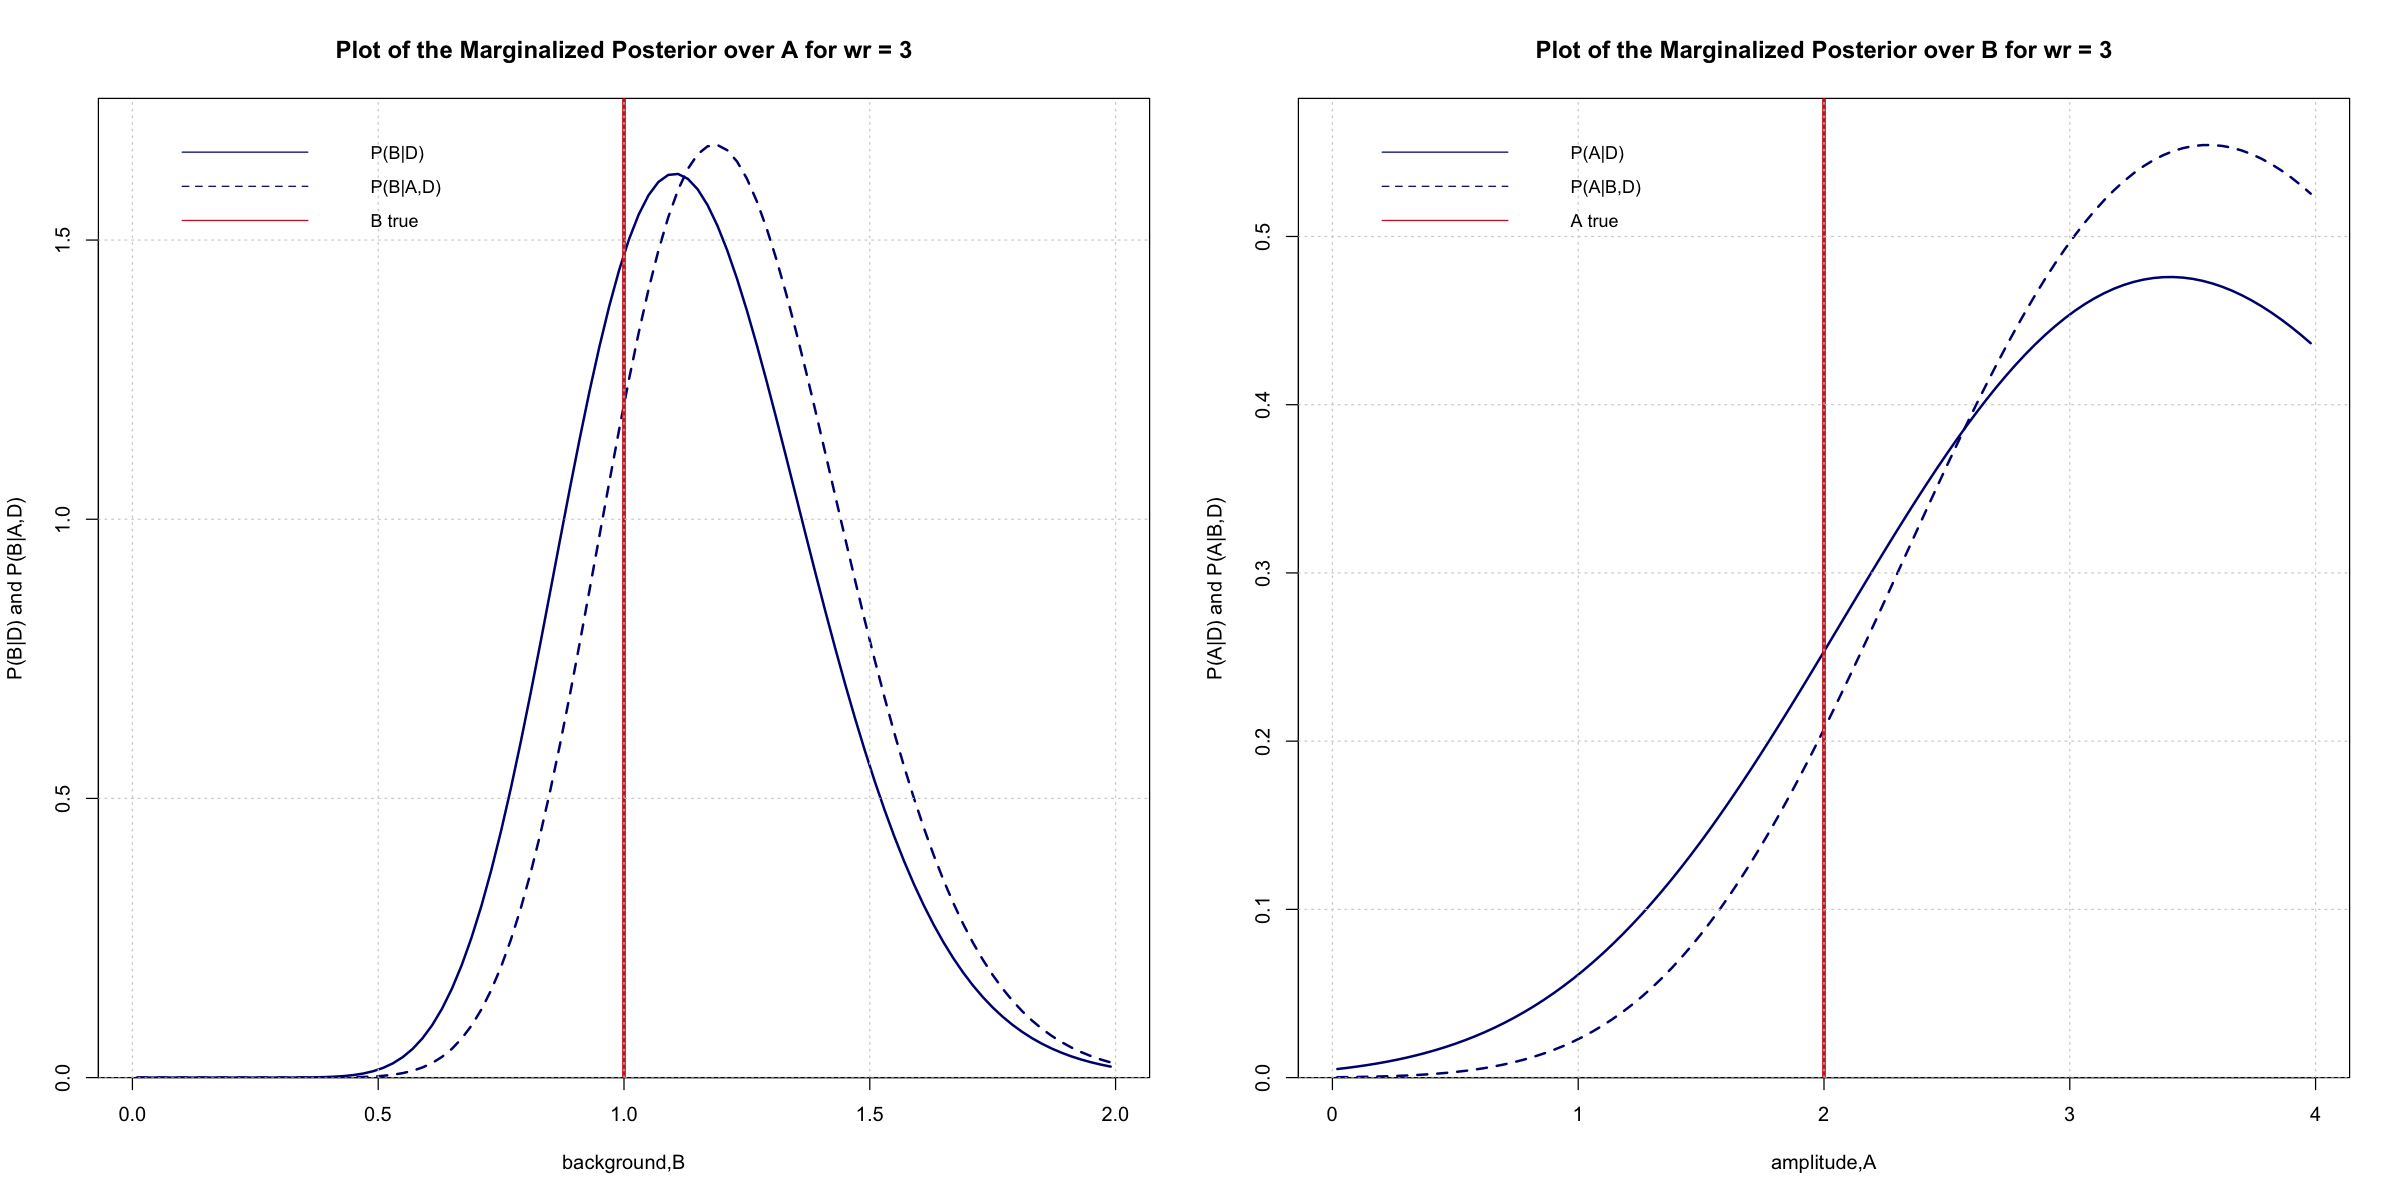

In [18]:
# Generative model 
signal <- Vectorize( function(x, A, B, x0, w, t) { 
            dt * (A*exp(-(x-x0)^2/(2*w^2)) + B)
          } )


# Log posterior
log.post <- function(data, x, A, B, x0, w, dt) {
            if(A<0 || B <0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, A, B, x0, w, dt), log=TRUE))
            }

# Vary the resolution of w, by varying wr
wr.set <- c(0.1,0.25,1,2,3)

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Define list for most probable value obtained
A.list <- c(NULL)
B.list <- c(NULL)


for(wr in wr.set){

    # Define the model parameters
    A.true <- 2 # Signal amplitude (unkown)
    B.true <- 1 # Background amplitude (unkown)
    dt <- 5     # Exposure time 
    x0 <- 0     # Signal peak
    w <- 1      # Signal width
    
    
    # Generate the number of observed photons
    set.seed(208)
    xdat <- seq(from=-7*w, to=7*w, by=wr*w) # Choose the resolution 
    s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
    ddat <- rpois(length(s.true), s.true)
    
    
    # Plot the number of expected photons (not integer)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, dt) 
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
         type='l',lty=1, lwd=3, col='navy', ylim=c(min(ddat)-1,max(ddat)+2),
         main=paste("Plot of signal distribution for wr =",wr))
    # Plot the number of observed photons (integer) 
    xdat.off <- xdat - 0.25 # Remove offset of the bin width
    lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
    legend("topleft",inset=-0.01,c("Number of expected photons","Number of observed photons"), 
           col=c("navy","firebrick3"), lty=1, cex=0.9,box.lty=0)       
    # Plot amplitude
    xp <- c(0,0)
    yp <- c(min(splot),max(splot))
    polygon(x = xp, y = yp, col = 'red',lwd=2)
    grid()
    
    
    # Sampling grid for computing Posterior
    alim <- c(0.0, 4.0)
    blim <- c(0, 2)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    A <- alim[1] + diff(alim)*uniGrid 
    B <- blim[1] + diff(blim)*uniGrid
    
    # Compute the Normalized Posterioro
    z <- matrix(data=NA, nrow=length(A), ncol=length(B)) 
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
    } }   
    # Normalize the Posterior
    z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
    # Plot Normalized 2D posterior as contours(a, b, exp(z))
    contour(A, B, z.norm, main=paste("Plot of the Posterior for wr =",wr),
            xlim=c(min(0,A.true),max(4,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="navy",
            nlevels=10)  
    
    # Plot of the true value of alpha and beta
    points(A.true, B.true, pch=3, col="red", lwd=2) 
    abline(h=B.true, lty=2,col='red')
    abline(v=A.true, lty=2,col='red')
    grid()
    
    # Plot the most probable values of the Posterior
    index <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- A[index[1]]
    max.B <- B[index[2]]
    points(max.A, max.B, pch=3, col="darkgreen", lwd=2) 
    abline(h=max.B, lty=2,col='darkgreen')
    abline(v=max.A, lty=2,col='darkgreen')  

    legend("topright",c("true position","most probable position"), 
           col=c("red","darkgreen"), pch=3, pt.cex=1.2, pt.lwd=2) 
    
    # Append most probable values to the list A.list, B.list
    A.list <- c(A.list,max.A)
    B.list <- c(B.list,max.B)
    
    
    
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D) 
    # by summing over other parameter. Normalize by gridding.
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D) 
    # using true values of conditioned parameters.  
    # Vectorize(func, par) makes a vectorized function out of func in the parameter par.
    
    p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    # Plot the 1D marginalized posteriors
    # P(B|D) and P(B|A,D)
    plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='navy',
         ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
         type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over A for wr =",wr))
    lines(B, p_b_aD, lwd=2, lty=2, col='navy') 
    abline(v=B.true, col="firebrick3",lty=1,lwd=3)
    legend("topleft",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), 
           col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=0)
    grid()
    
    # P(A|D) and P(A|B,D)
    plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='navy',
         ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
         type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over B for wr =",wr))
    lines(A, p_a_bD, lwd=2, lty=2,col='navy') 
    abline(v=A.true, col="firebrick3",lty=1,lwd=3)
    grid()
    legend("topleft",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), 
           col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=0)
}

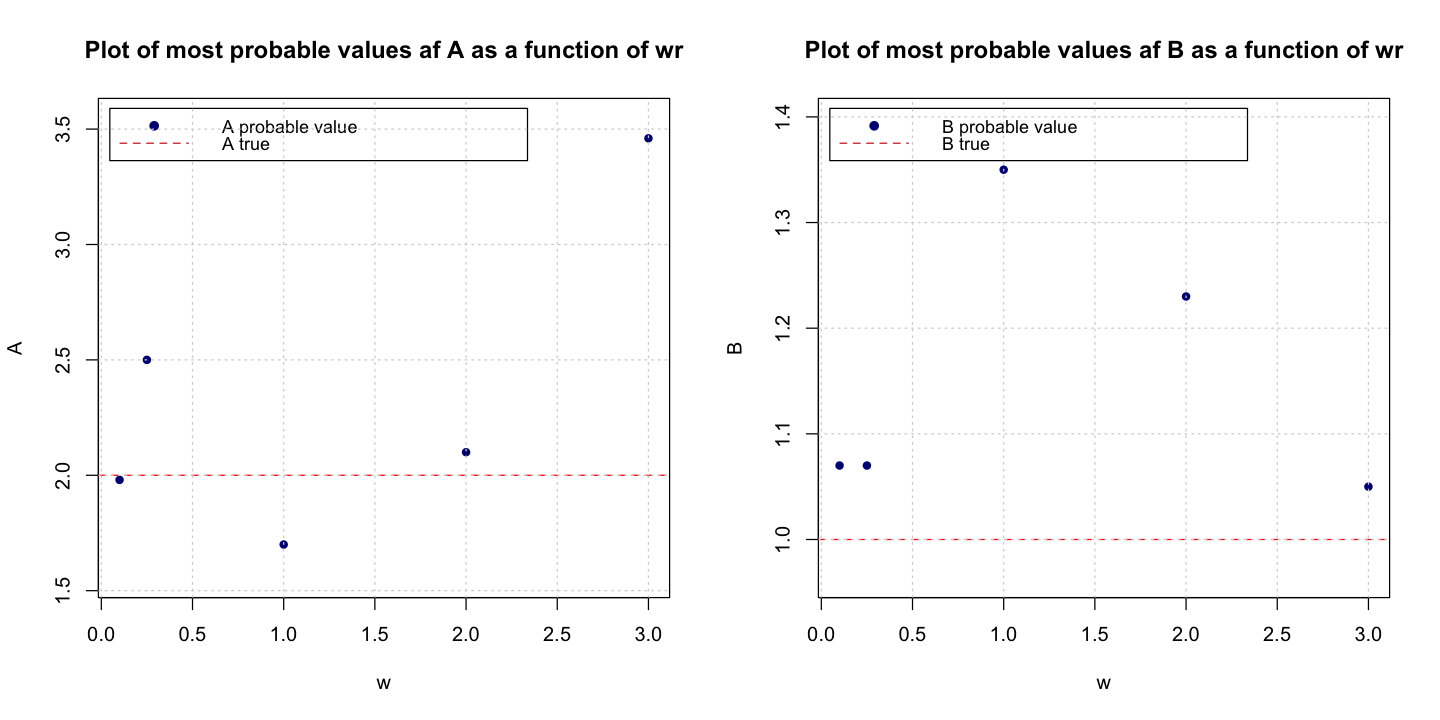

In [19]:
# Compare the most probable values of A and B for different w

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(wr.set, A.list, xlab="w", yaxs="i", pch=20, col='navy',
         ylim=1.05*c(min(A.list,A.true)-0.3,max(A.list,A.true)), ylab="A", 
         type="p", lwd=2, main="Plot of most probable values af A as a function of wr")
abline(h=A.true, lty=2,col='red')
legend("topleft",inset=0.02,c("A probable value","A true"), 
           col=c("navy","firebrick3"), pch=c(20,NA), lty=c(NA,2),pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=1)
grid()

plot(wr.set, B.list, xlab="w", yaxs="i", pch=20, col='navy',
         ylim=1.05*c(min(B.list,B.true)-0.1,max(B.list,B.true)), ylab="B", 
         type="p", lwd=2, main="Plot of most probable values af B as a function of wr") 
abline(h=B.true, lty=2,col='red')
legend("topleft",inset=0.02,c("B probable value","B true"), 
           col=c("navy","firebrick3"), pch=c(20,NA), lty=c(NA,2),pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=1)
grid()


### B)  change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
* Check the effect on the results.

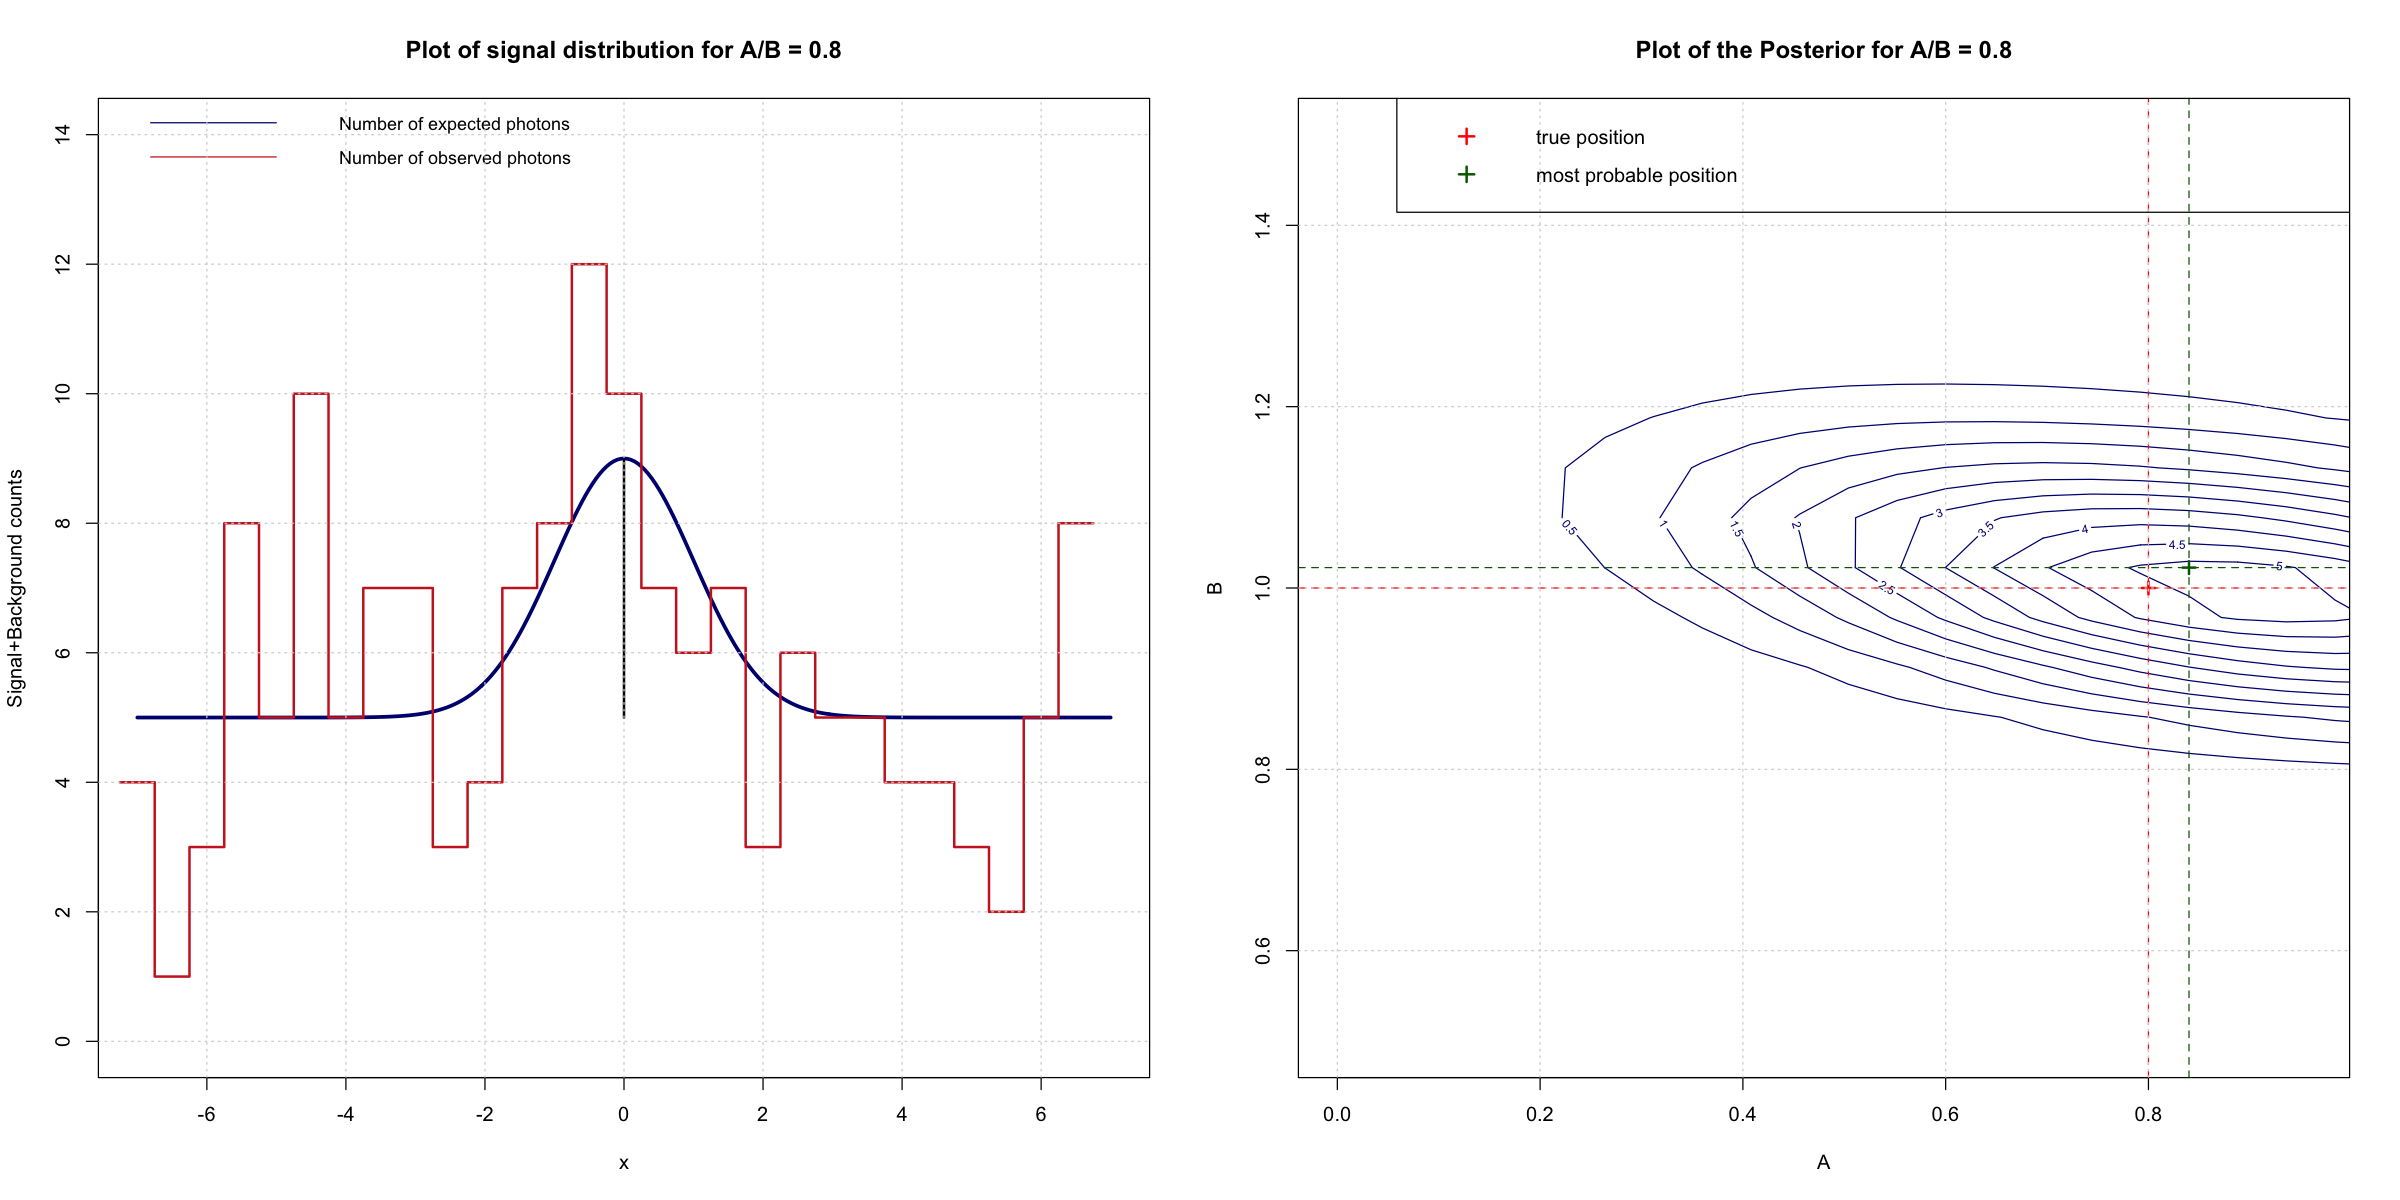

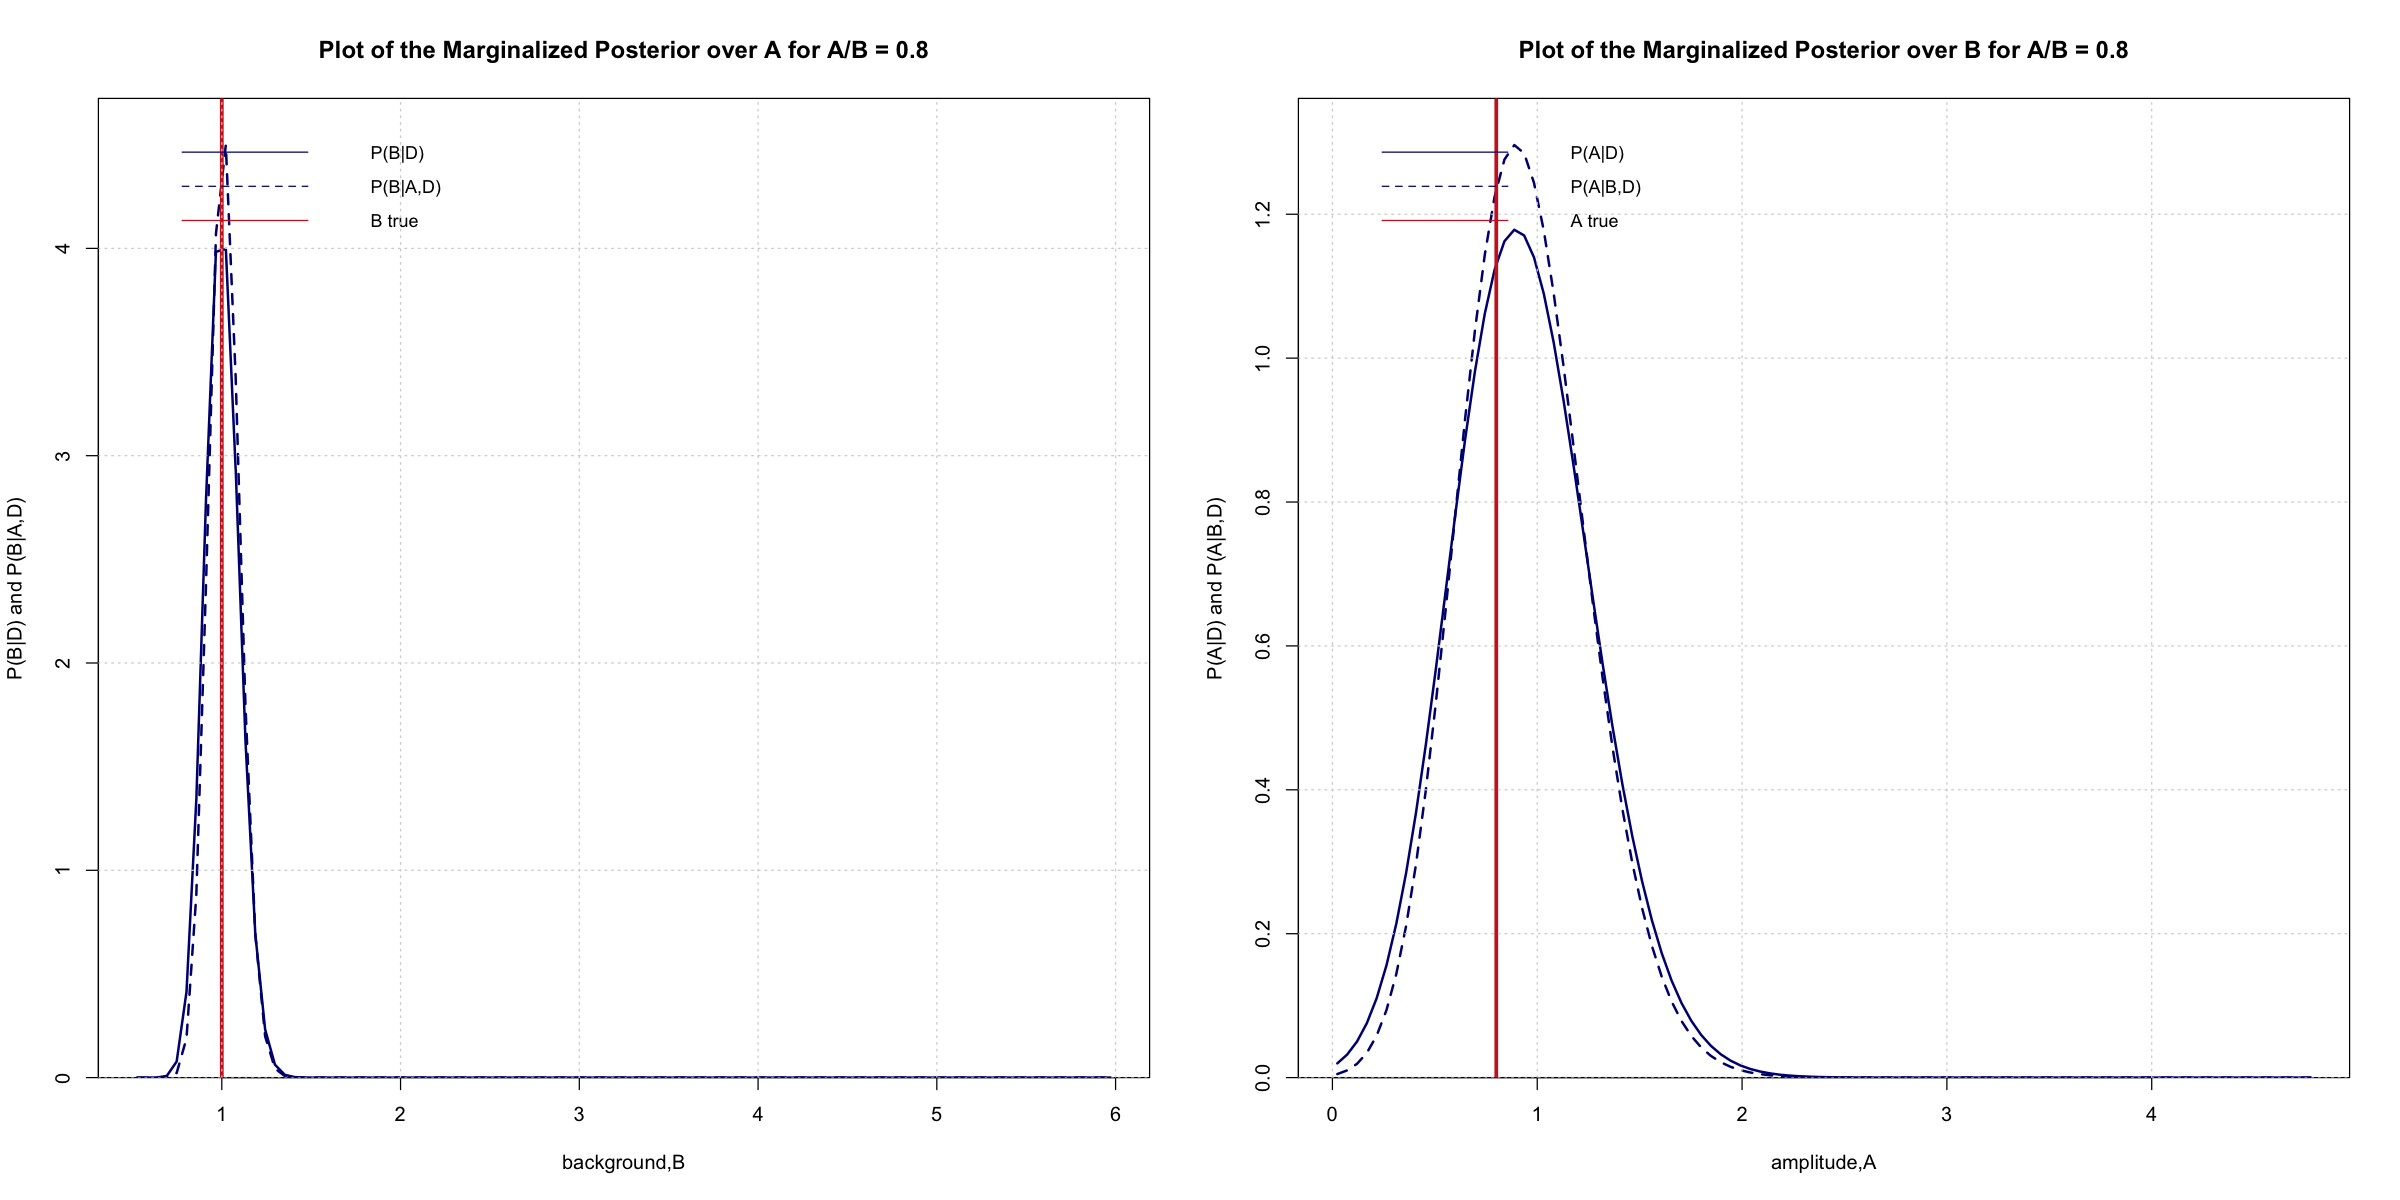

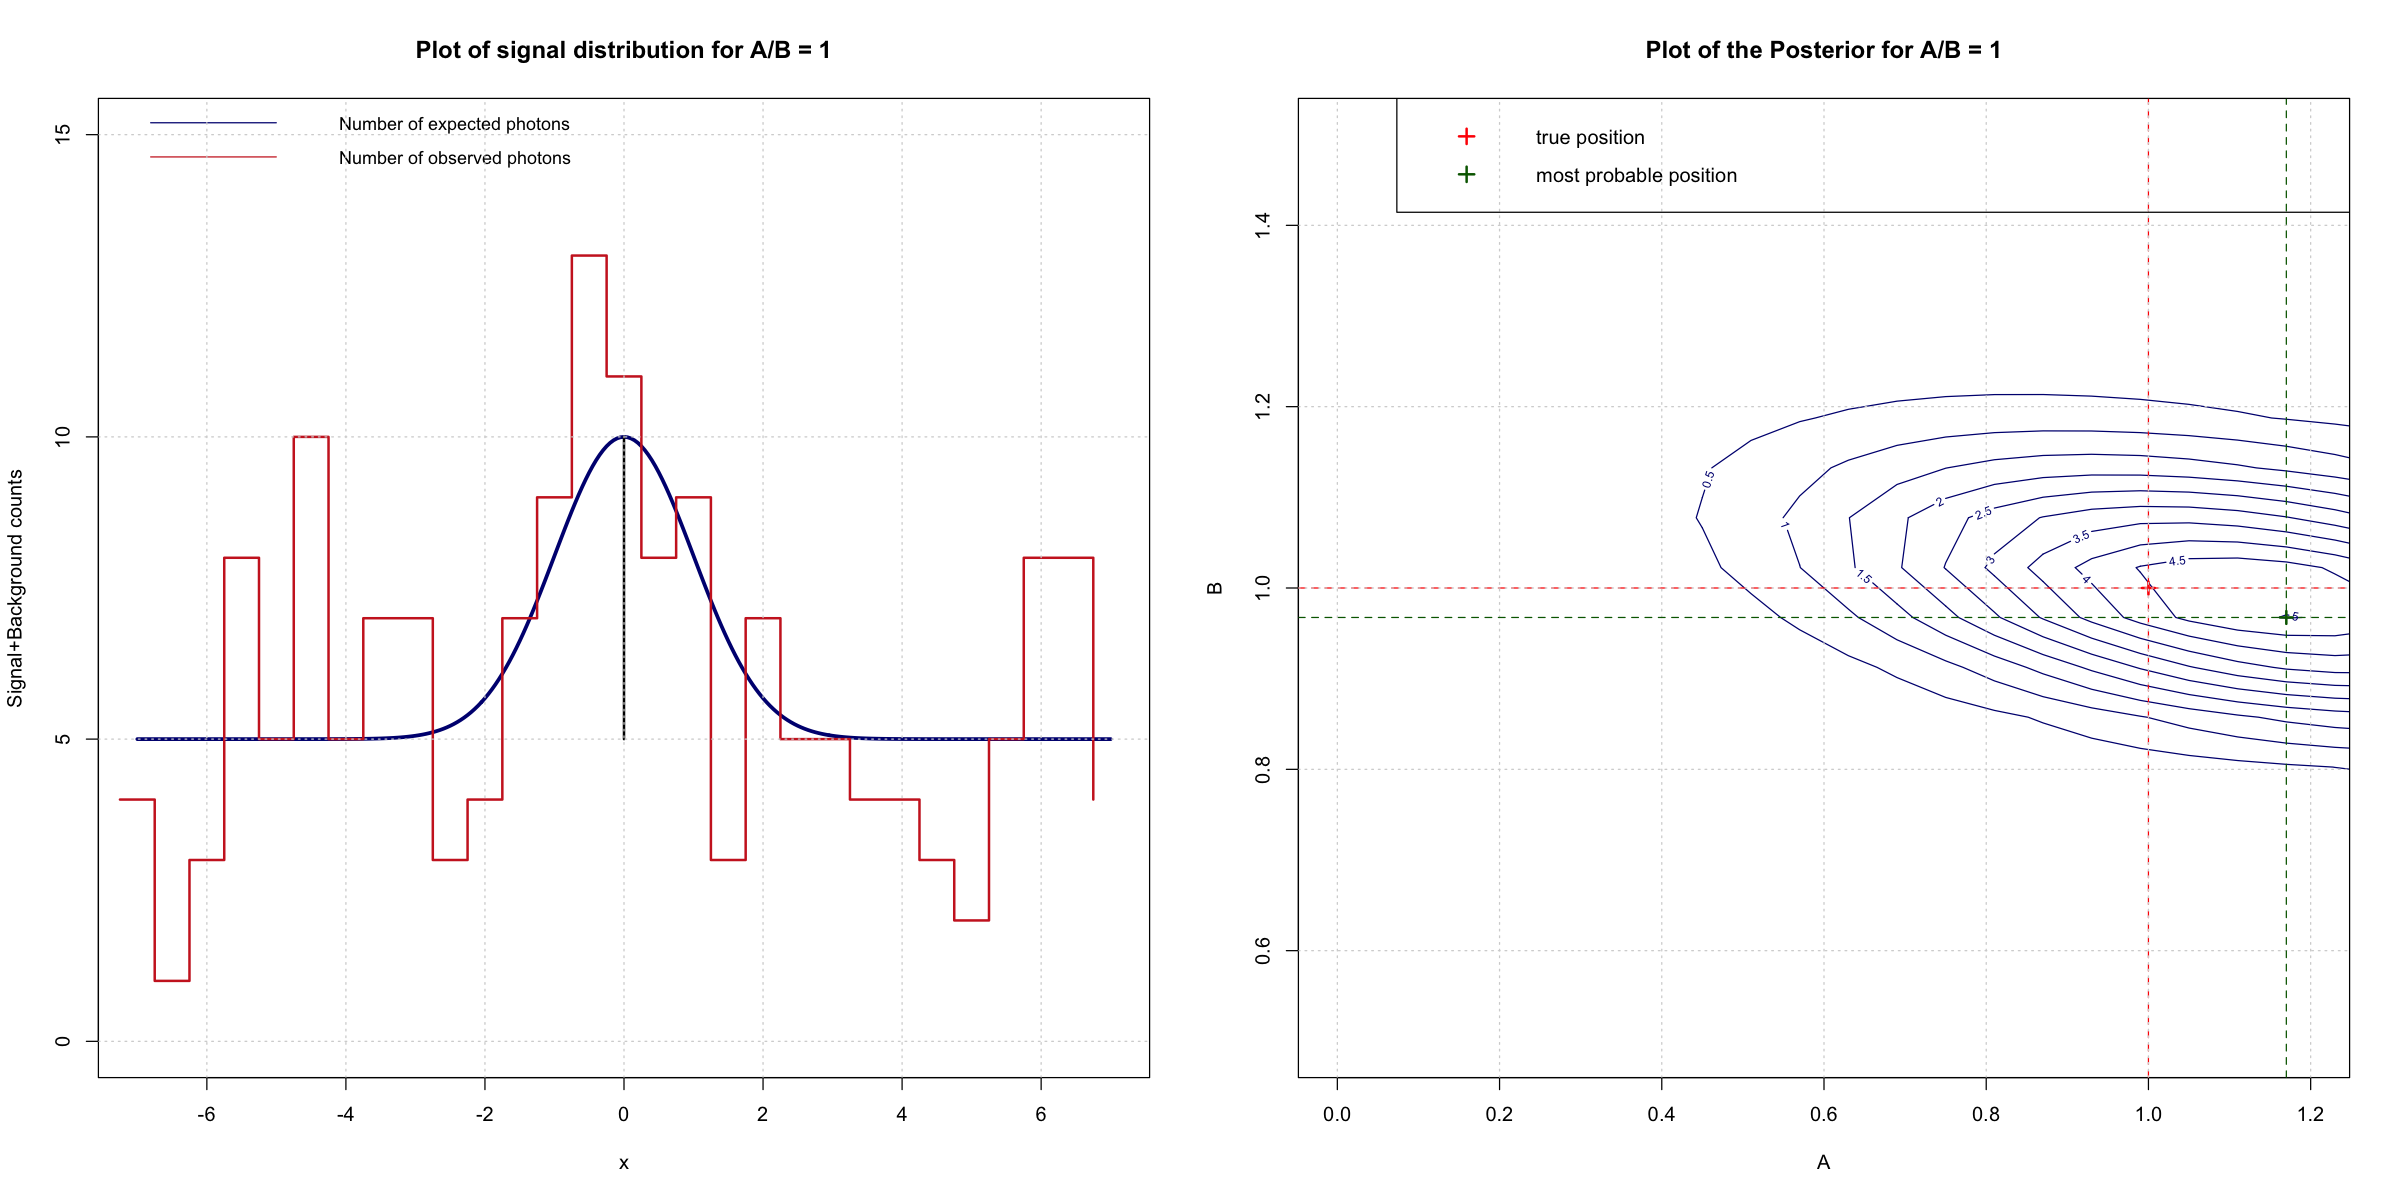

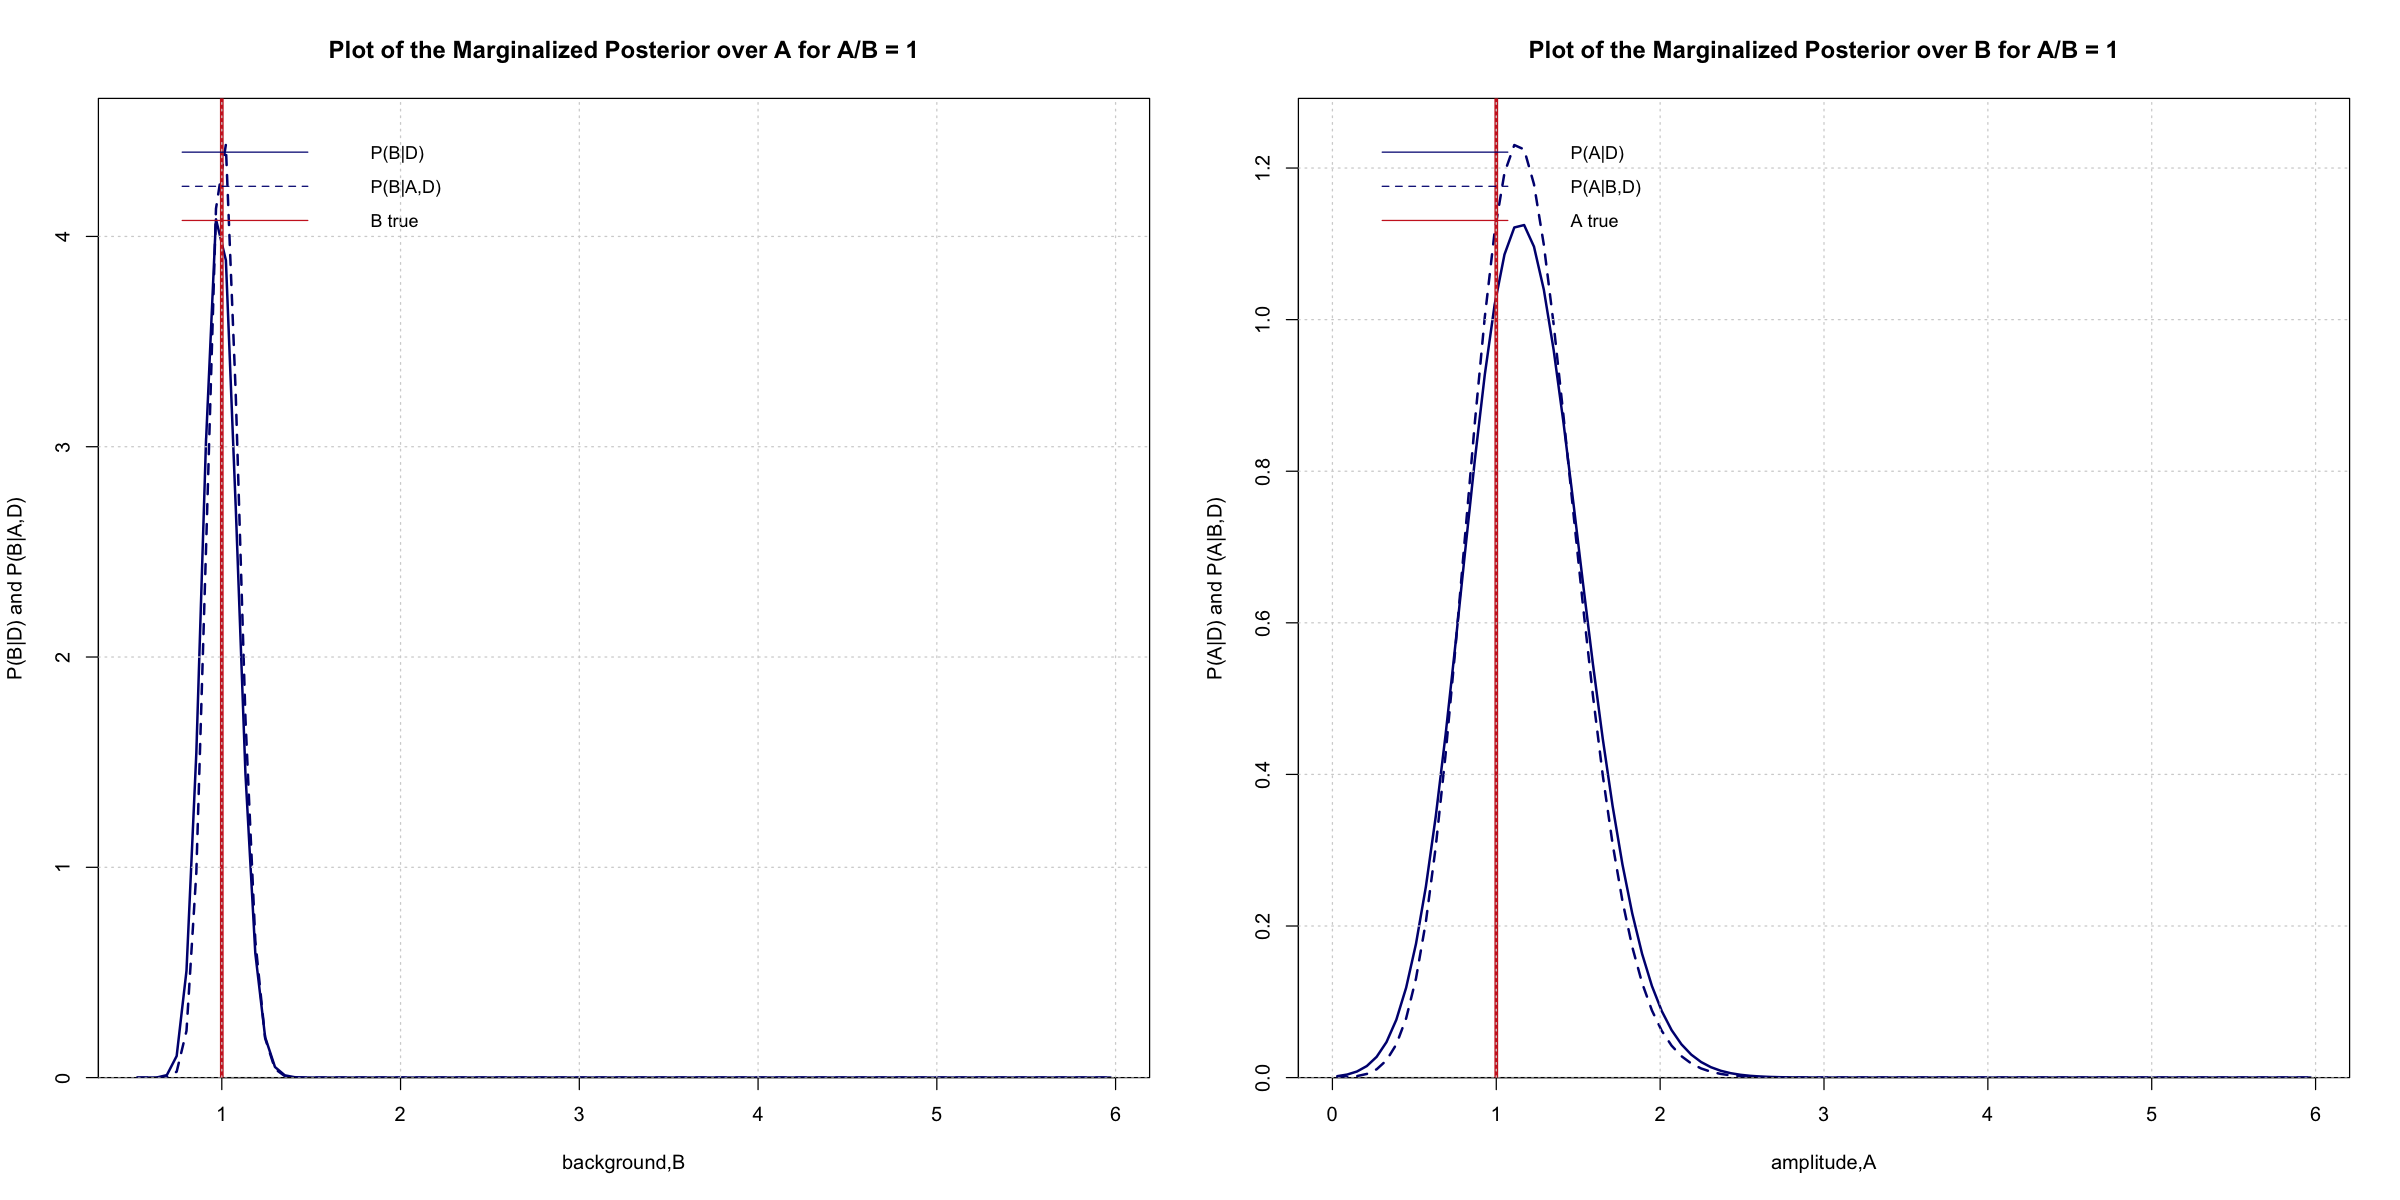

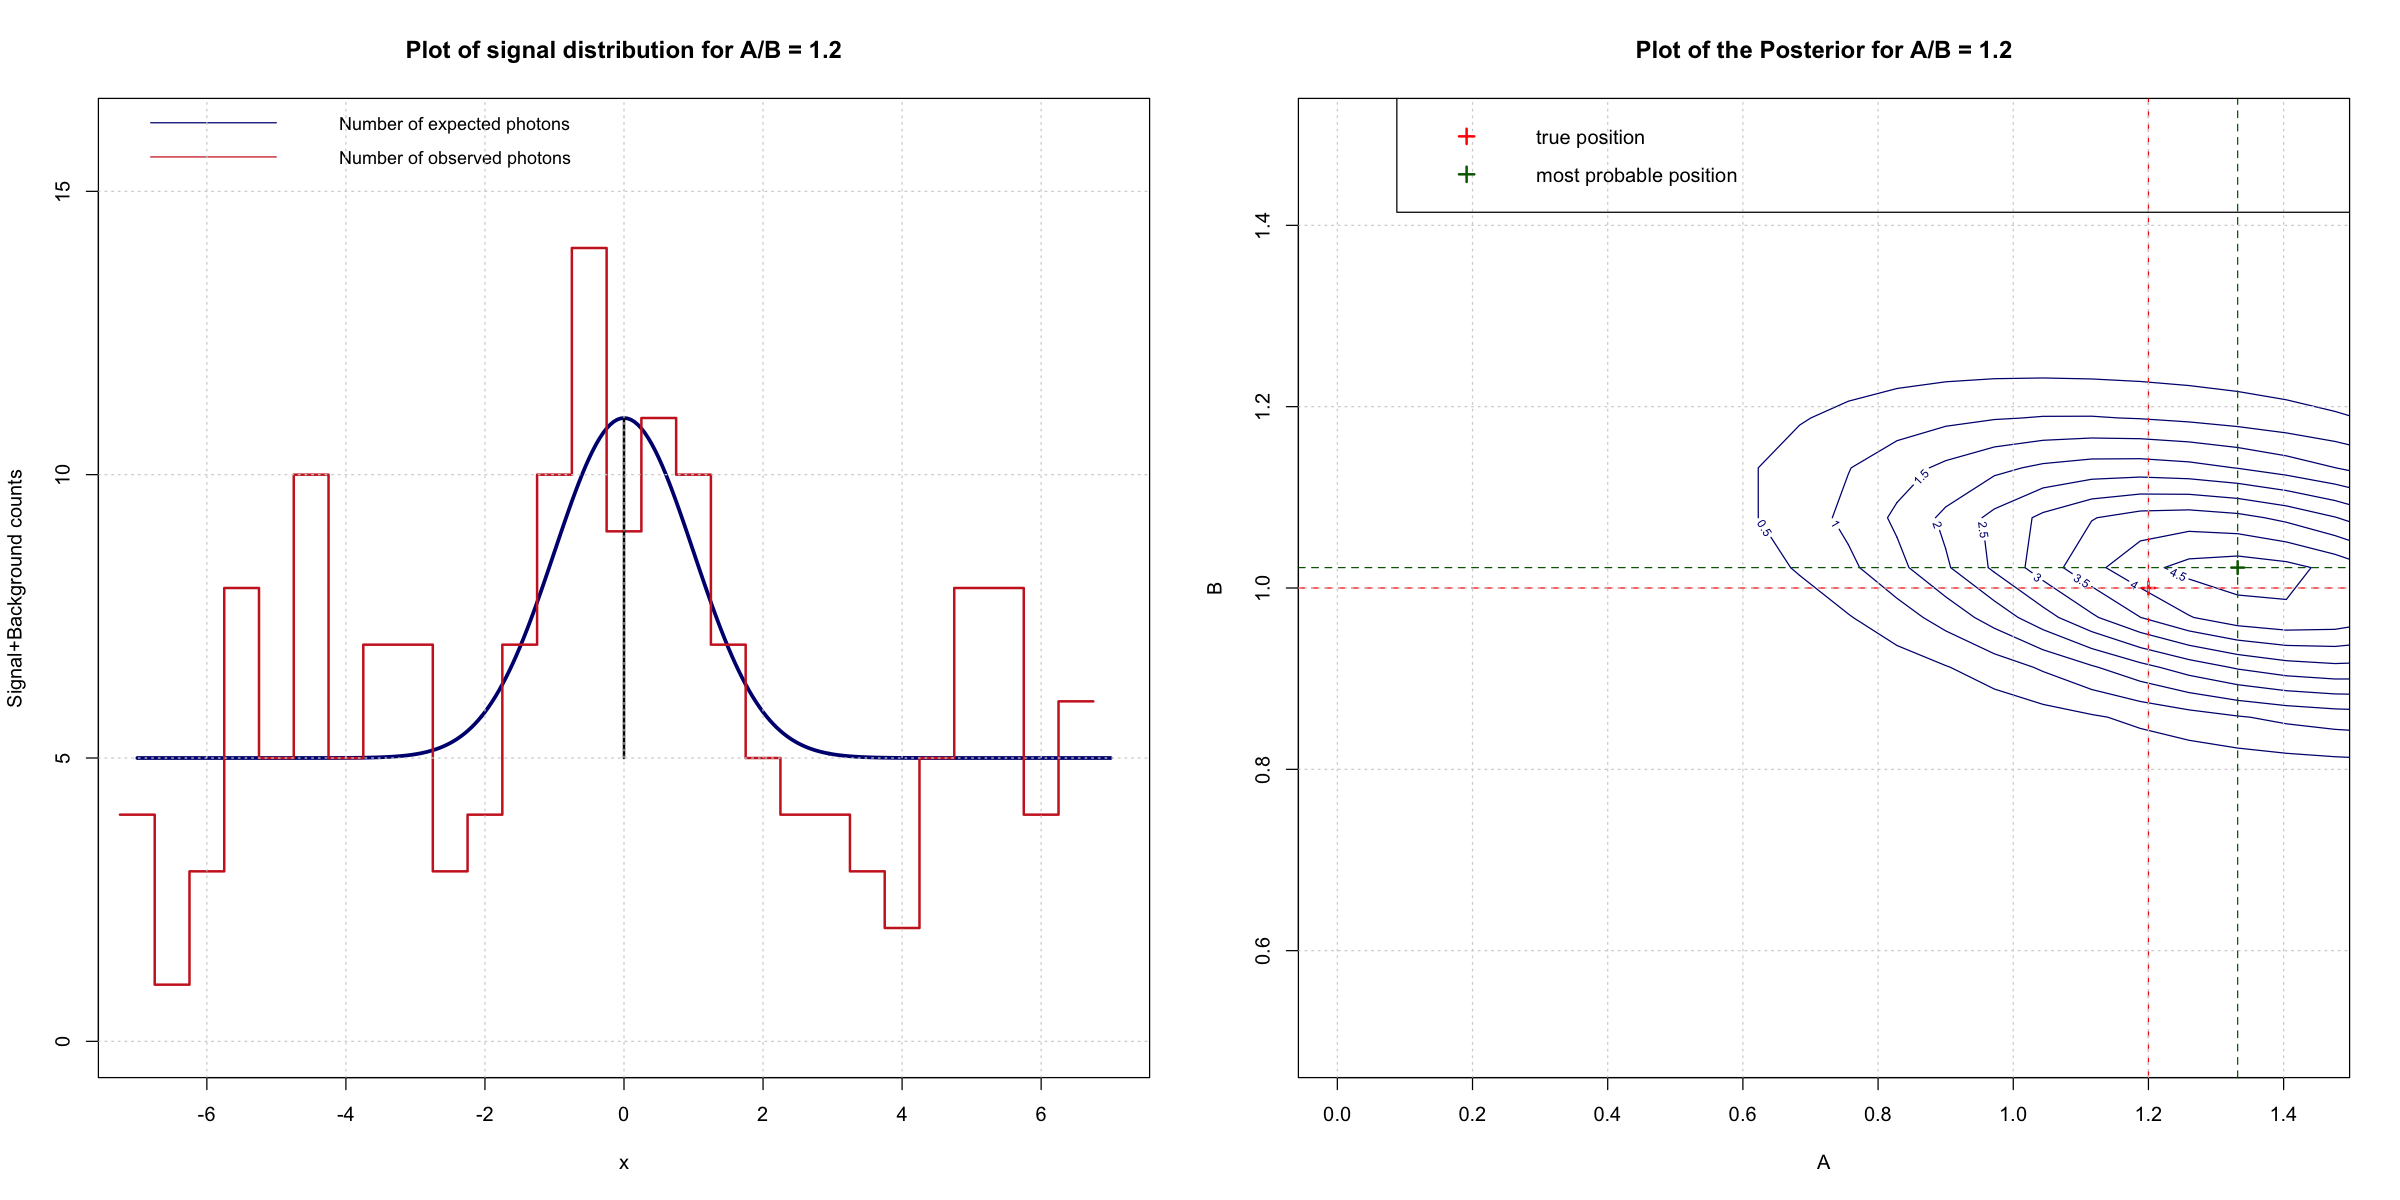

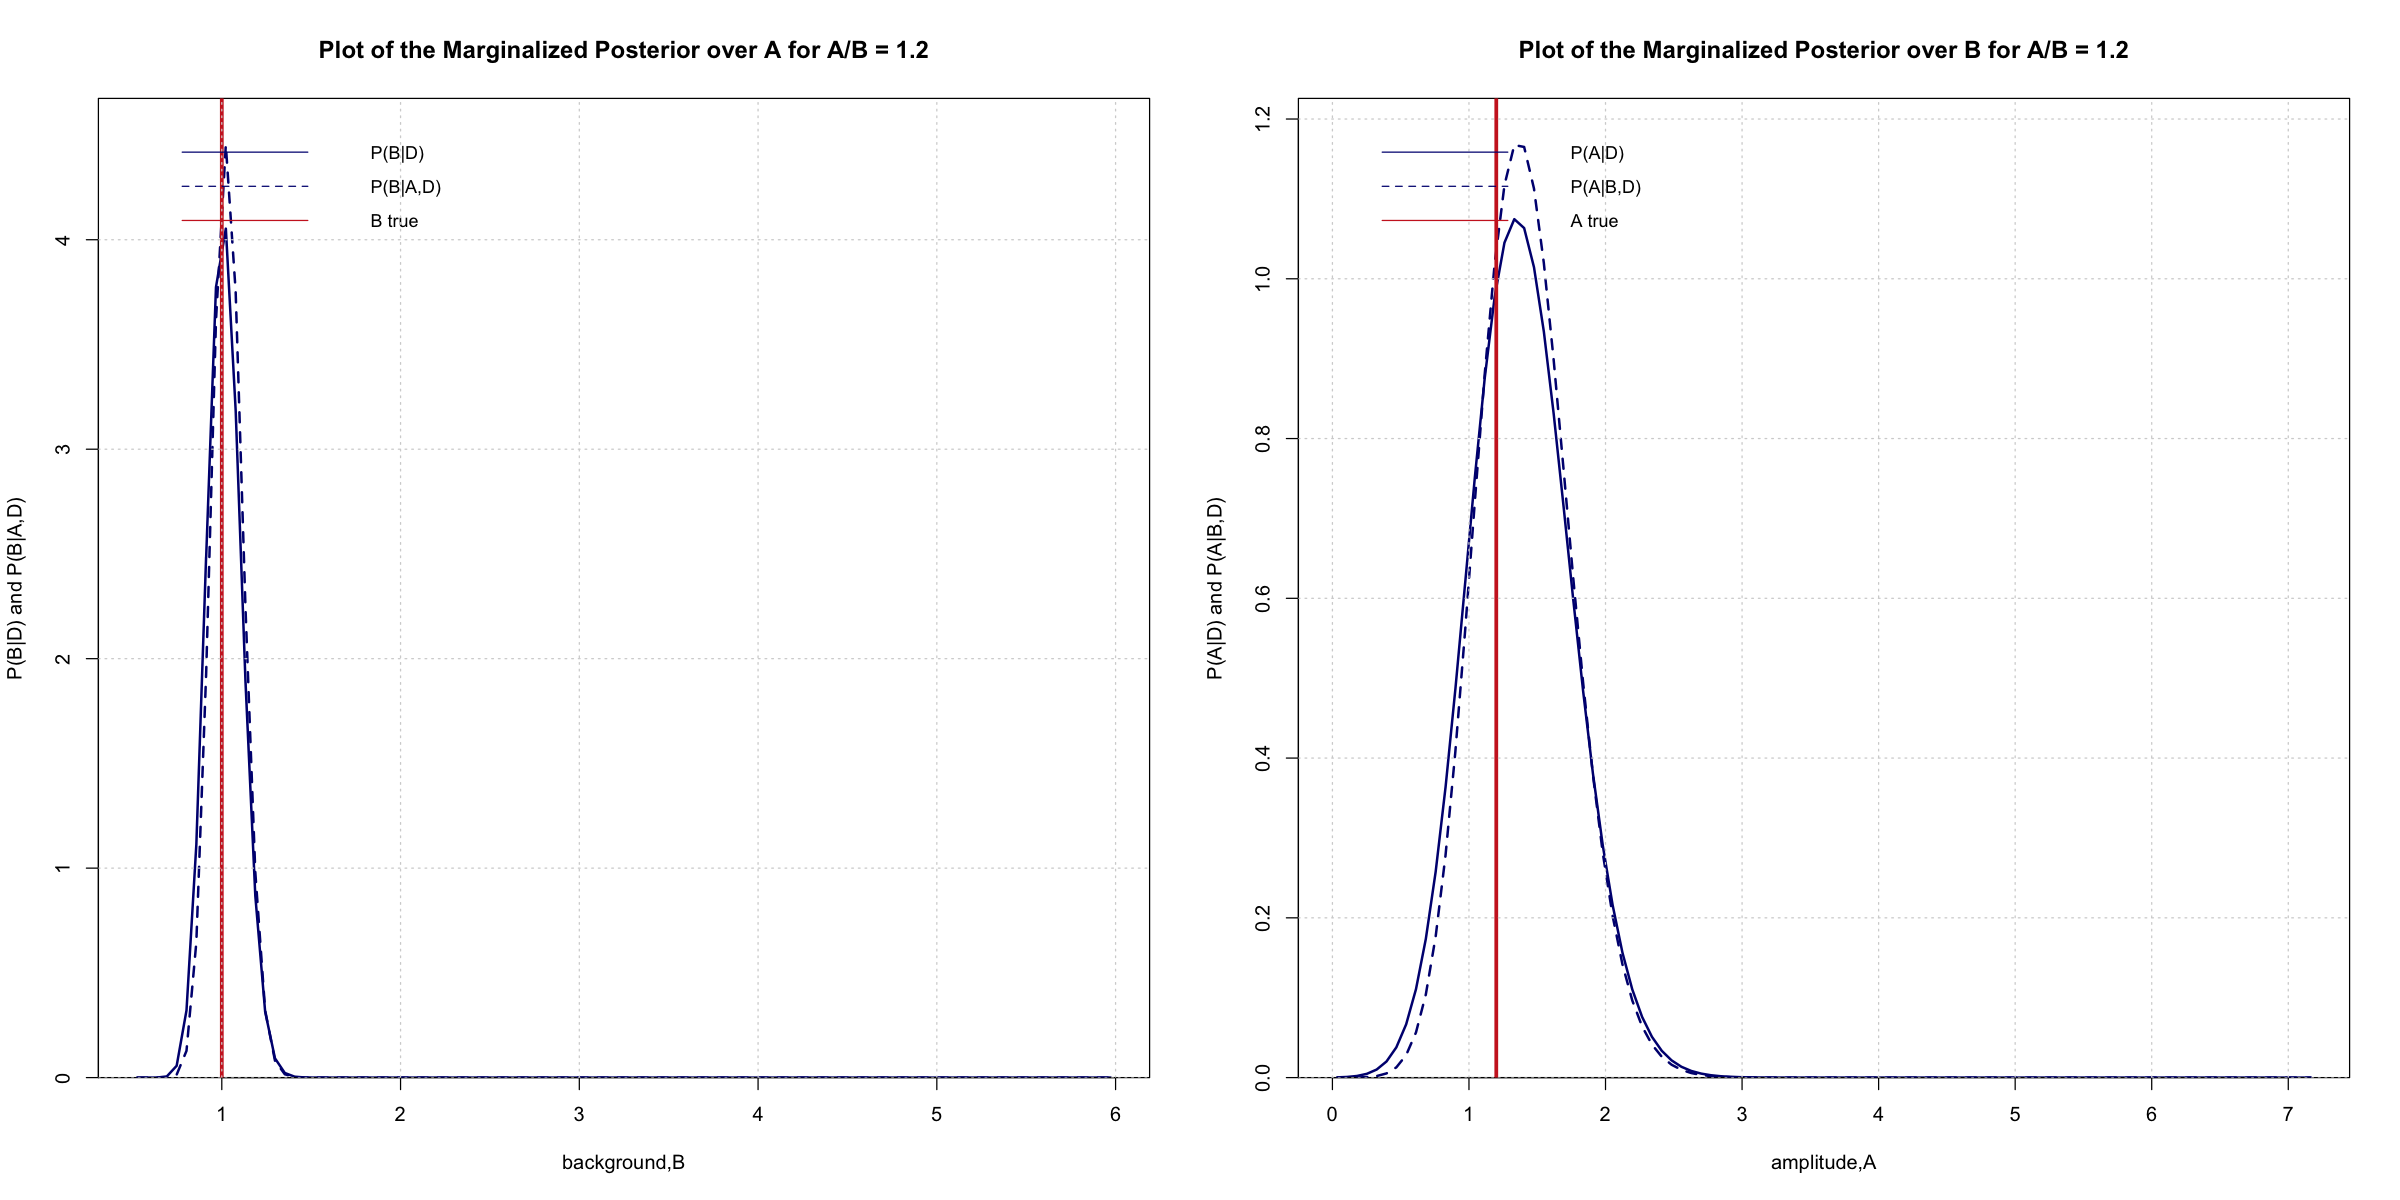

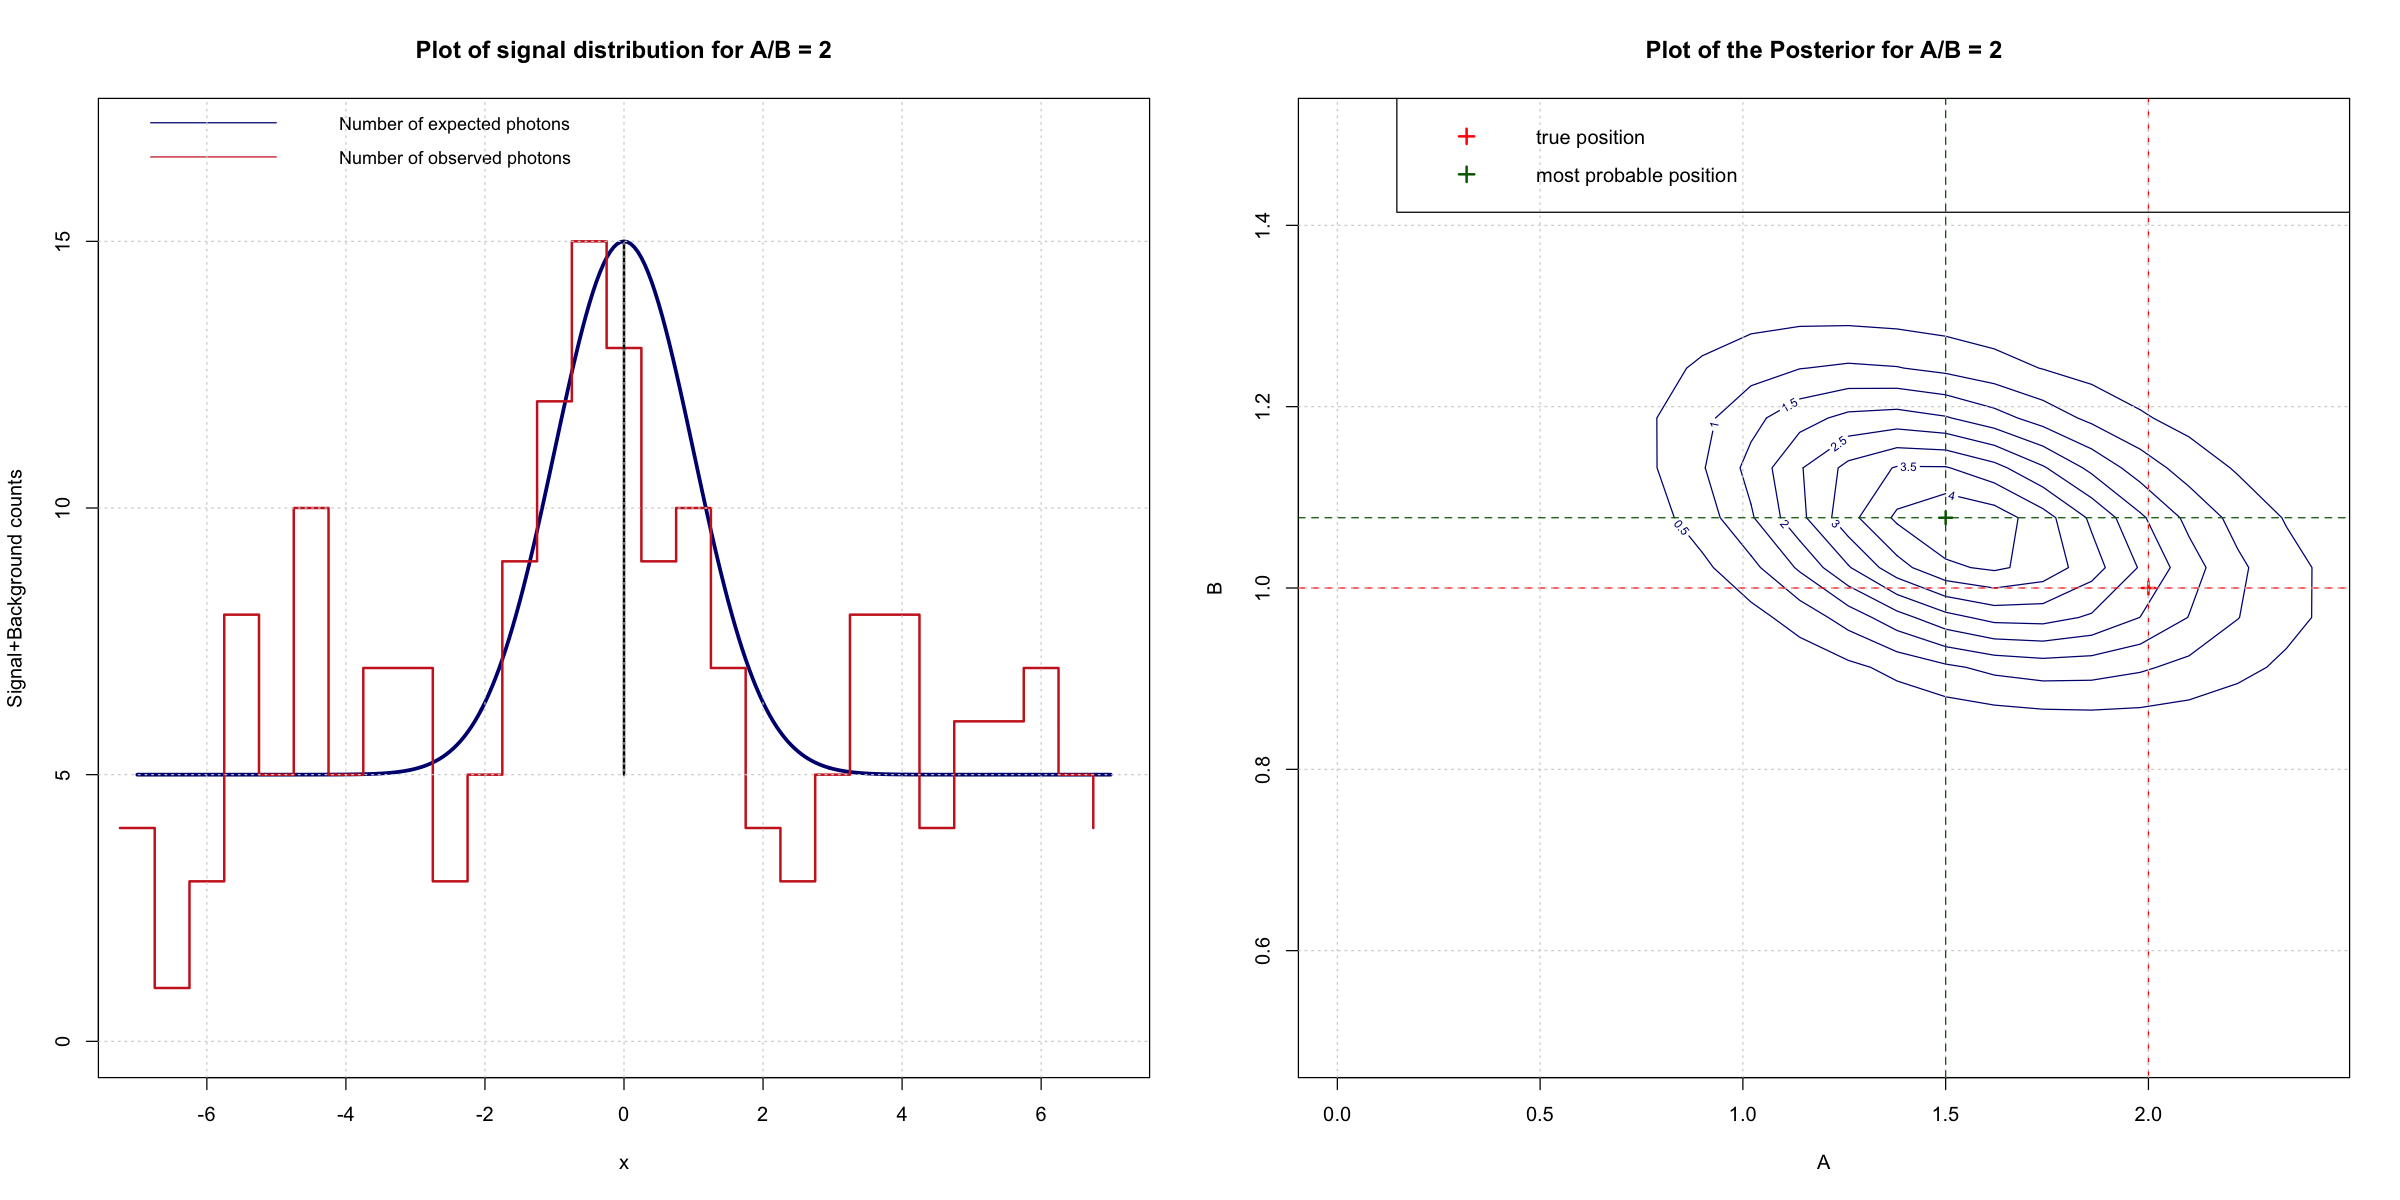

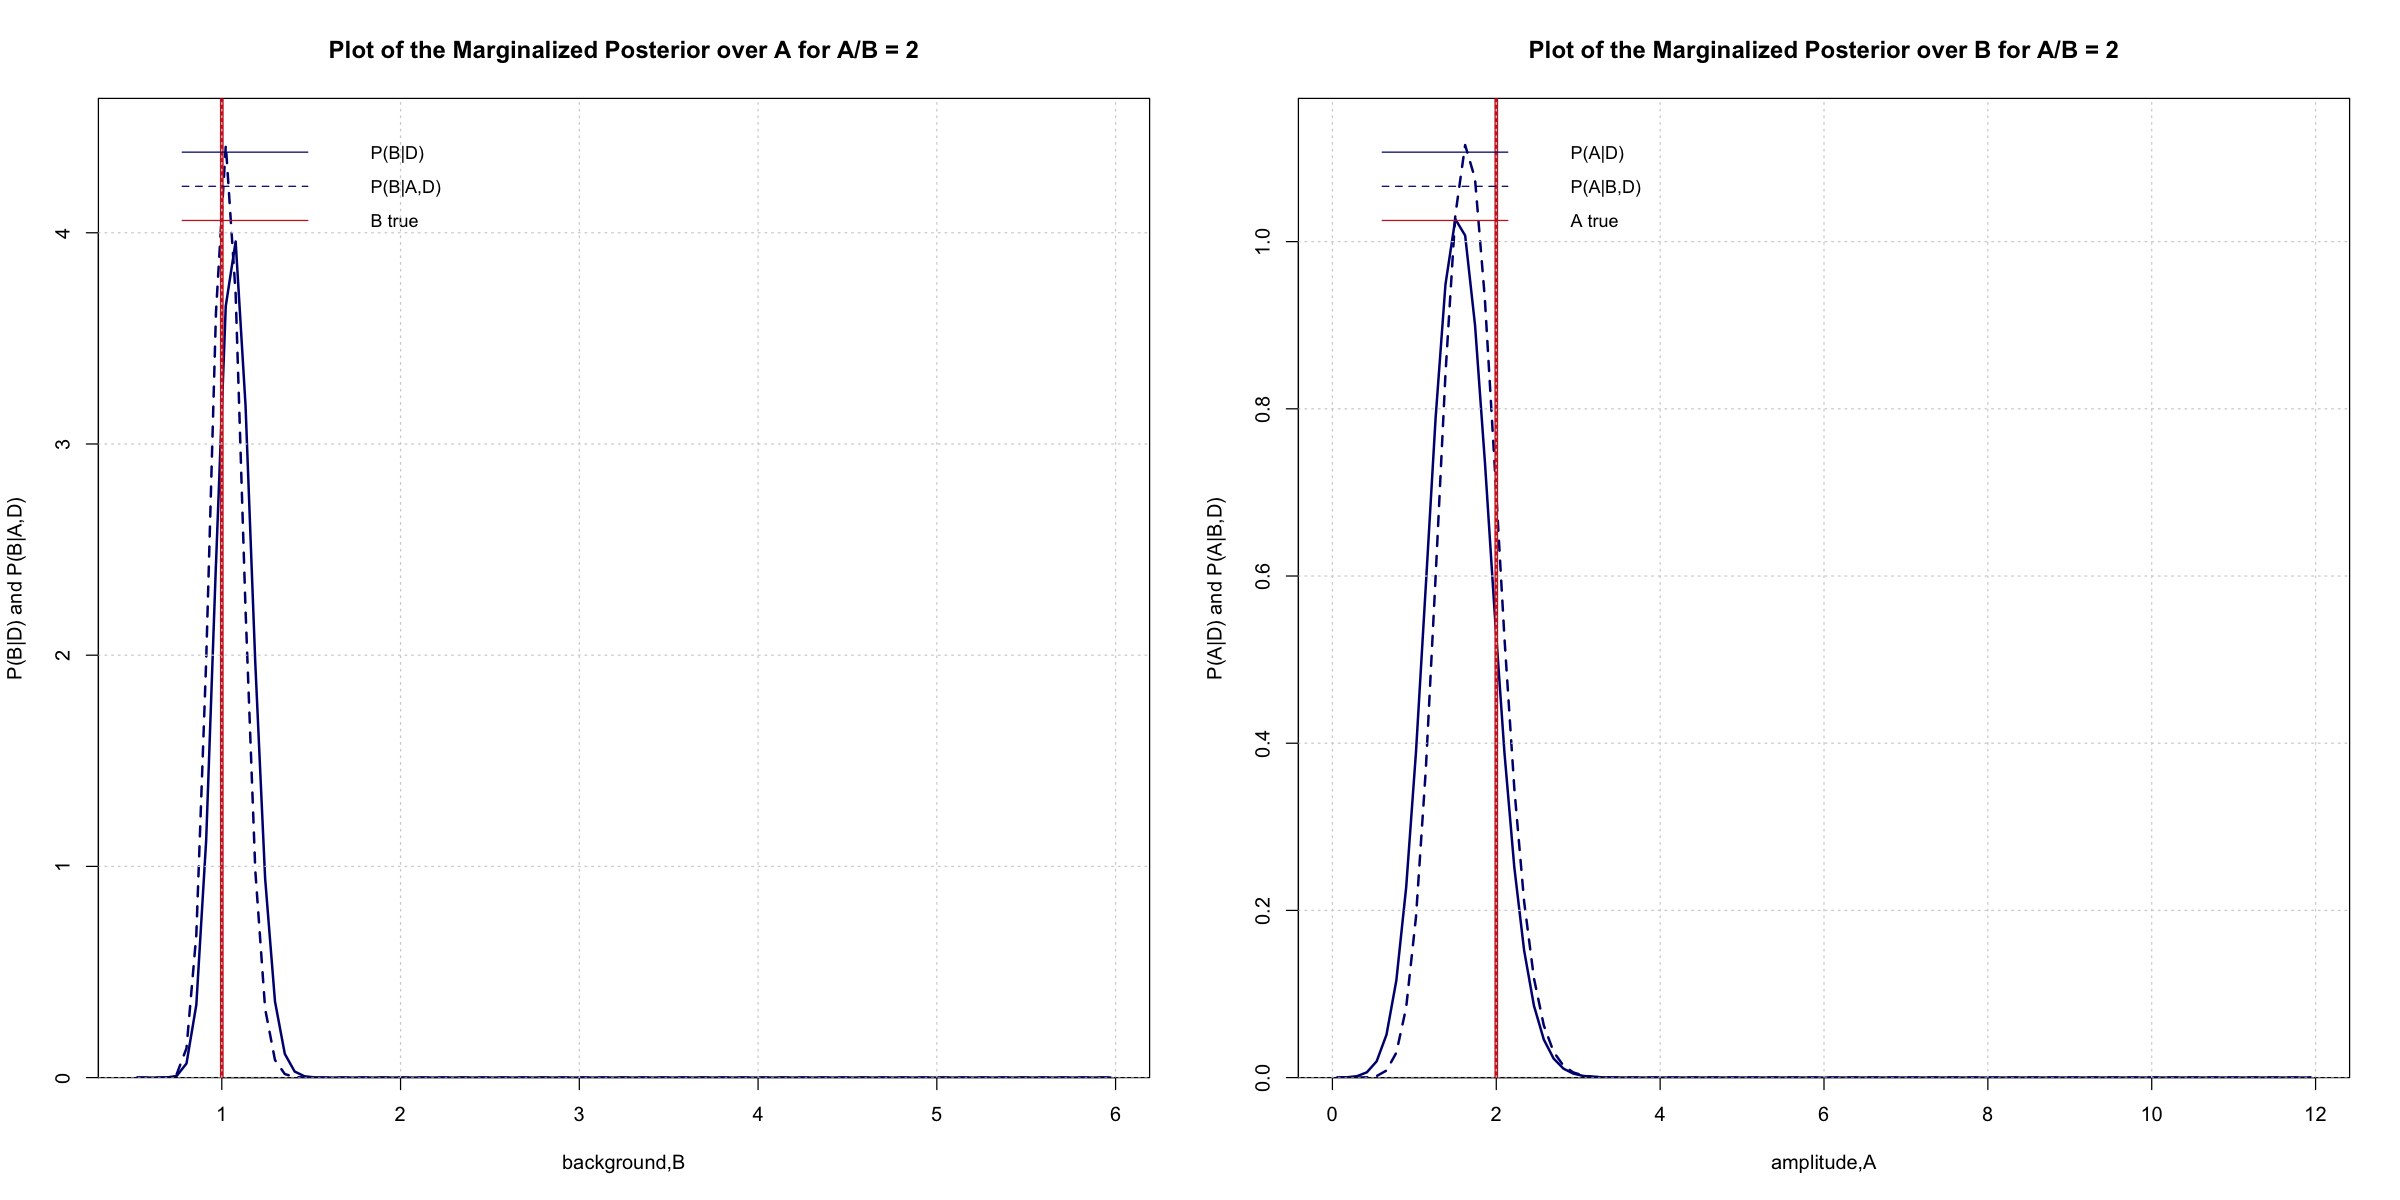

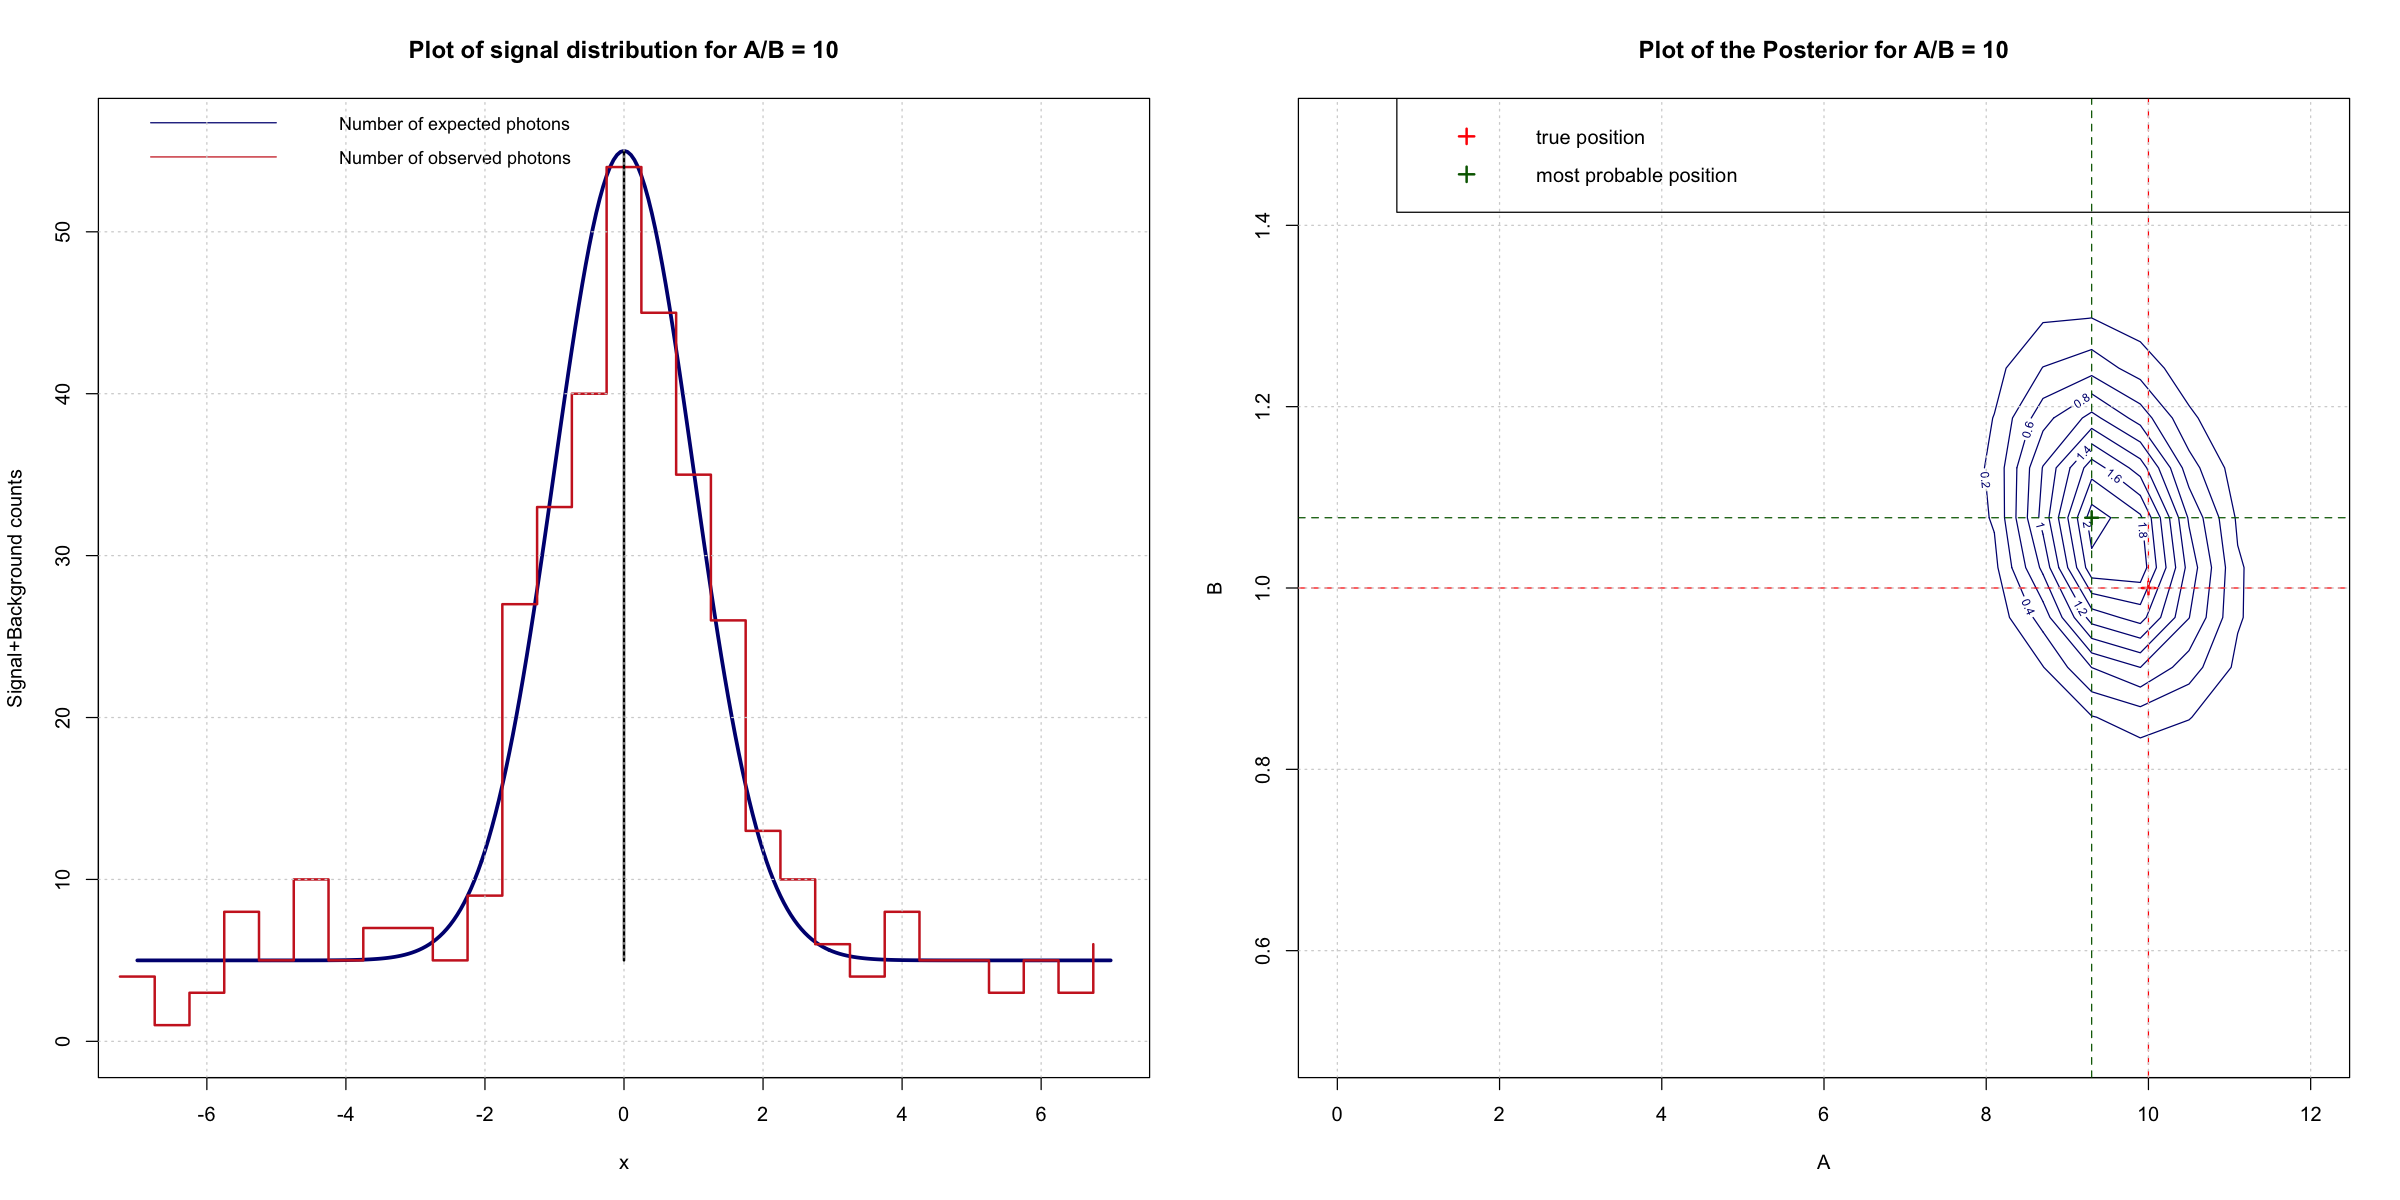

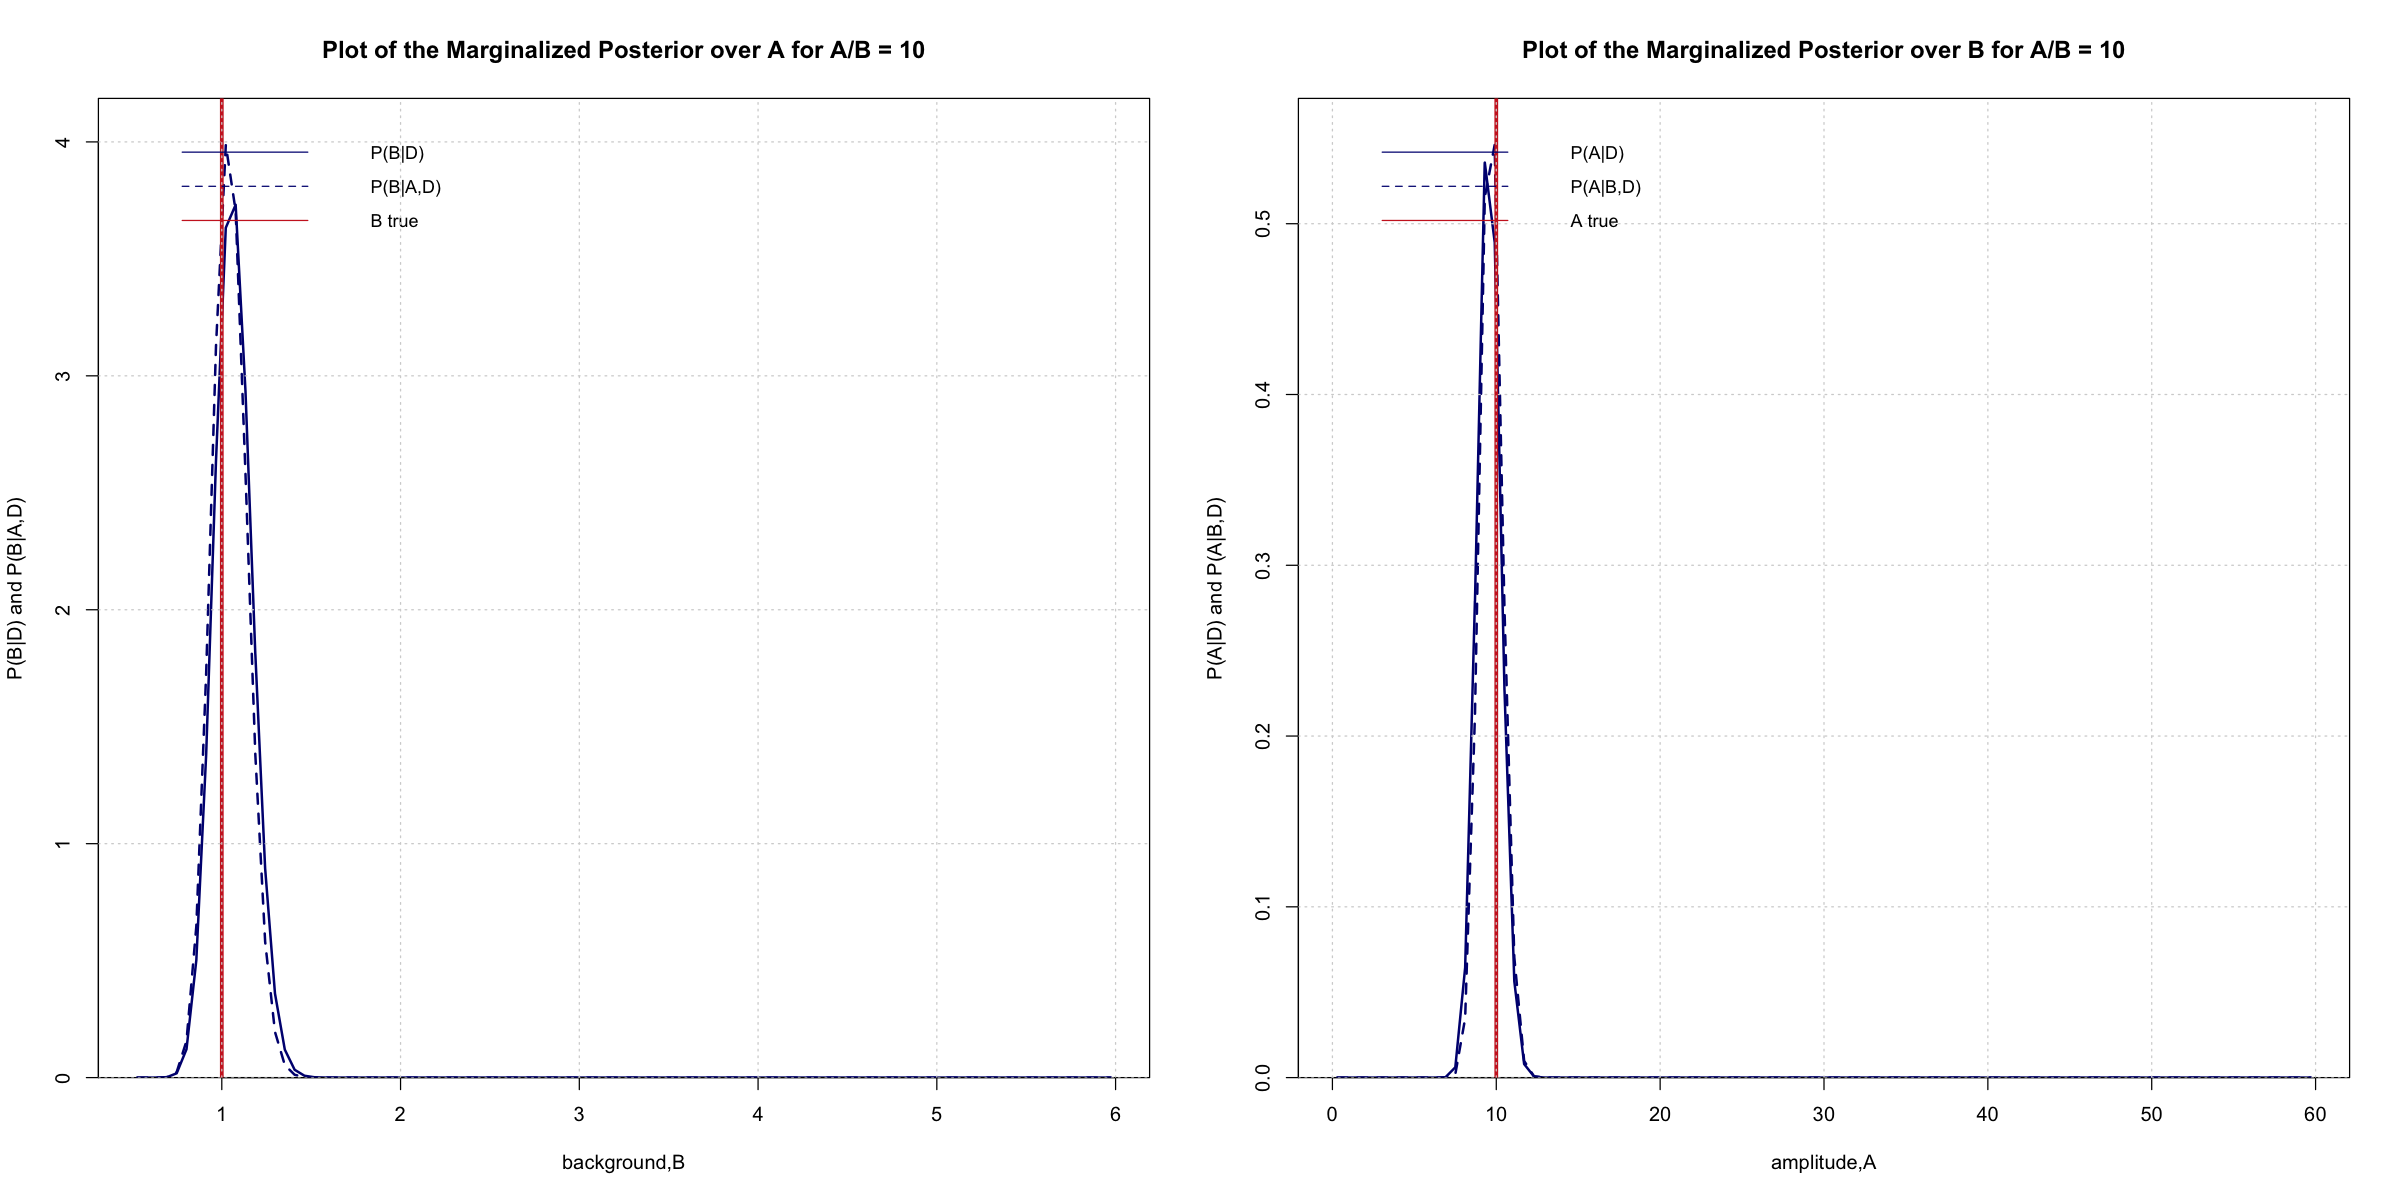

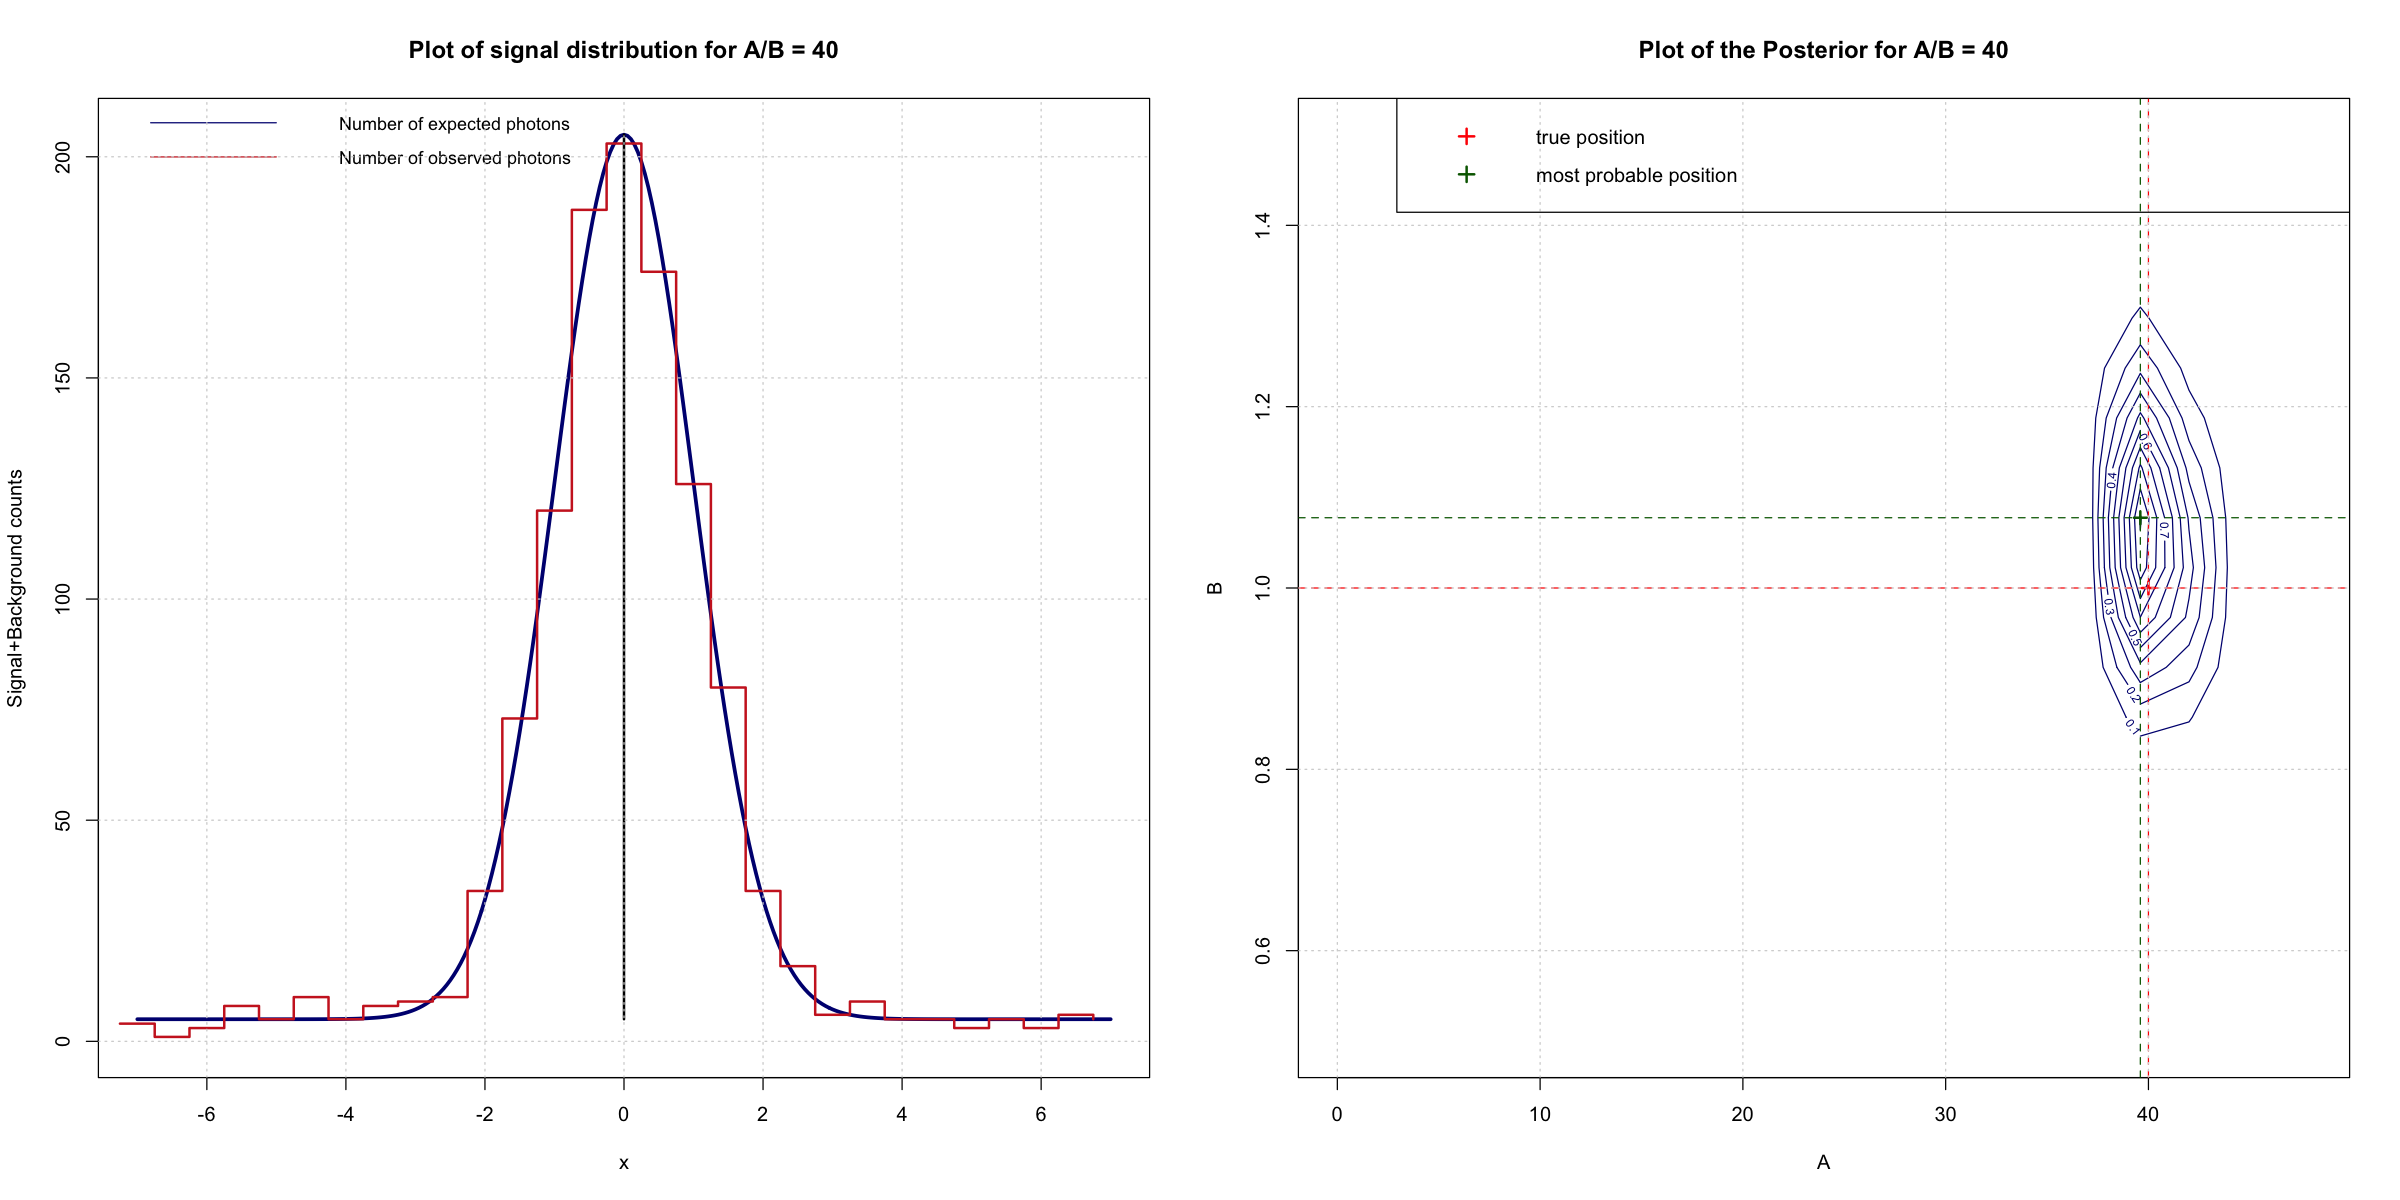

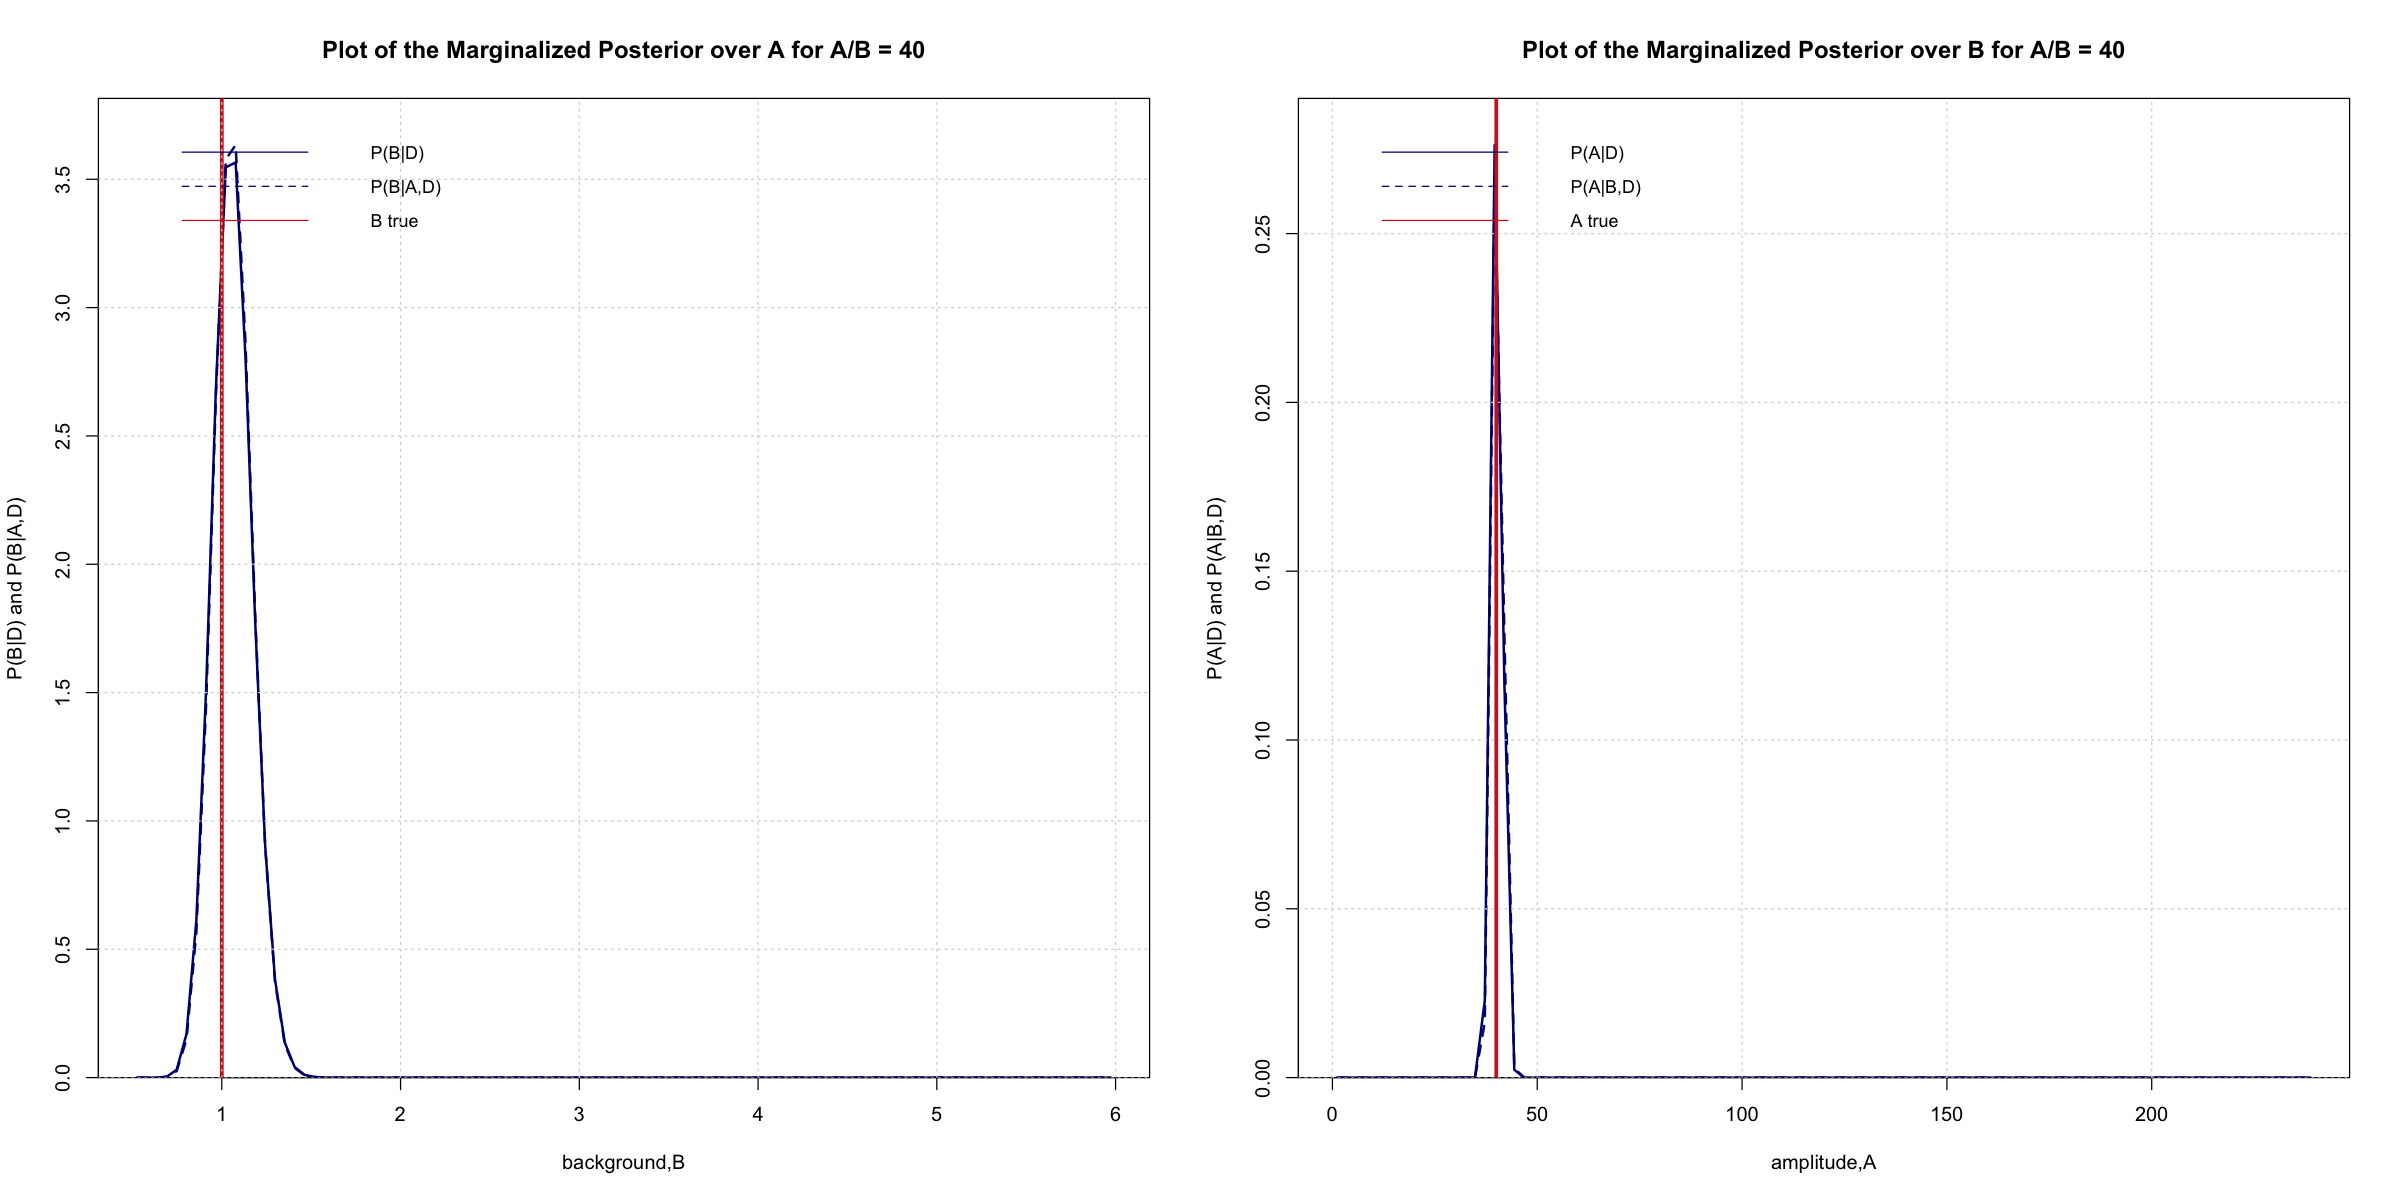

In [20]:
# Generative model 
signal <- Vectorize( function(x, A, B, x0, w, t) { 
            dt * (A*exp(-(x-x0)^2/(2*w^2)) + B)
          } )


# Log posterior
log.post <- function(data, x, A, B, x0, w, dt) {
            if(A<0 || B <0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, A, B, x0, w, dt), log=TRUE))
            }

# Vary the ratio A/B
ratio.set <- c(0.6,0.8,1,1.2,1.4,1.6,1.8,2,4,6,8,10,20,40)

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)

# Define list for most probable value obtained
A.list <- c(NULL)
B.list <- c(NULL)

A.true.list <- c(NULL)
B.true.list <- c(NULL)

ratio.set.plot <- c(0.8,1,1.2,2,10,40)

for(r in ratio.set){

    # Define the model parameters
    B.true <- 1        # Background amplitude (unkown)
    A.true <- r*B.true # Signal amplitude (unkown)
    dt <- 5            # Exposure time 
    x0 <- 0            # Signal peak
    w <- 1             # Signal width
    
    A.true.list <- c(A.true.list,A.true)
    B.true.list <- c(B.true.list,B.true)
    
    # Generate the number of observed photons
    set.seed(6666)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, dt) 
    ddat <- rpois(length(s.true), s.true)
    
    if(r %in% ratio.set.plot){
        # Plot the number of expected photons (not integer)
        xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
        splot <- signal(xplot, A.true, B.true, x0, w, dt) 
        plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
             type='l',lty=1, lwd=3, col='navy', ylim=c(min(ddat)-1,max(ddat)+2),
             main=paste("Plot of signal distribution for A/B =",r))
        # Plot the number of observed photons (integer) 
        xdat.off <- xdat - 0.25 # Remove offset of the bin width
        lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
        legend("topleft",inset=-0.01,c("Number of expected photons","Number of observed photons"), 
               col=c("navy","firebrick3"), lty=1, cex=0.9,box.lty=0)     
        # Plot amplitude
        xp <- c(0,0)
        yp <- c(min(splot),max(splot))
        polygon(x = xp, y = yp, col = 'red',lwd=2)
        grid()
    }
    
    # Sampling grid for computing Posterior
    alim <- c(0.0, A.true + (500/100)*A.true)
    blim <- c(0.5, B.true + (500/100)*B.true)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    A <- alim[1] + diff(alim)*uniGrid 
    B <- blim[1] + diff(blim)*uniGrid
    
    # Compute the Normalized Posterior
    z <- matrix(data=NA, nrow=length(A), ncol=length(B)) 
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            z[j,k] <- log.post(ddat, xdat, A[j], B[k], x0, w, dt) 
    } }   
    # Normalize the Posterior
    z.norm <- exp(z)/(delta_a*delta_b*sum(exp(z)))    
    
    if(r %in% ratio.set.plot){
        # Plot Normalized 2D posterior as contours(a, b, exp(z))
        contour(A, B, z.norm, main=paste("Plot of the Posterior for A/B =",r),
                xlim=c(min(0,A.true),max(A.true + (20/100)*A.true ,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="A", ylab="B",col="navy",
                nlevels=10)  
        
        # Plot of the true value of alpha and beta
        points(A.true, B.true, pch=3, col="red", lwd=2) 
        abline(h=B.true, lty=2,col='red')
        abline(v=A.true, lty=2,col='red')
        grid()
    }
    
    # Compute most probable values of the Posterior
    index <- c(which(z==max(z), arr.ind=TRUE))
    max.A <- A[index[1]]
    max.B <- B[index[2]]

    # Append most probable values to the list A.list, B.list
    A.list <- c(A.list,max.A)
    B.list <- c(B.list,max.B)
    
    if(r %in% ratio.set.plot){
        # Plot the most probable values of the Posterior
        points(max.A, max.B, pch=3, col="darkgreen", lwd=2) 
        abline(h=max.B, lty=2,col='darkgreen')
        abline(v=max.A, lty=2,col='darkgreen')  
    
        legend("topright",c("true position","most probable position"), 
               col=c("red","darkgreen"), pch=3, pt.cex=1.2, pt.lwd=2) 
    }
    
    if(r %in% ratio.set.plot){
                
        # Compute normalized marginalized posteriors, P(a|D) and P(b|D) 
        # by summing over other parameter. Normalize by gridding.
        p_a_D <- apply(exp(z), 1, sum)
        p_a_D <- p_a_D/(delta_a*sum(p_a_D))
        p_b_D <- apply(exp(z), 2, sum) 
        p_b_D <- p_b_D/(delta_b*sum(p_b_D))
        
        # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D) 
        # using true values of conditioned parameters.  
        # Vectorize(func, par) makes a vectorized function out of func in the parameter par.
        
        p_a_bD <- exp(Vectorize(log.post, "A")(ddat, xdat, A, B.true, x0, w, dt))
        p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
        p_b_aD <- exp(Vectorize(log.post, "B")(ddat, xdat, A.true, B, x0, w, dt))    
        p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
        
        # Plot the 1D marginalized posteriors
        # P(B|D) and P(B|A,D)
        plot(B, p_b_D, xlab="background,B", yaxs="i", lty=1, col='navy',
             ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
             type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over A for A/B =",r))
        lines(B, p_b_aD, lwd=2, lty=2, col='navy') 
        abline(v=B.true, col="firebrick3",lty=1,lwd=3)
        legend("topleft",inset=0.02,c("P(B|D)","P(B|A,D)","B true"), 
               col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2,
               cex=0.9,box.lty=0)
        grid()
        
        # P(A|D) and P(A|B,D)
        plot(A, p_a_D, xlab="amplitude,A", yaxs="i", lty=1, col='navy',
             ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
             type="l", lwd=2, main=paste("Plot of the Marginalized Posterior over B for A/B =",r))
        lines(A, p_a_bD, lwd=2, lty=2,col='navy') 
        abline(v=A.true, col="firebrick3",lty=1,lwd=3)
        grid()
        legend("topleft",inset=0.02,c("P(A|D)","P(A|B,D)","A true"), 
               col=c("navy","navy","firebrick3"), lty=1:2, pt.cex=1.2, pt.lwd=2,
               cex=0.9,box.lty=0)
        
    }
}

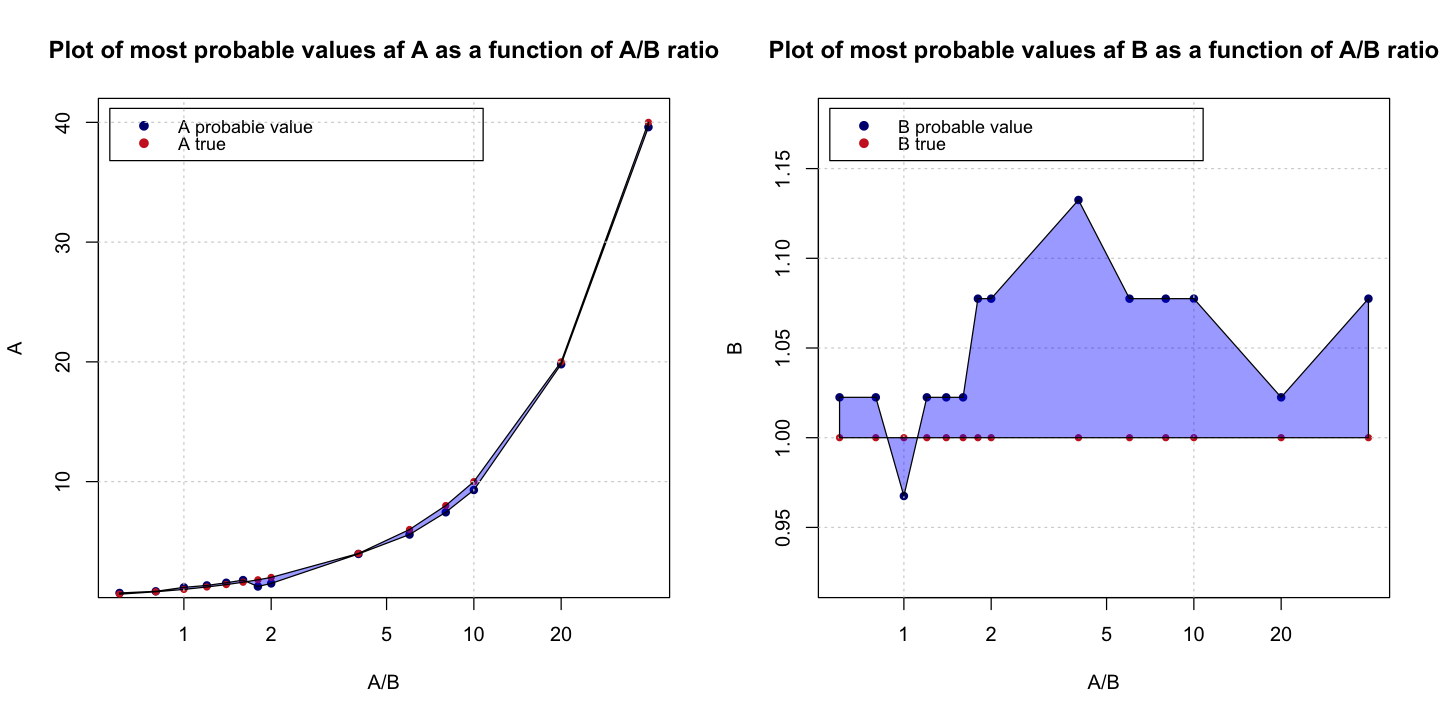

In [21]:
# Compare the most probable values of A and B for different A/B ratios

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=6)

plot(ratio.set, A.list, xlab="A/B", yaxs="i", pch=20, col='navy',
     ylim=1.05*c(min(A.list,A.true.list)-0.3,max(A.list,A.true.list)), ylab="A", 
     type="p", lwd=2, main="Plot of most probable values af A as a function of A/B ratio",
     log='x')
lines(ratio.set,A.true.list,type="p",pch=20,col="firebrick3")
legend("topleft",inset=0.02,c("A probable value","A true"), 
           col=c("navy","firebrick3"), pch=c(20,20), pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=1)
x <- c(ratio.set,rev(ratio.set))
y <- c(A.true.list,rev(A.list))   
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))
grid()

plot(ratio.set, B.list, xlab="A/B", yaxs="i", pch=20, col='navy',
     ylim=1.05*c(min(B.list,B.true.list)-0.1,max(B.list,B.true.list)), ylab="B", 
     type="p", lwd=2, main="Plot of most probable values af B as a function of A/B ratio",
     log='x') 
lines(ratio.set,B.true.list,type="p",pch=20,col="firebrick3")

legend("topleft",inset=0.02,c("B probable value","B true"), 
           col=c("navy","firebrick3"), pch=c(20,20),pt.cex=1.2, pt.lwd=2,
           cex=0.9,box.lty=1)
grid()

x <- c(ratio.set,rev(ratio.set))
y <- c(B.true.list,rev(B.list))   
polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.4))
